In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Cargar los datos en un dataframe llamado: airbnb

In [102]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [103]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [104]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
print("%d Los nombres con los que voy a reemplazar son -->")
newnames
colnames(airbnb)<- newnames
head(airbnb)

[1] "%d Los nombres con los que voy a reemplazar son -->"


[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [105]:
airbnb$MetrosCuadrados<- airbnb$PiesCuadrados*0.092903
write.csv(airbnb, "../estadistica-main/originalairbnbCP.csv", row.names = TRUE)
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [107]:
airbnb$CodigoPostal[airbnb$CodigoPostal=='']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '-']<- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '28']<- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '2804']<- 28004
airbnb$CodigoPostal[airbnb$CodigoPostal == '2805']<- 28005
airbnb$CodigoPostal[airbnb$CodigoPostal == '2815']<- 28015
airbnb$CodigoPostal[airbnb$CodigoPostal == '2015']<- 28015
airbnb$CodigoPostal[airbnb$CodigoPostal == "28002\n28002"]<- as.character(28002)
airbnb$CodigoPostal[airbnb$CodigoPostal == "28051\n28051"]<- as.character(28051)
airbnb$CodigoPostal[airbnb$CodigoPostal == "Madrid 28004"]<- as.character(28004)
airbnb$CodigoPostal[airbnb$CodigoPostal == '280013']<- 28013
airbnb$CodigoPostal[airbnb$CodigoPostal == '20013']<- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '20126']<- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '25008']<- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '27004']<- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '27013']<- NA
airbnb$Precio[airbnb$Precio == '-']<- NA #Para evitar errores en el cálculo de precios medios más adelante
airbnb$CodigoPostal <- as.factor(airbnb$CodigoPostal)
write.csv(airbnb, "../estadistica-main/airbnblimpio.csv", row.names = TRUE)
airbnb <- droplevels(airbnb)

In [89]:
print("voy a generar un airbnb con el airbnblimpio.csv para trabajar con la base limpia sin necesidad de estar generando el dataframe")
airbnb2<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

[1] "voy a generar un airbnb con el airbnblimpio.csv para trabajar con la base limpia sin necesidad de estar generando el dataframe"


Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [108]:
unique(airbnb$CodigoPostal)

[1] 28004 28015 28013 28005 28012 28014 28045 <NA>  28007 28028 28009 28001
[13] 28006 28010 28002 28034 28050 28008 28011 28049 28038 28053 28047 28025
[25] 28019 28024 28016 28036 28046 28039 28020 28003 28029 28054 28041 28026
[37] 28058 28018 28030 28017 28027 28043 28033 28055 28021 28032 28037 28022
[49] 28042 28094 28035 28040 28031 28044 28105 28023 28051 28850 28048 28056
[61] 28060 28052
61 Levels: 28001 28002 28003 28004 28005 28006 28007 28008 28009 ... 28850

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [109]:
masentradas = summary(airbnb$CodigoPostal)
print("Puedo aplicar 'summary' y con la instrucción 'head', pedir los 5 primeros valores con más entradas -->")
head(masentradas[order(masentradas,decreasing=TRUE,na.last=TRUE)],5)
print("Ahora toca hacer lo mismo, pero pedir los últimos 5 códigos con menos entradas -->")
head(masentradas[order(masentradas,decreasing=FALSE,na.last=TRUE)],5)

[1] "Puedo aplicar 'summary' y con la instrucción 'head', pedir los 5 primeros valores con más entradas -->"


28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630

[1] "Ahora toca hacer lo mismo, pero pedir los últimos 5 códigos con menos entradas -->"


28048 28052 28056 28058 28060 
    1     1     1     1     1

¿Cuales son los barrios que hay en el código postal 28012?

In [110]:
barrios28012 = subset(airbnb, CodigoPostal == 28012)
print("los barrios del código postal 28012 son -->")
barrios28012 = unique(barrios28012$Barrio)
barrios28012 <- droplevels(barrios28012)
barrios28012

[1] "los barrios del código postal 28012 son -->"


[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
11 Levels: Acacias Arapiles Atocha Cortes Delicias Embajadores Goya ... Universidad

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [274]:
entradas28012 = subset(airbnb, CodigoPostal == 28012)
print("las entradas por barrio en el código postal 28012 son -->")
summary(entradas28012$Barrio)

print("Ahora, quiero que se acomode en dos columnas -->")
summary(subset(entradas28012, CodigoPostal == 28012, select = c(Barrio)))

print("También lo puedo mostrar en una tabla! -->")
entradas28012<-airbnb %>%
    group_by(Barrio) %>%
    filter (CodigoPostal == '28012')
barrios28012 <- group_by(entradas28012, Barrio)
summarise(barrios28012,
    num = n()
         )

[1] "las entradas por barrio en el código postal 28012 son -->"


Embajadores                          Sol 
                        1449                          301 
                      Cortes              Palos de Moguer 
                         216                           46 
                     Palacio                      Acacias 
                          27                           13 
                 Universidad                     Arapiles 
                           4                            1 
                      Atocha                     Delicias 
                           1                            1 
                        Goya                     Abrantes 
                           1                            0 
                     Adelfas                   Aeropuerto 
                           0                            0 
                     Aguilas             Alameda de Osuna 
                           0                            0 
                     Almagro                     Almenara 
                           0                            0 
                 Almendrales                       Aluche 
                           0                            0 
                      Ambroz                      Amposta 
                           0                            0 
            Apostol Santiago                      Aravaca 
                           0                            0 
                       Arcos                    Argüelles 
                           0                            0 
               Bellas Vistas                   Berruguete 
                           0                            0 
                  Buenavista                     Butarque 
                           0                            0 
                  Campamento                     Canillas 
                           0                            0 
                  Canillejas                     Cármenes 
                           0                            0 
               Casa de Campo   Casco Histórico de Barajas 
                           0                            0 
 Casco Histórico de Vallecas Casco Histórico de Vicálvaro 
                           0                            0 
                  Castellana                     Castilla 
                           0                            0 
                 Castillejos                      Chopera 
                           0                            0 
               Ciudad Jardín         Ciudad Universitaria 
                           0                            0 
                      Colina                     Comillas 
                           0                            0 
                  Concepción                   Corralejos 
                           0                            0 
                 Costillares               Cuatro Caminos 
                           0                            0 
              Cuatro Vientos                    El Goloso 
                           0                            0 
                  El Plantío                      El Viso 
                           0                            0 
                   Entrevías                     Estrella 
                           0                            0 
                   Fontarrón             Fuente del Berro 
                           0                            0 
               Fuentelareina                   Gaztambide 
                           0                            0 
                  Guindalera                       Hellín 
                           0                            0 
              Hispanoamérica                        Ibiza 
                           0                            0 
                    Imperial                    Jerónimos 
                           0                            0 
                    Justicia                       La Paz 
                           0                            0 
     

[1] "Ahora, quiero que se acomode en dos columnas -->"


             Barrio    
 Embajadores    :1449  
 Sol            : 301  
 Cortes         : 216  
 Palos de Moguer:  46  
 Palacio        :  27  
 Acacias        :  13  
 (Other)        :   8  

[1] "También lo puedo mostrar en una tabla! -->"


Barrio,num
<fct>,<int>
Acacias,13
Arapiles,1
Atocha,1
Cortes,216
Delicias,1
Embajadores,1449
Goya,1
Palacio,27
Palos de Moguer,46


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [112]:
print("el número total de barrios en el dataset es -->")
length(unique(airbnb$Barrio))
print("los nombres de los barrios en el dataset son -->")
unique(airbnb$Barrio, decreasing=FALSE)

[1] "el número total de barrios en el dataset es -->"


[1] 125

[1] "los nombres de los barrios en el dataset son -->"


[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [113]:
print("Asumo que la pregunta se refiere a toda la base de datos airbnb!!!")
print("Los barrios con mayor número de entradas son -->")
entradasbarrio = summary(airbnb$Barrio)
head(entradasbarrio[order(entradasbarrio,decreasing=TRUE,na.last=TRUE)],5)

[1] "Asumo que la pregunta se refiere a toda la base de datos airbnb!!!"
[1] "Los barrios con mayor número de entradas son -->"


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [114]:
paste("La base de datos incluye ", length(unique(airbnb$TipoAlquiler)), " tipos distintos de alquiler.")
print("Los Tipos de Alquiler en airbnb son -->")
unique(airbnb$TipoAlquiler, decreasing=FALSE)

[1] "La base de datos incluye  3  tipos distintos de alquiler."

[1] "Los Tipos de Alquiler en airbnb son -->"


[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

[1] "Lo intento por ggplot también, para tratar de lograr una mejor visualización -->"


Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


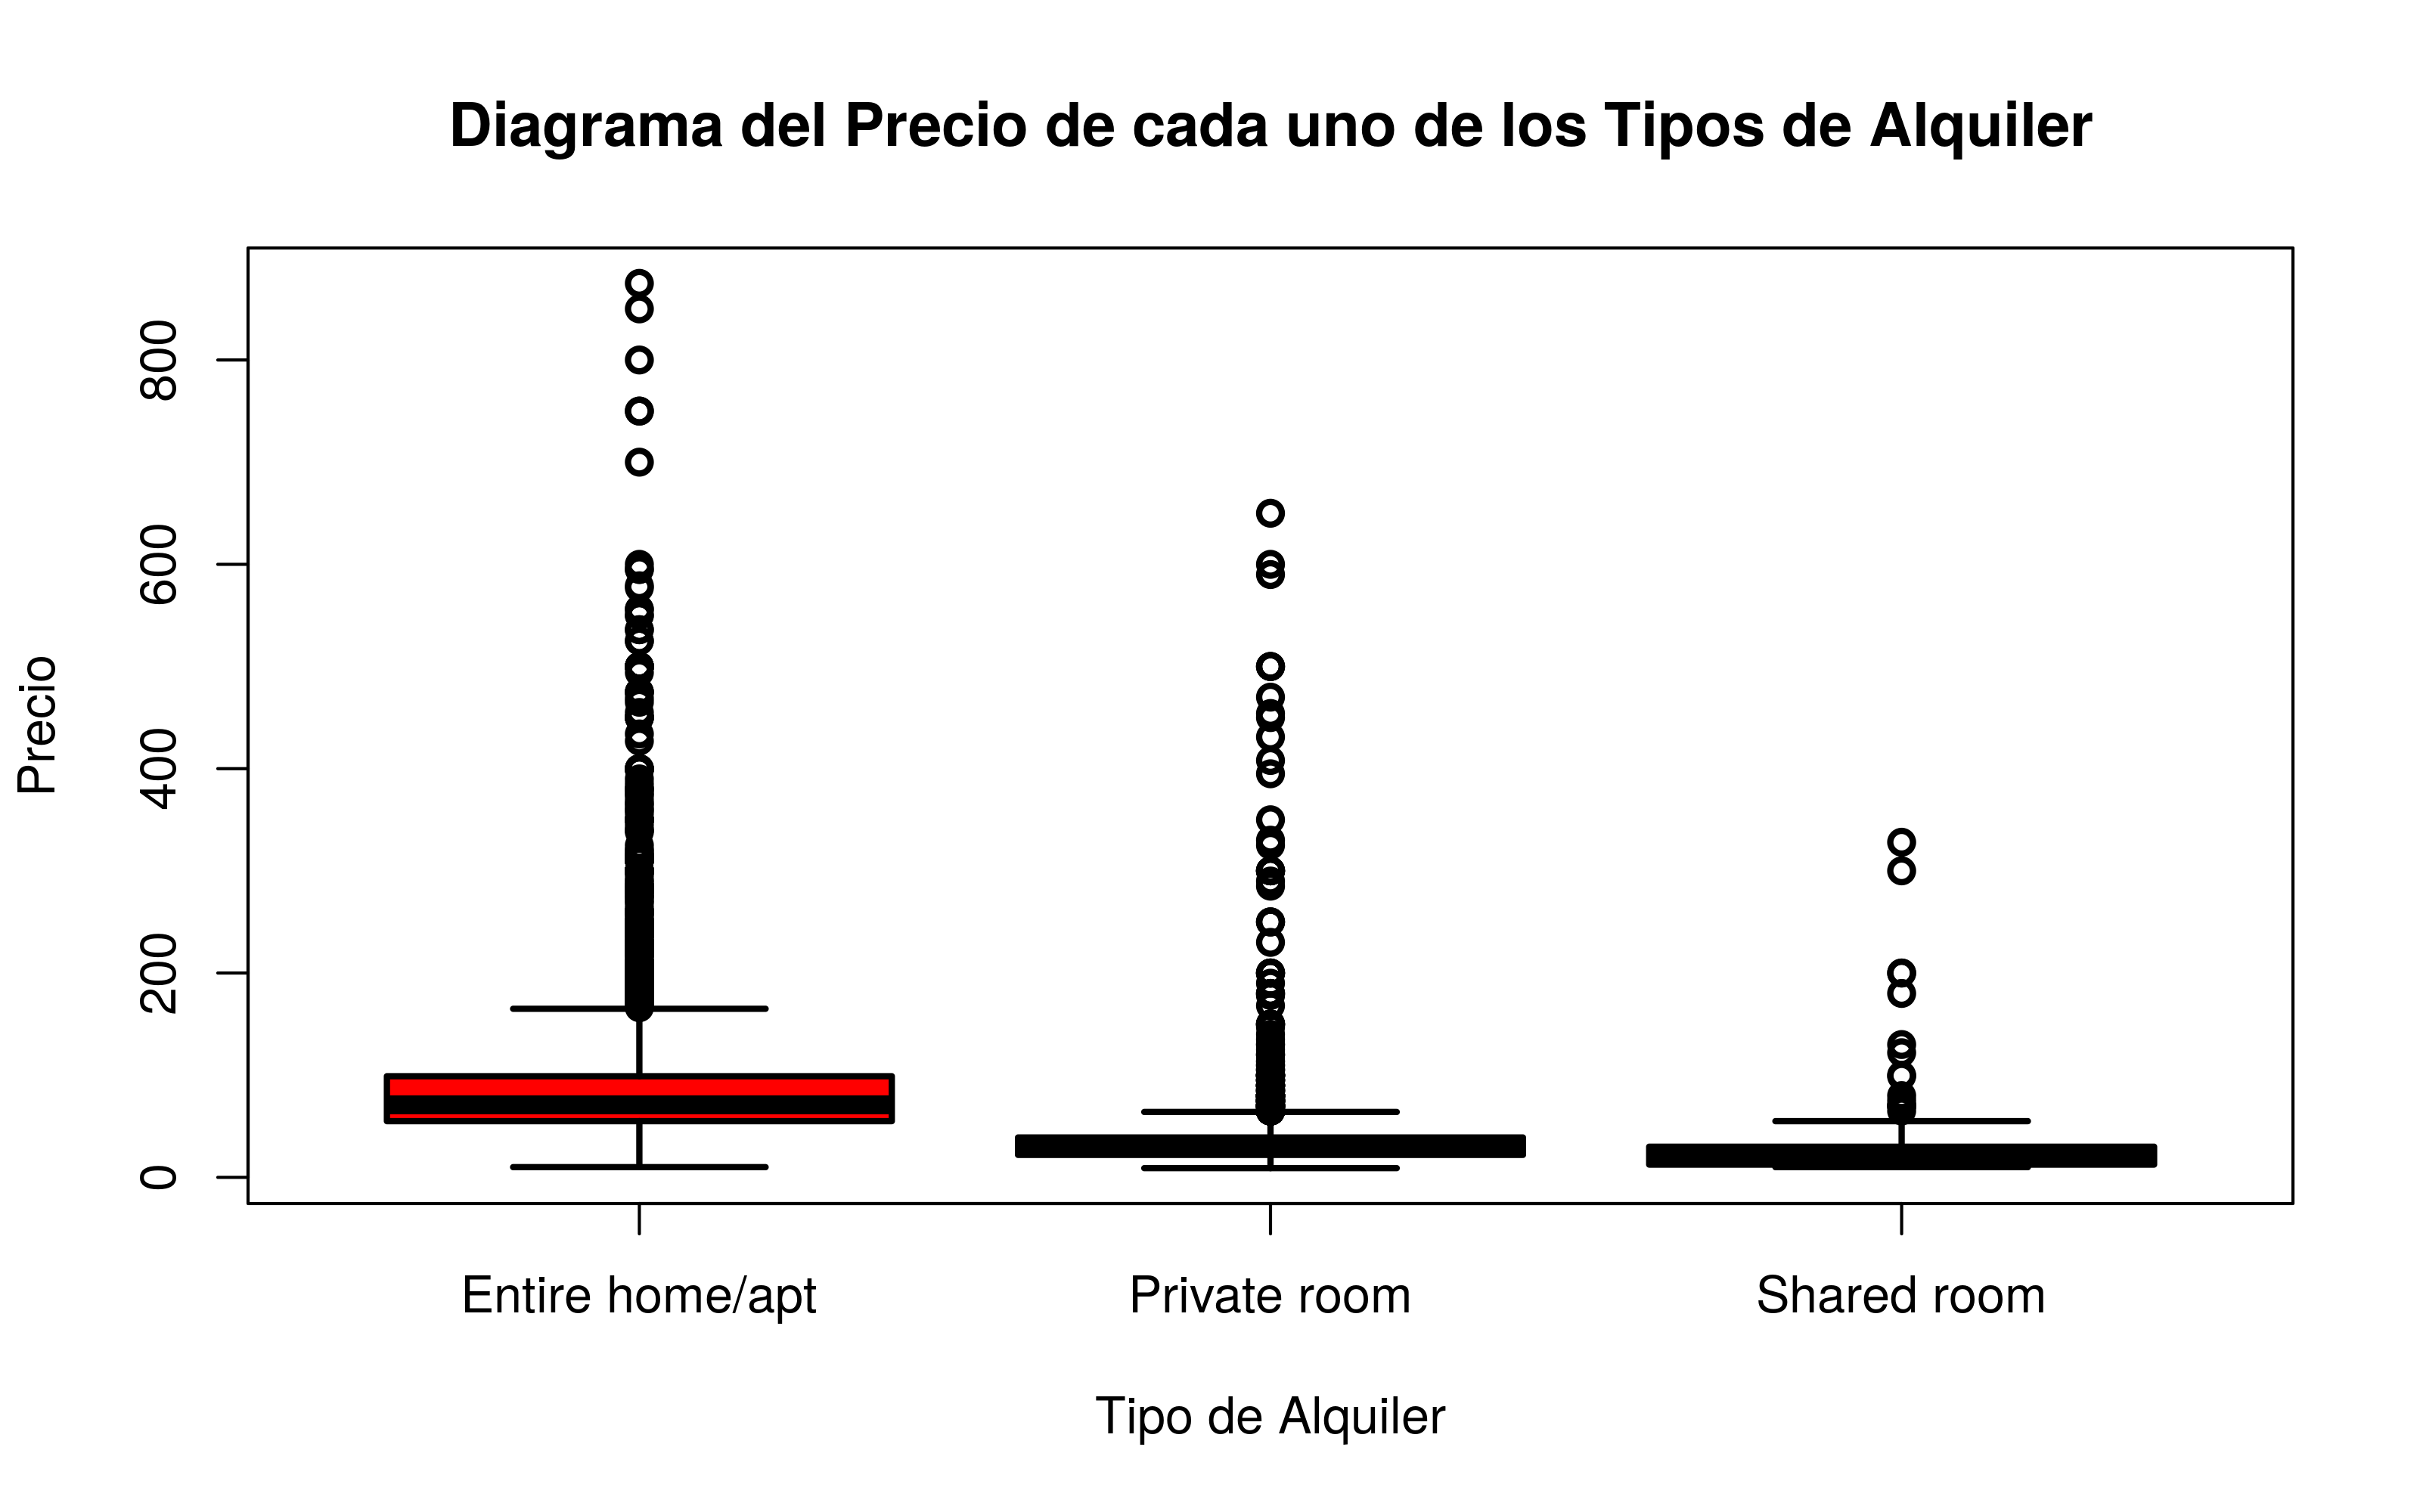

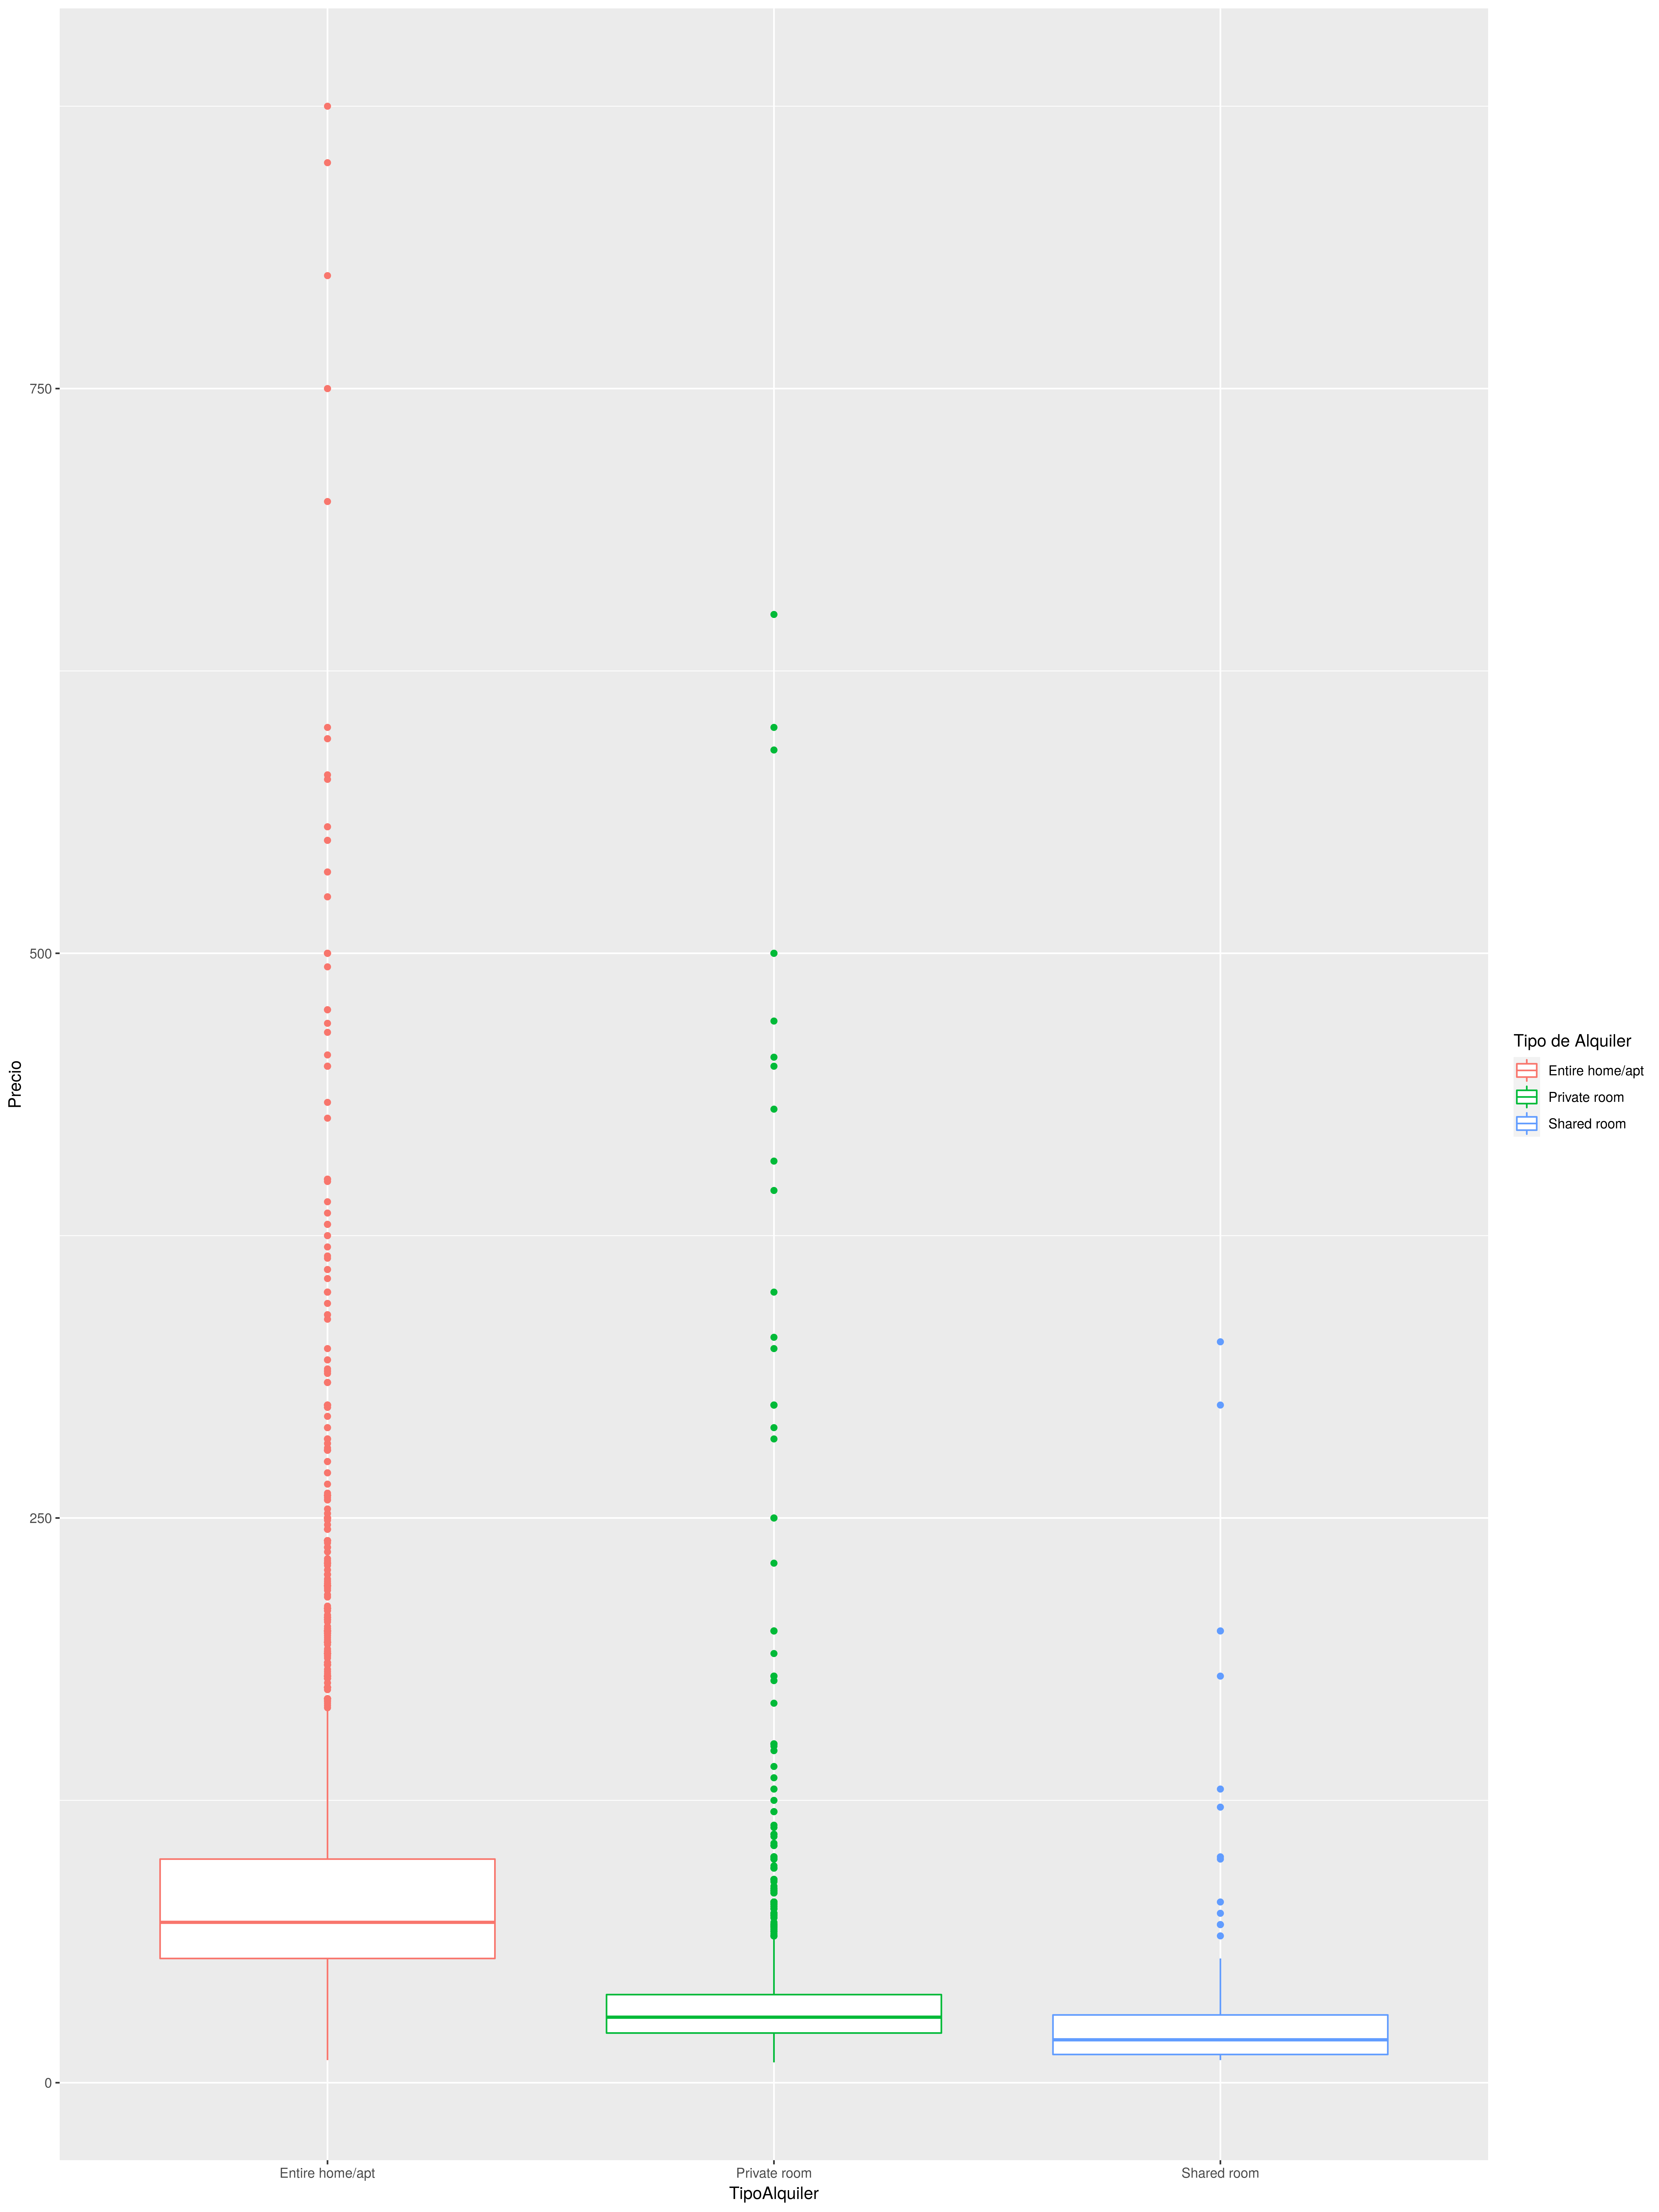

In [115]:
options(repr.plot.height=5,repr.plot.width=8 , repr.plot.res = 400)
boxplot(airbnb$Precio ~ airbnb$TipoAlquiler, vertical = TRUE, 
        lwd = 2, # ancho línea
        col = rainbow(ncol(airbnb)), #colores
        xlab = "Tipo de Alquiler",
        ylab = "Precio",
        main = "Diagrama del Precio de cada uno de los Tipos de Alquiler",
        lty = 1 #Tipo de línea (caja y mediana)
       )
    
print("Lo intento por ggplot también, para tratar de lograr una mejor visualización -->")
options(repr.plot.height=20,repr.plot.width=15)
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+
 geom_boxplot()+
 scale_color_discrete(name="Tipo de Alquiler")

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [440]:
print("Divido la pregunta en tres preguntas!")
#Hay algunos precios con '-', voy a convertirlos en NA
#airbnb$Precio[airbnb$Precio == '-']<- NA
print("Para obtener el precio medio, saco la MEDIA de cada grupo.")
print("Primero para el grupo 'Entire home/apt' --->")
grupoentire <- subset(airbnb, TipoAlquiler == 'Entire home/apt')
grupoprivate <- subset(airbnb, TipoAlquiler == 'Private room')
gruposhared <- subset(airbnb, TipoAlquiler == 'Shared room')
mediaentire <- mean(grupoentire$Precio, na.rm = TRUE)
paste("El precio medio del alquiler de Entire home/apt es -->", mediaentire)
print("Ahora saco el precio medio para el grupo 'Private room'")
mediaprivate <- mean(grupoprivate$Precio, na.rm = TRUE)
paste("El precio medio del alquiler de Private room es -->", mediaprivate)
print("Finalmente, calculo el precio medio para el grupo 'Shared room'")
mediashared <- mean(gruposhared$Precio, na.rm = TRUE)
paste("El precio medio del alquiler de Shared room es -->", mediashared)
print("Aunque claramente las medias no coinciden entre Entire home/apt y Private y Shared Rooms")
print("Voy a hacer el test de shapiro. Para probar si la diferencia entre las medias es estadísticamente significativa, hay que calcular su pvalor")
paste("Los precios del Tipo de Alquiler Shared Room tienen este pvalor -->", shapiro.test(airbnb$Precio[airbnb$TipoAlquiler=="Shared room"])$p.value, " NO ES SIGNIFICATIVA")
#Los otros son demasiado grandes para hacer el cálculo.
#paste("Los precios del Tipo de Alquiler Private room tienen este pvalor -->", shapiro.test(airbnb$Precio[airbnb$TipoAlquiler=="Private room"])$p.value, " NO ES SIGNIFICATIVA")
#paste("Los precios del Tipo de Alquiler Entire home/apt tienen este pvalor -->", shapiro.test(airbnb$Precio[airbnb$TipoAlquiler=="Entire home/apt"])$p.value, " NO ES SIGNIFICATIVA")


[1] "Divido la pregunta en tres preguntas!"
[1] "Para obtener el precio medio, saco la MEDIA de cada grupo."
[1] "Primero para el grupo 'Entire home/apt' --->"


[1] "El precio medio del alquiler de Entire home/apt es --> 87.2966058763931"

[1] "Ahora saco el precio medio para el grupo 'Private room'"


[1] "El precio medio del alquiler de Private room es --> 34.255135981217"

[1] "Finalmente, calculo el precio medio para el grupo 'Shared room'"


[1] "El precio medio del alquiler de Shared room es --> 29.8534031413613"

[1] "Aunque claramente las medias no coinciden entre Entire home/apt y Private y Shared Rooms"
[1] "Voy a hacer el test de shapiro. Para probar si la diferencia entre las medias es estadísticamente significativa, hay que calcular su pvalor"


[1] "Los precios del Tipo de Alquiler Shared Room tienen este pvalor --> 4.51672121600842e-24  NO ES SIGNIFICATIVA"

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [129]:
airbnb_entire<-grupoentire # Ya lo había hecho en el anterior
airbnb_entire

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
9,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
10,28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
11,28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.71612


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [131]:
barriosmasapart = summary(airbnb_entire$Barrio)
print("Vuelvo a aplicar 'summary' y con la instrucción 'head', para obtener los 5 primeros valores con más entradas -->")
head(barriosmasapart[order(barriosmasapart,decreasing=TRUE,na.last=TRUE)],5)

[1] "Vuelvo a aplicar 'summary' y con la instrucción 'head', para obtener los 5 primeros valores con más entradas -->"


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [290]:
mean_val <- aggregate(Precio ~ Barrio, data = airbnb_entire, mean, na.rm=TRUE)
newnames<-c("Barrio","PrecioProm")
print("Para evitar errores, voy a cambiar la columna Precio a PrecioProm -->")
newnames
colnames(mean_val)<- newnames
printval <- mean_val[order(mean_val$PrecioProm, decreasing = TRUE), ]
printval %>% 
  select(Barrio, PrecioProm) %>% 
  head(., 5)


[1] "Para evitar errores, voy a cambiar la columna Precio a PrecioProm -->"


[1] "Barrio"     "PrecioProm"

,Barrio,PrecioProm
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


,Barrio,PrecioProm
,<fct>,<dbl>
77,Palomas,309.75000
50,Fuentelareina,180.00000
93,Recoletos,161.92537
43,El Plantío,150.00000
30,Castellana,141.38889
27,Casco Histórico de Barajas,141.25000
6,Alameda de Osuna,138.75000
35,Ciudad Universitaria,138.30769
58,Jerónimos,131.82258


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [297]:
print("Primero genero la tabla con Barrio y Freq --> ")
entradasentire<-airbnb_entire %>%
    group_by(Barrio) 
barriosentire <- group_by(entradasentire, Barrio)
printentradas <- summarise(barriosentire,
    Freq = n()
         )
printentradas

[1] "Primero genero la tabla con Barrio y Freq --> "


Barrio,Freq
<fct>,<int>
Abrantes,3
Acacias,61
Adelfas,33
Aeropuerto,2
Aguilas,2
Alameda de Osuna,4
Almagro,97
Almenara,25
Almendrales,18


In [302]:
print("Ahora, hago el Merge de printval con printentradas -->")
#head (printval)
#head (printentradas)
resmerge <- merge(printval,printentradas)
resmerge

[1] "Ahora, hago el Merge de printval con printentradas -->"


Barrio,PrecioProm,Freq
<fct>,<dbl>,<int>
Abrantes,46.00000,3
Acacias,68.16393,61
Adelfas,68.72727,33
Aeropuerto,38.00000,2
Aguilas,54.50000,2
Alameda de Osuna,138.75000,4
Almagro,109.18557,97
Almenara,65.68000,25
Almendrales,77.50000,18


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [313]:
print("Se obtiene de manera similar al ejercicio del Código Postal")
print("Primero preparo el filtro con más de 100 entradas -->")
mas100entradas<- resmerge %>%
    group_by(Barrio) %>%
    filter (Freq > 100)
mayprecio100 <- group_by(mas100entradas, Barrio)
summarise(mayprecio100,
    PrecioProm = n()
         )
print("ahora, ordeno de mayor a menos por PrecioProm y selecciono las primeras 5 entradas en las columnas Barrio, Precio y Frecuencia --->")
printval1 <- mayprecio100[order(mayprecio100$PrecioProm, decreasing = TRUE), ]
printval1 %>% 
  select(Barrio, PrecioProm, Freq) %>% 
  head(., 5)



[1] "Se obtiene de manera similar al ejercicio del Código Postal"
[1] "Primero preparo el filtro con más de 100 entradas -->"


Barrio,PrecioProm
<fct>,<int>
Argüelles,1
Cortes,1
Embajadores,1
Goya,1
Justicia,1
Palacio,1
Palos de Moguer,1
Recoletos,1
Sol,1


[1] "ahora, ordeno de mayor a menos por PrecioProm y selecciono las primeras 5 entradas en las columnas Barrio, Precio y Frecuencia --->"


Barrio,PrecioProm,Freq
<fct>,<dbl>,<int>
Recoletos,161.92537,135
Goya,111.33803,142
Sol,100.75036,701
Trafalgar,98.57848,223
Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

In [311]:
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [312]:
library(tidyr)

In [359]:
print("Primero hago un subset con la información de cada Barrio -->")
Recoletos <- drop_na(subset(airbnb_entire, Barrio == "Recoletos", select = c(Precio), na.rm= "TRUE"))
Goya <- drop_na(subset(airbnb_entire, Barrio == "Goya", select = c(Precio), na.rm= "TRUE"))
Sol <- drop_na(subset(airbnb_entire, Barrio == "Sol", select = c(Precio), na.rm= "TRUE"))
Trafalgar <- drop_na(subset(airbnb_entire, Barrio == "Trafalgar", select = c(Precio), na.rm= "TRUE"))
Justicia <- drop_na(subset(airbnb_entire, Barrio == "Justicia", select = c(Precio), na.rm= "TRUE"))
print("El head de Recoletos queda así -->")
head(Recoletos)
print("El head de Goya queda así -->")
head(Goya)
print("El head de Sol queda así -->")
head(Sol)
print("El head de Trafalgar queda así -->")
head(Trafalgar)
print("El head de Justicia queda así -->")
head(Justicia)

[1] "Primero hago un subset con la información de cada Barrio -->"
[1] "El head de Recoletos queda así -->"


,Precio
,<int>
1,206
2,155
3,150
4,80
5,220
6,150


[1] "El head de Goya queda así -->"


,Precio
,<int>
1,100
2,45
3,140
4,80
5,100
6,100


[1] "El head de Sol queda así -->"


,Precio
,<int>
1,75
2,130
3,100
4,160
5,49
6,70


[1] "El head de Trafalgar queda así -->"


,Precio
,<int>
1,140
2,115
3,100
4,40
5,106
6,119


[1] "El head de Justicia queda así -->"


,Precio
,<int>
1,65
2,75
3,75
4,85
5,54
6,60


[1] "Ahora voy a sacar la gráfica de Recoletos -->"


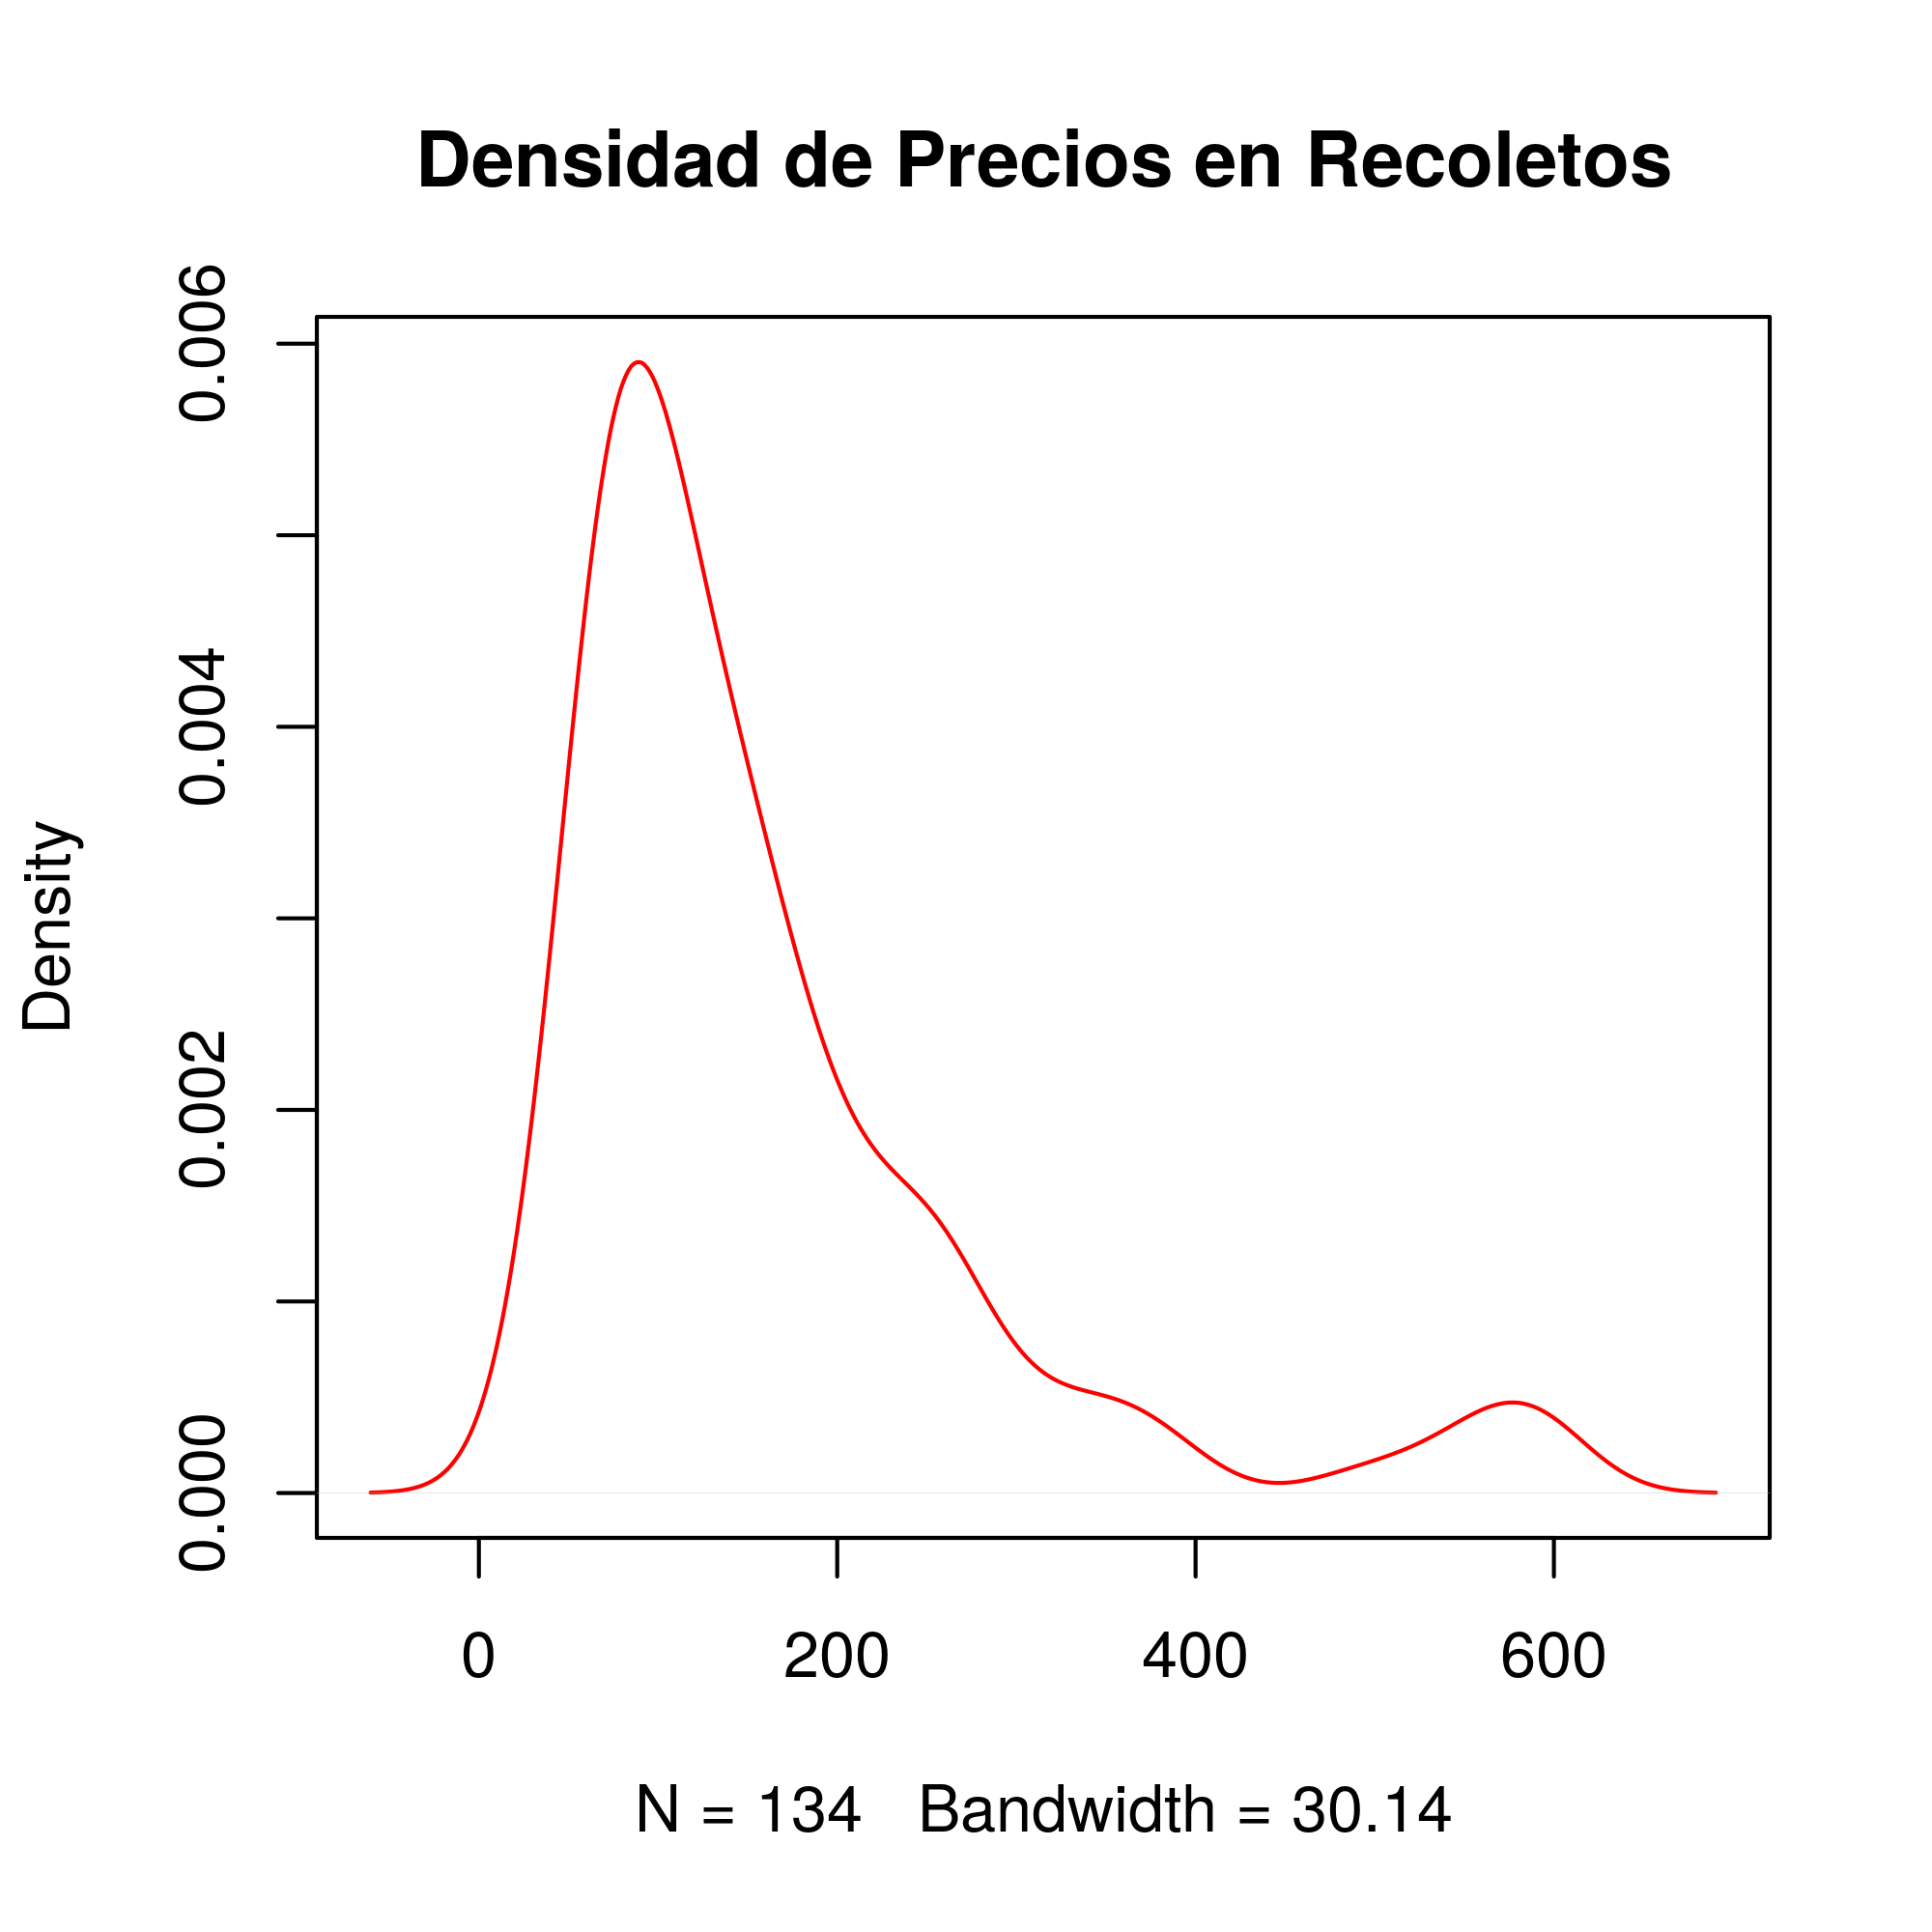

In [360]:
print("Ahora voy a sacar la gráfica de Recoletos -->")
options(repr.plot.height=5,repr.plot.width=5)
d1<- density(Recoletos$Precio)
plot(d1, main="Densidad de Precios en Recoletos", col="red")

[1] "Ahora voy a sacar la gráfica de Goya -->"


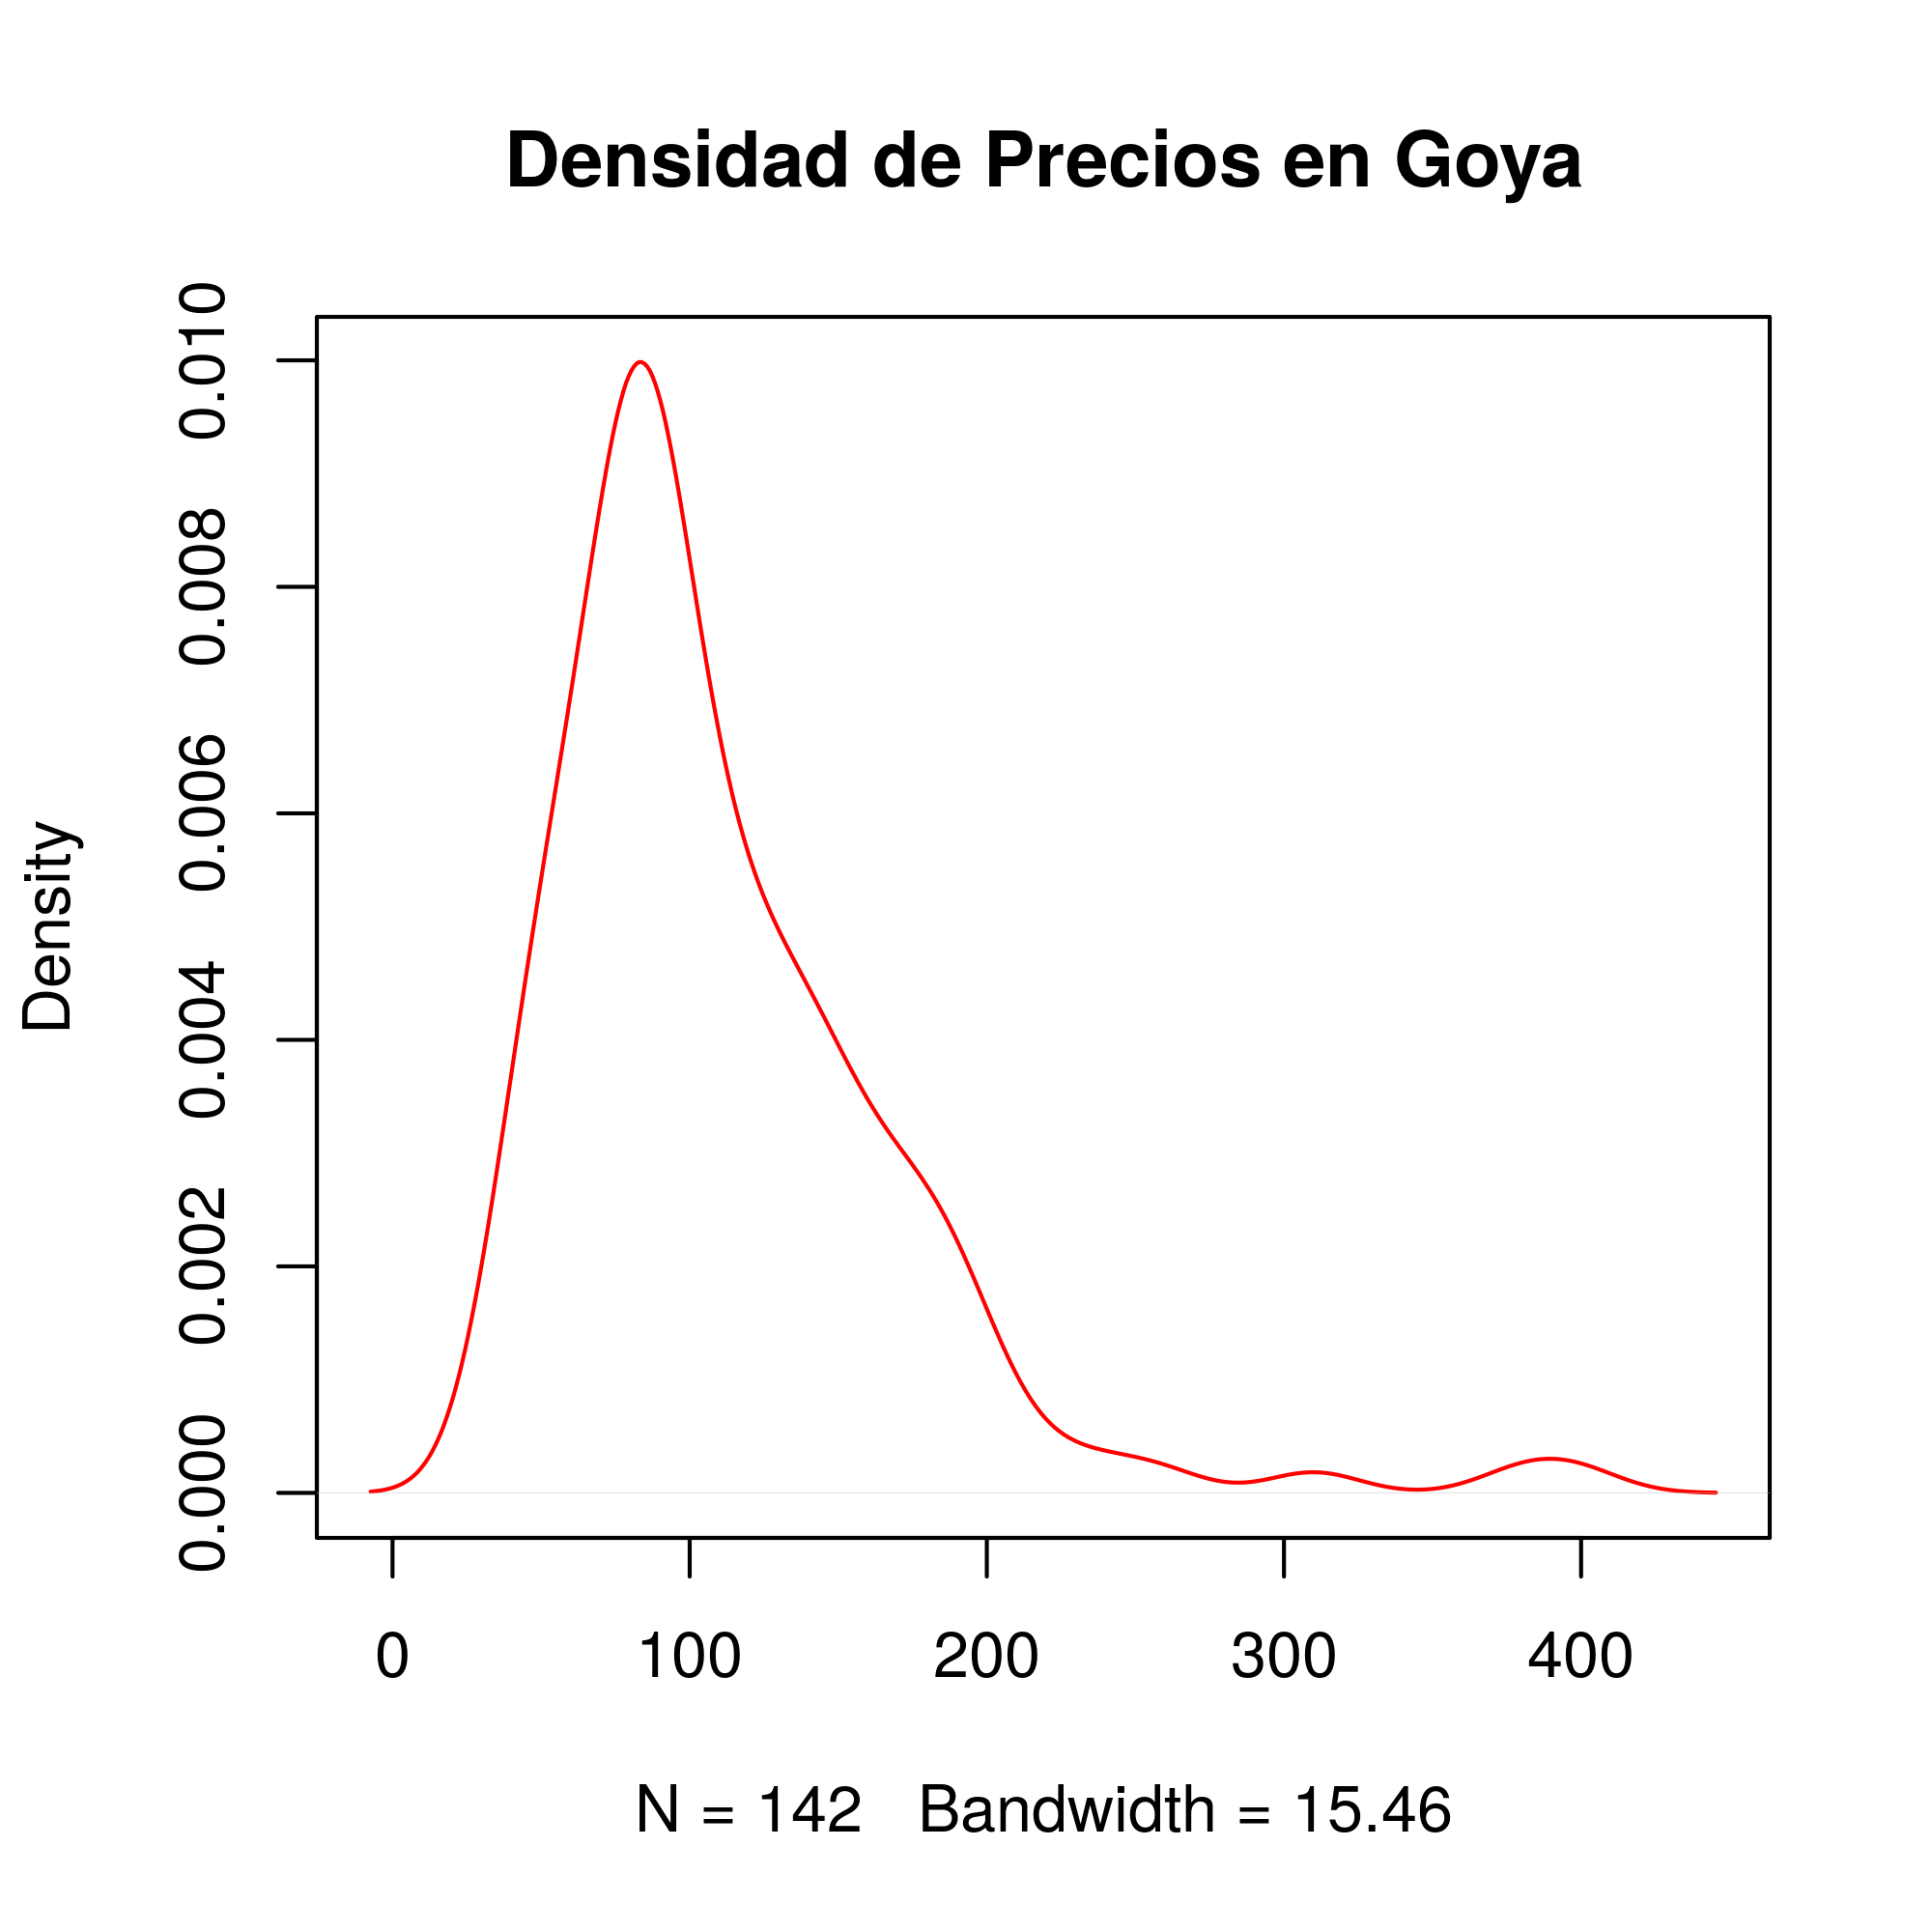

In [346]:
print("Ahora voy a sacar la gráfica de Goya -->")
d2<- density(Goya$Precio)
plot(d2, main="Densidad de Precios en Goya", col="red")

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

[1] "Ahora voy a sacar la gráfica de Sol -->"


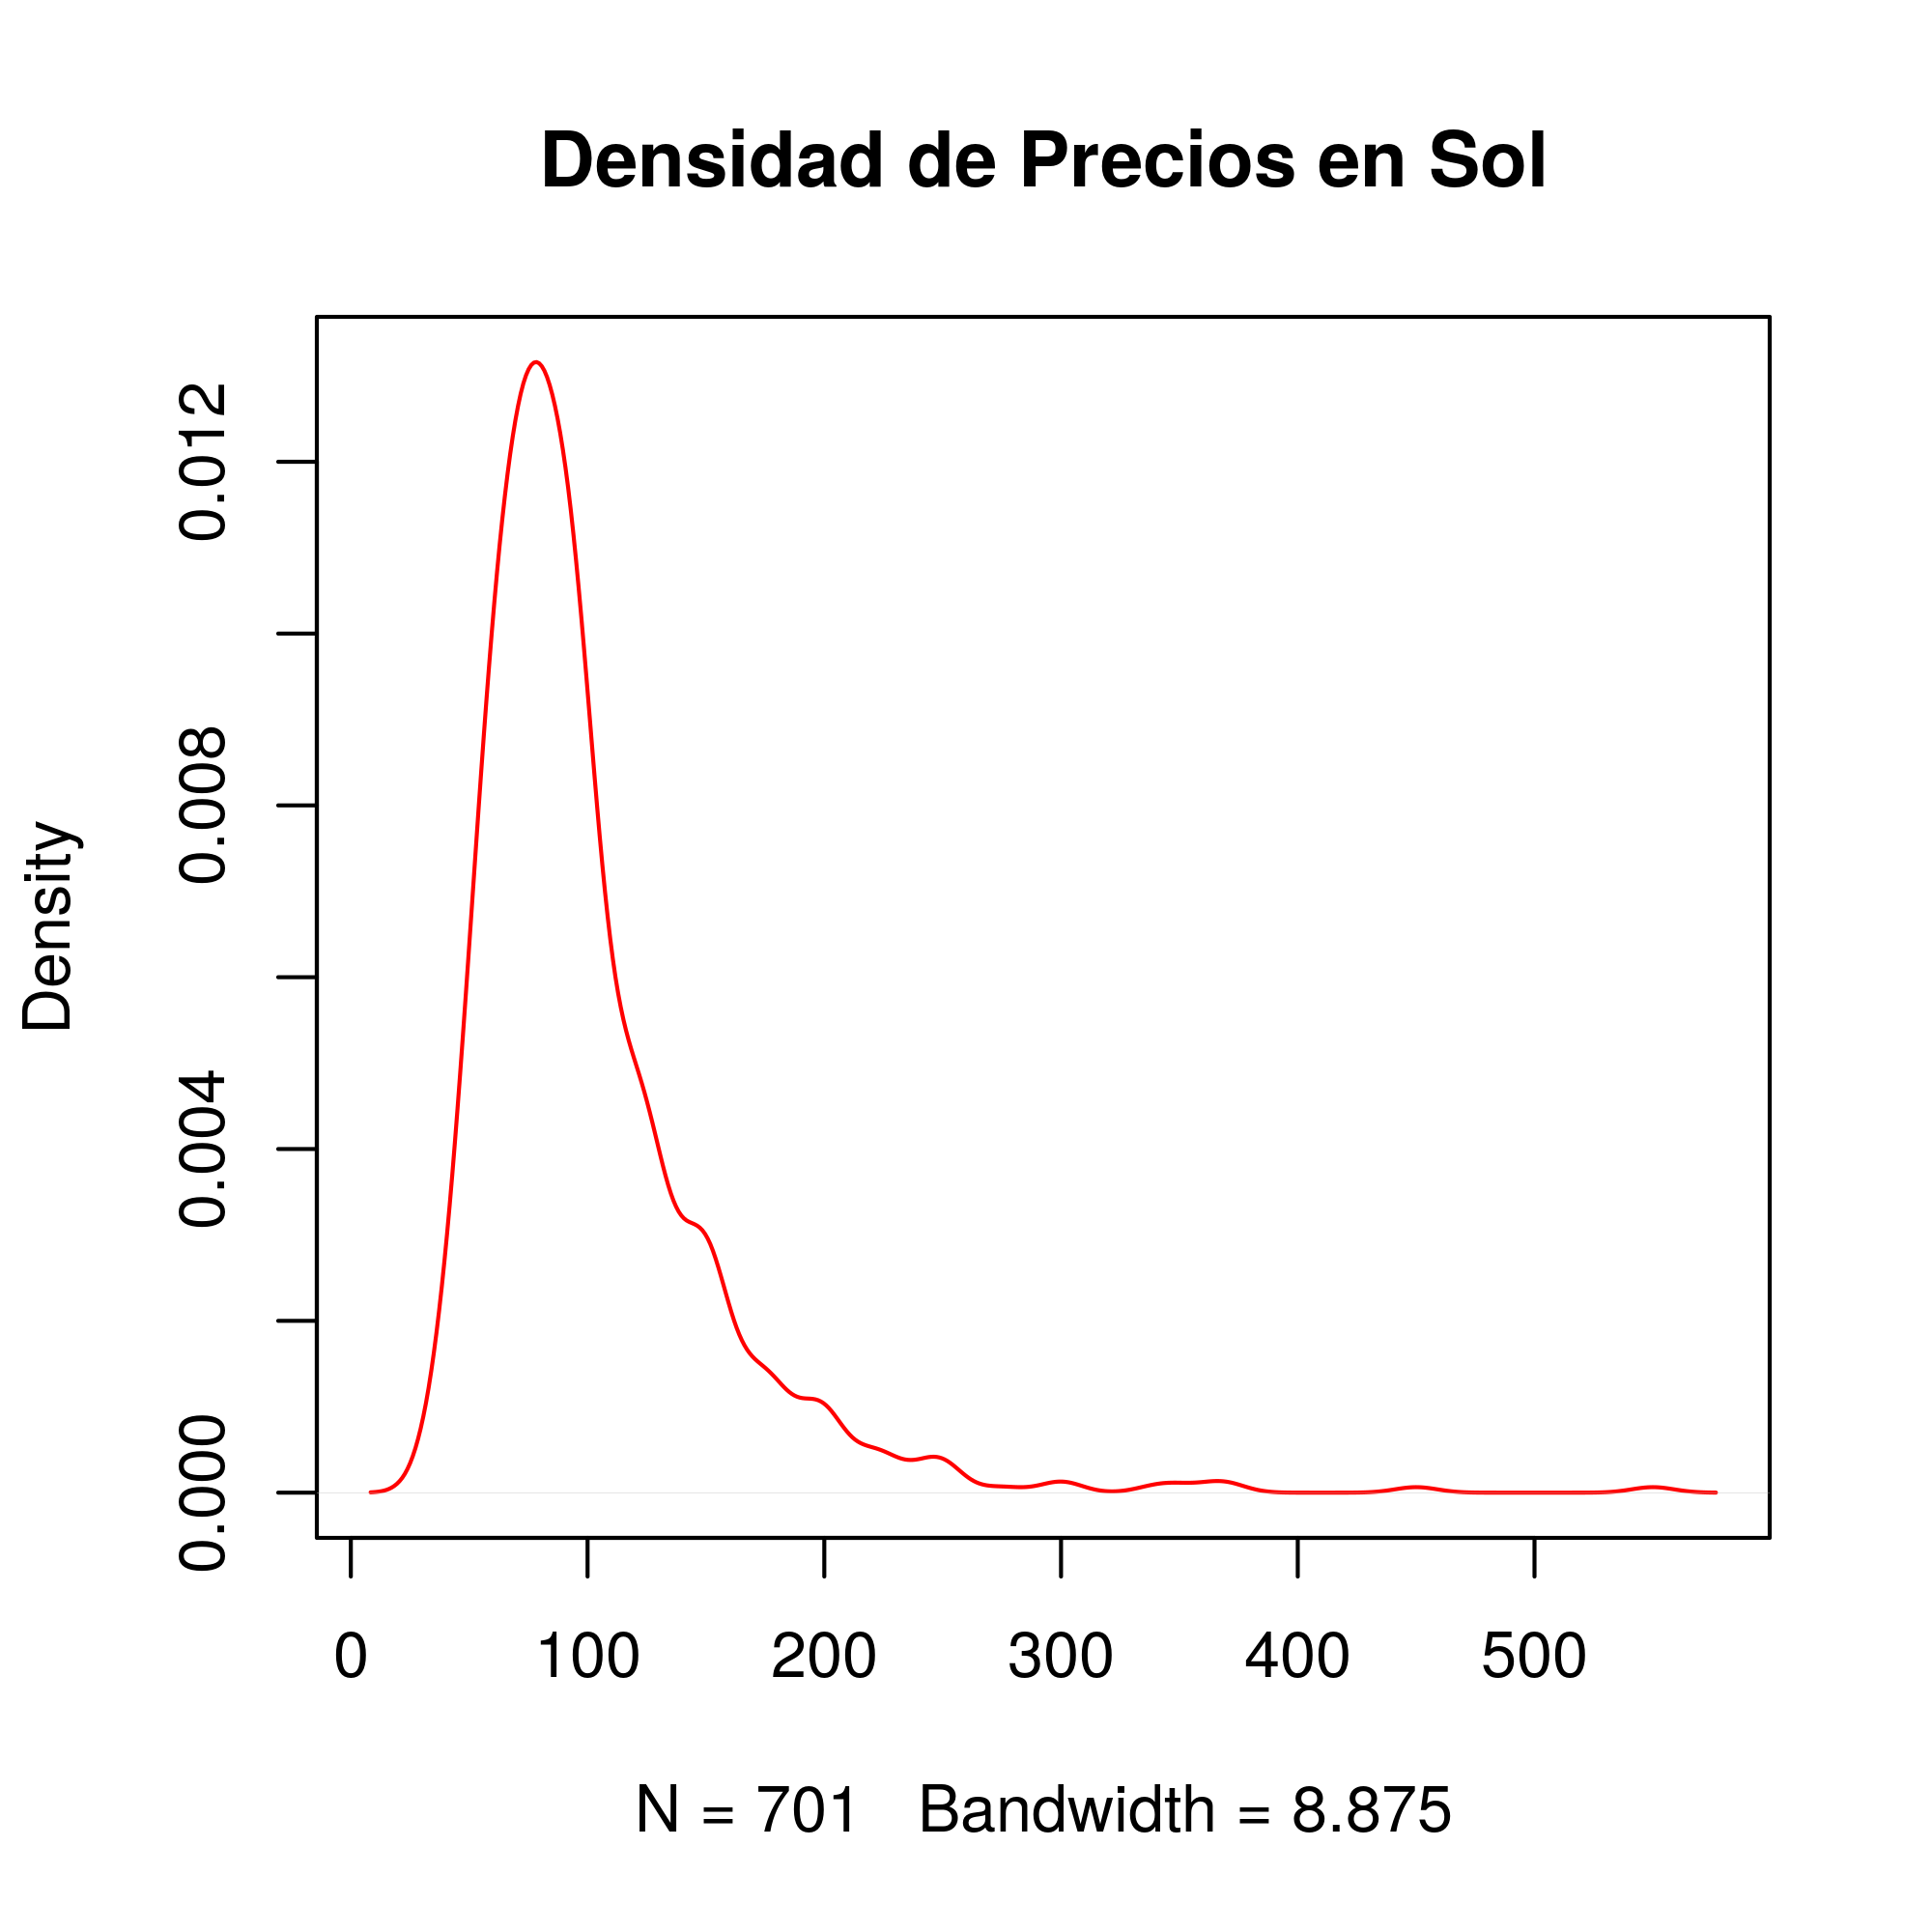

In [365]:
print("Ahora voy a sacar la gráfica de Sol -->")
d3<- density(Sol$Precio)
plot(d3, main="Densidad de Precios en Sol", col="red")

[1] "Ahora voy a sacar la gráfica de Trafalgar -->"


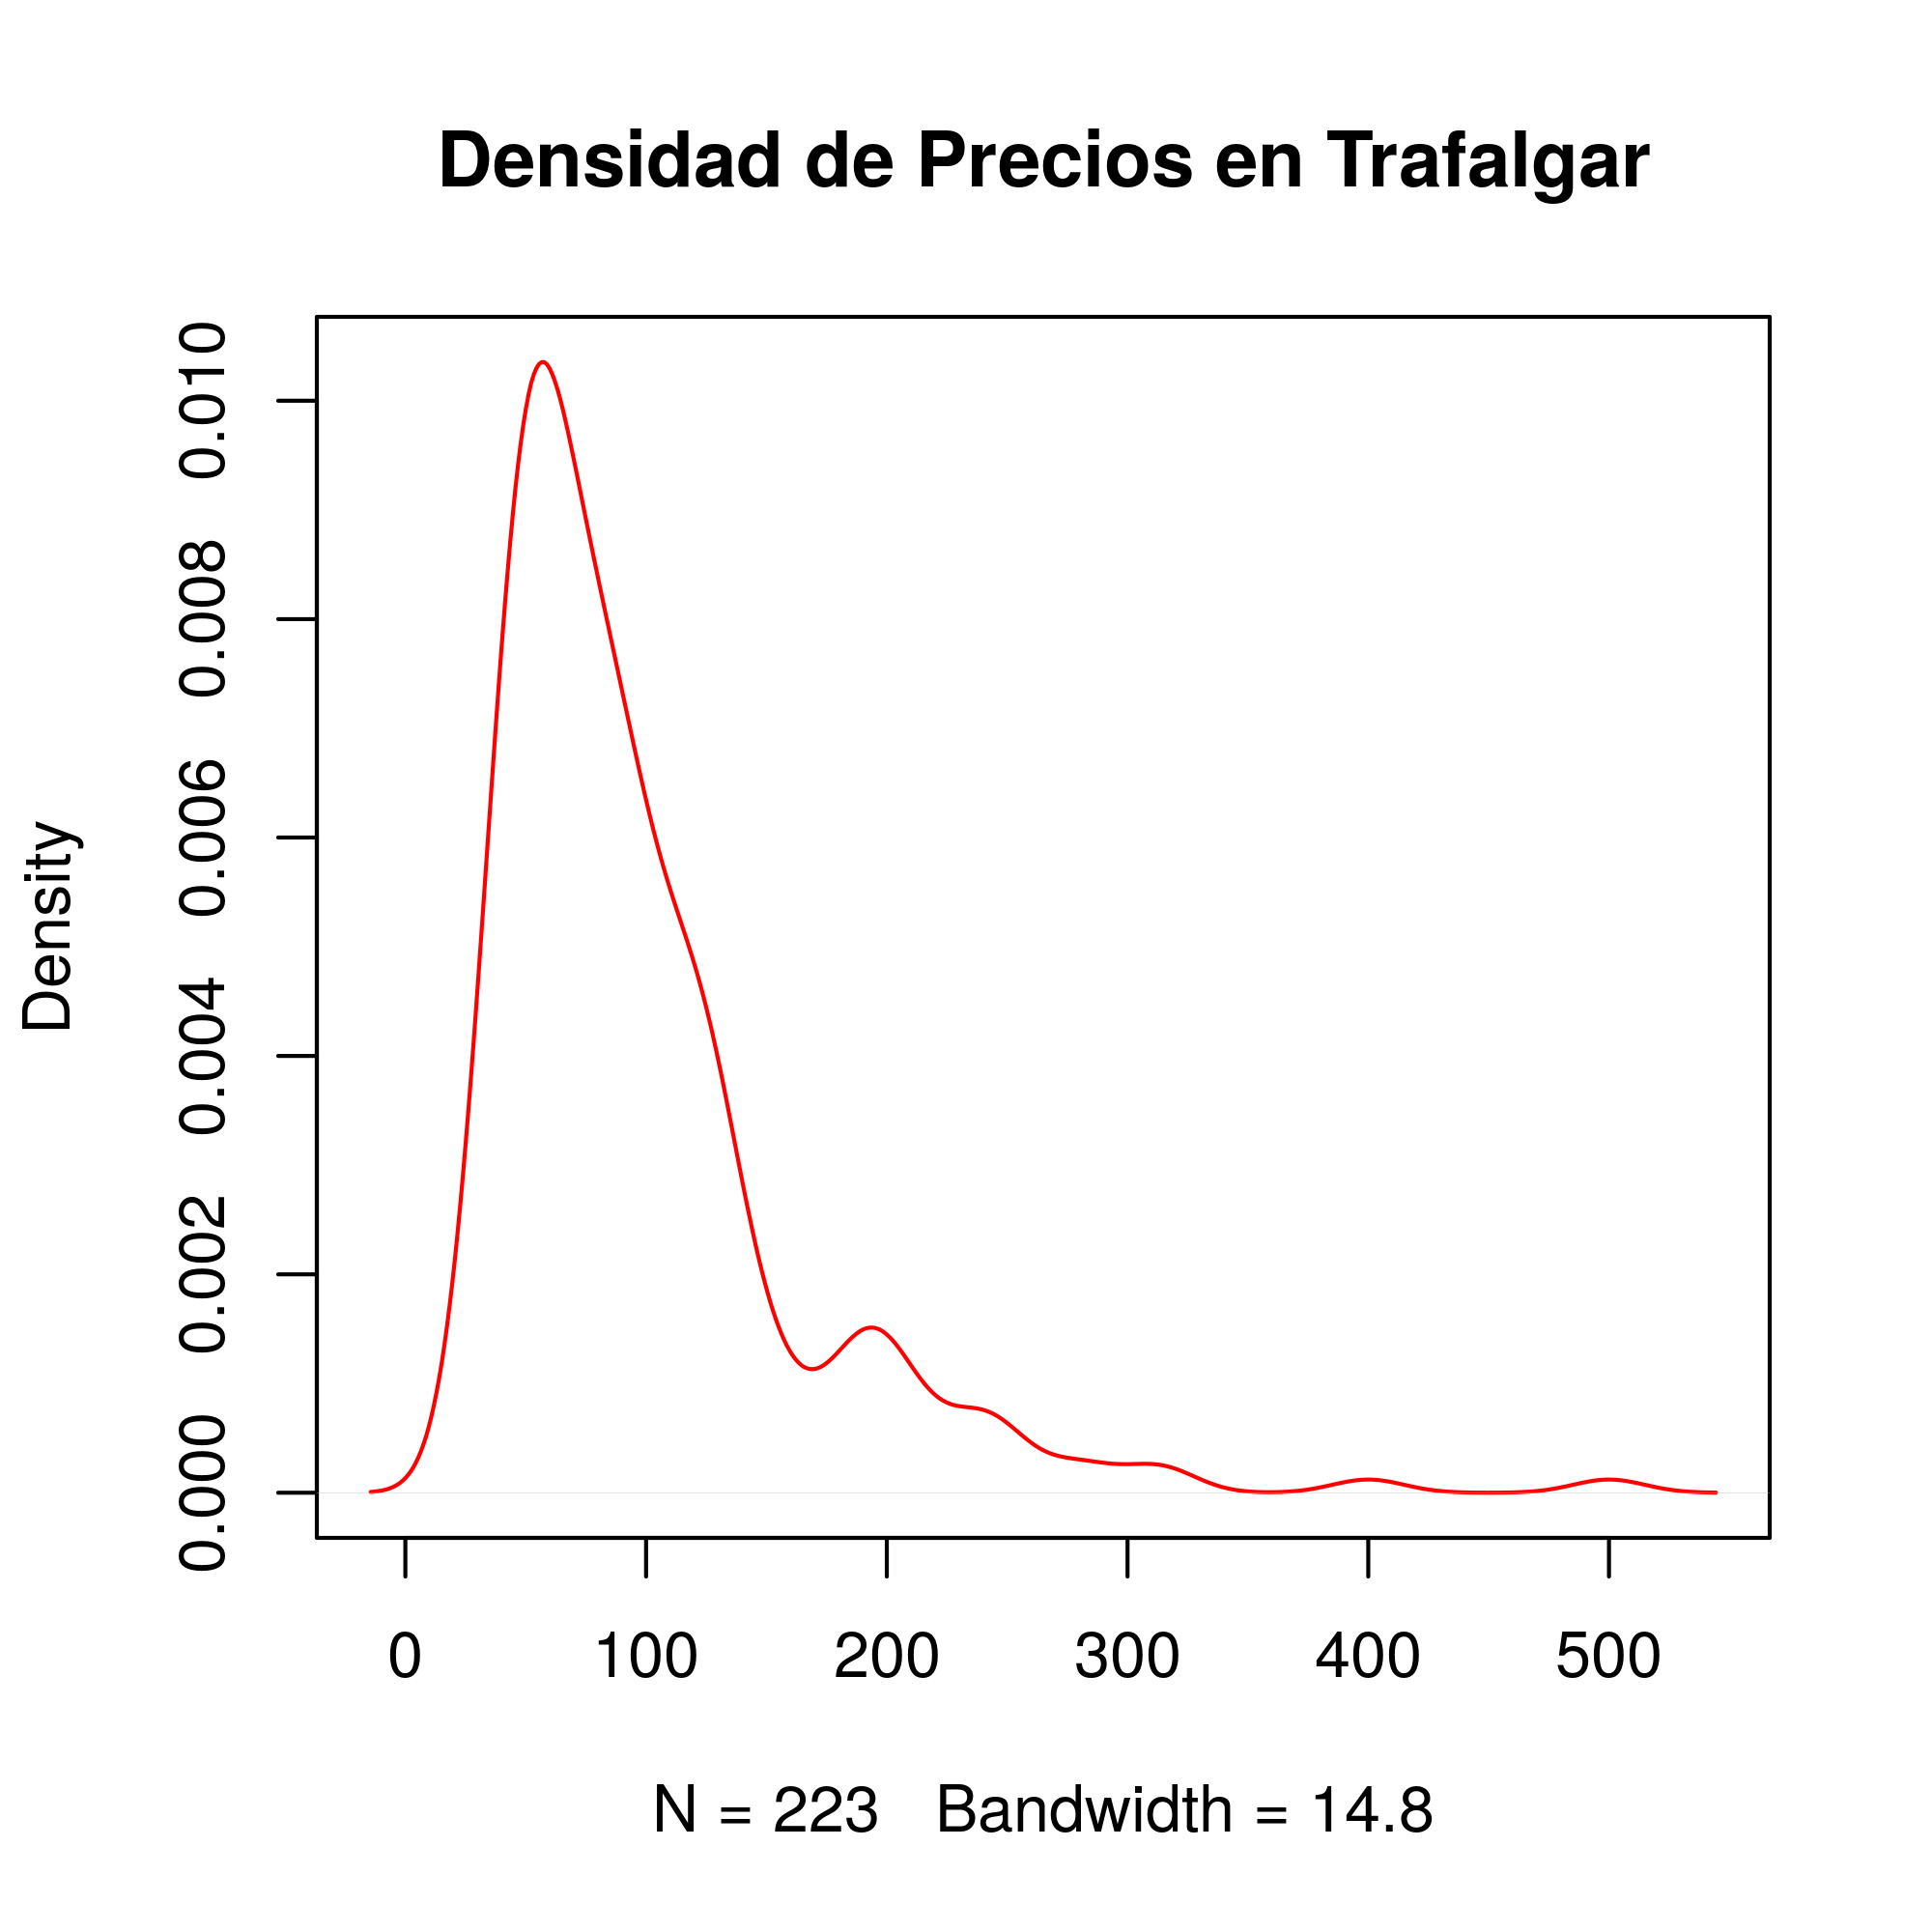

In [366]:
print("Ahora voy a sacar la gráfica de Trafalgar -->")
d4<- density(Trafalgar$Precio)
plot(d4, main="Densidad de Precios en Trafalgar", col="red")

[1] "Ahora voy a sacar la gráfica de Justicia -->"


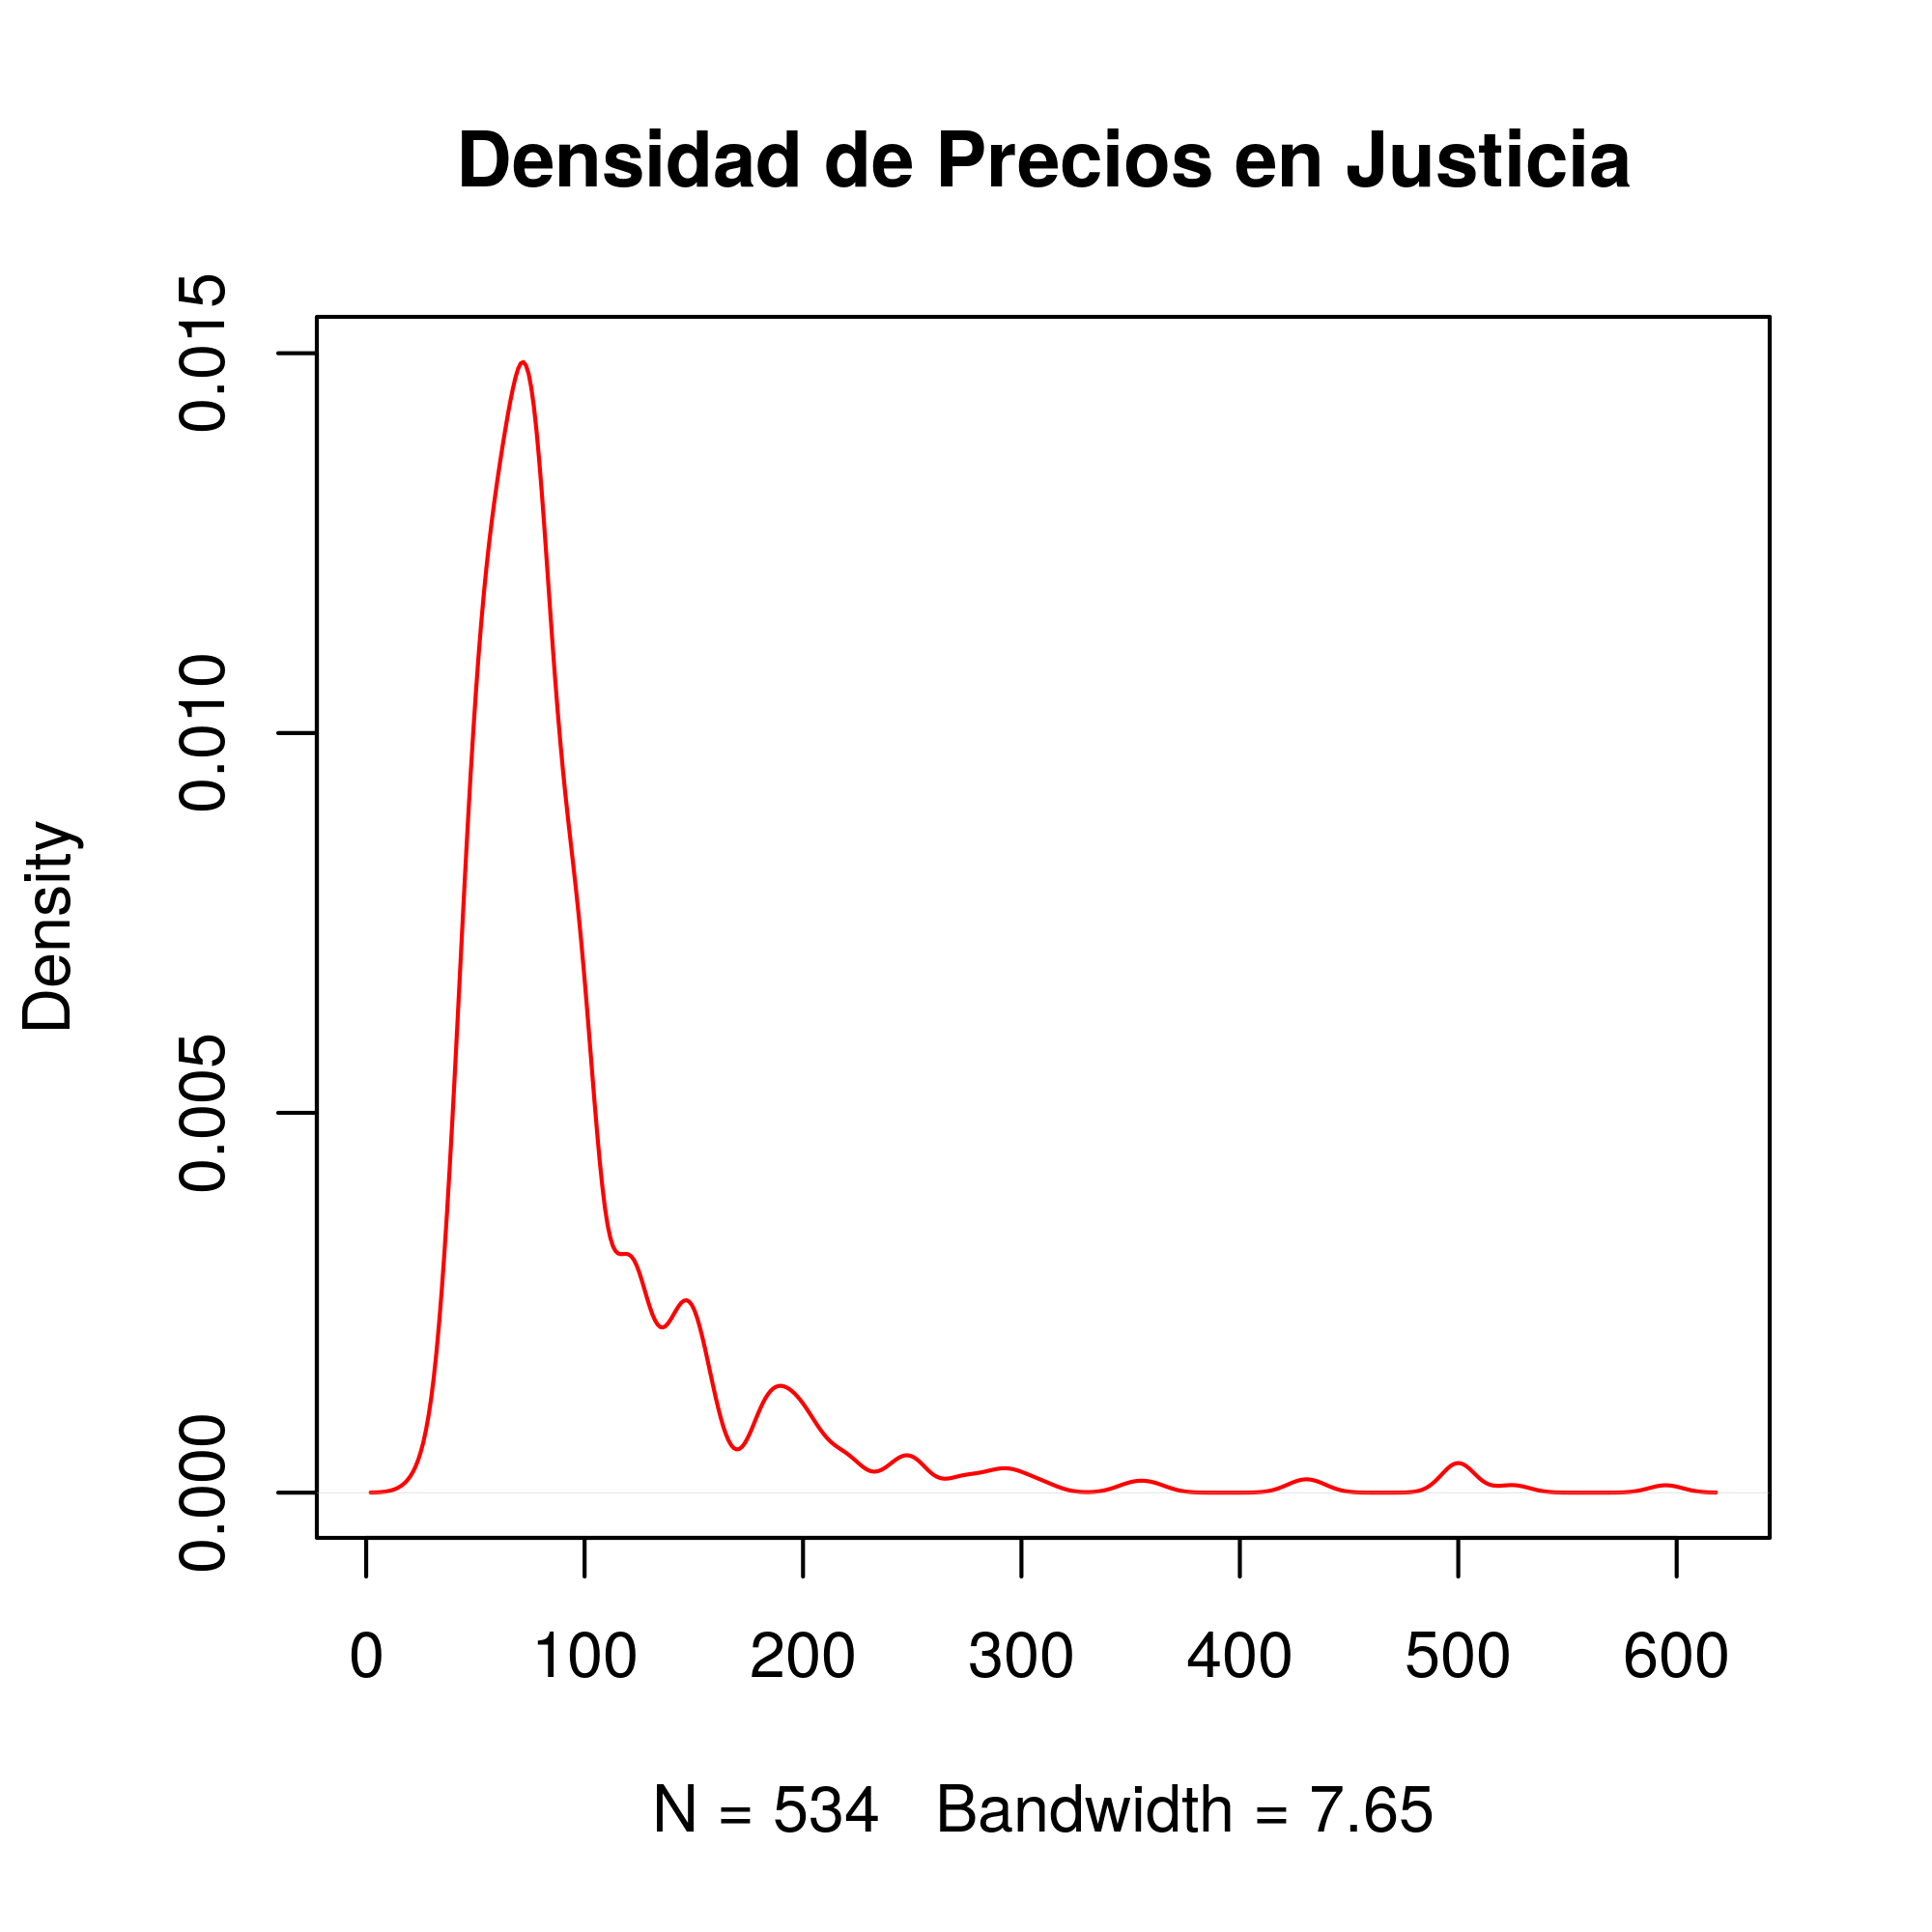

In [367]:
print("Ahora voy a sacar la gráfica de Justicia -->")
d5<- density(Justicia$Precio)
plot(d5, main="Densidad de Precios en Justicia", col="red")

Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

In [400]:
print("Vuelvo a generar los subsets correspondientes")
RecoletosM2 <- drop_na(subset(airbnb_entire, Barrio == "Recoletos", select = c(MetrosCuadrados)))
GoyaM2 <- drop_na(subset(airbnb_entire, Barrio == "Goya", select = c(MetrosCuadrados)))
SolM2 <- drop_na(subset(airbnb_entire, Barrio == "Sol", select = c(MetrosCuadrados)))
TrafalgarM2 <- drop_na(subset(airbnb_entire, Barrio == "Trafalgar", select = c(MetrosCuadrados)))
JusticiaM2 <- drop_na(subset(airbnb_entire, Barrio == "Justicia", select = c(MetrosCuadrados)))
print("Una vez realizado esto, genero los diagramas de densidad de distribución")

[1] "Vuelvo a generar los subsets correspondientes"
[1] "Una vez realizado esto, genero los diagramas de densidad de distribución"


[1] "Ahora voy a sacar la gráfica de Recoletos -->"


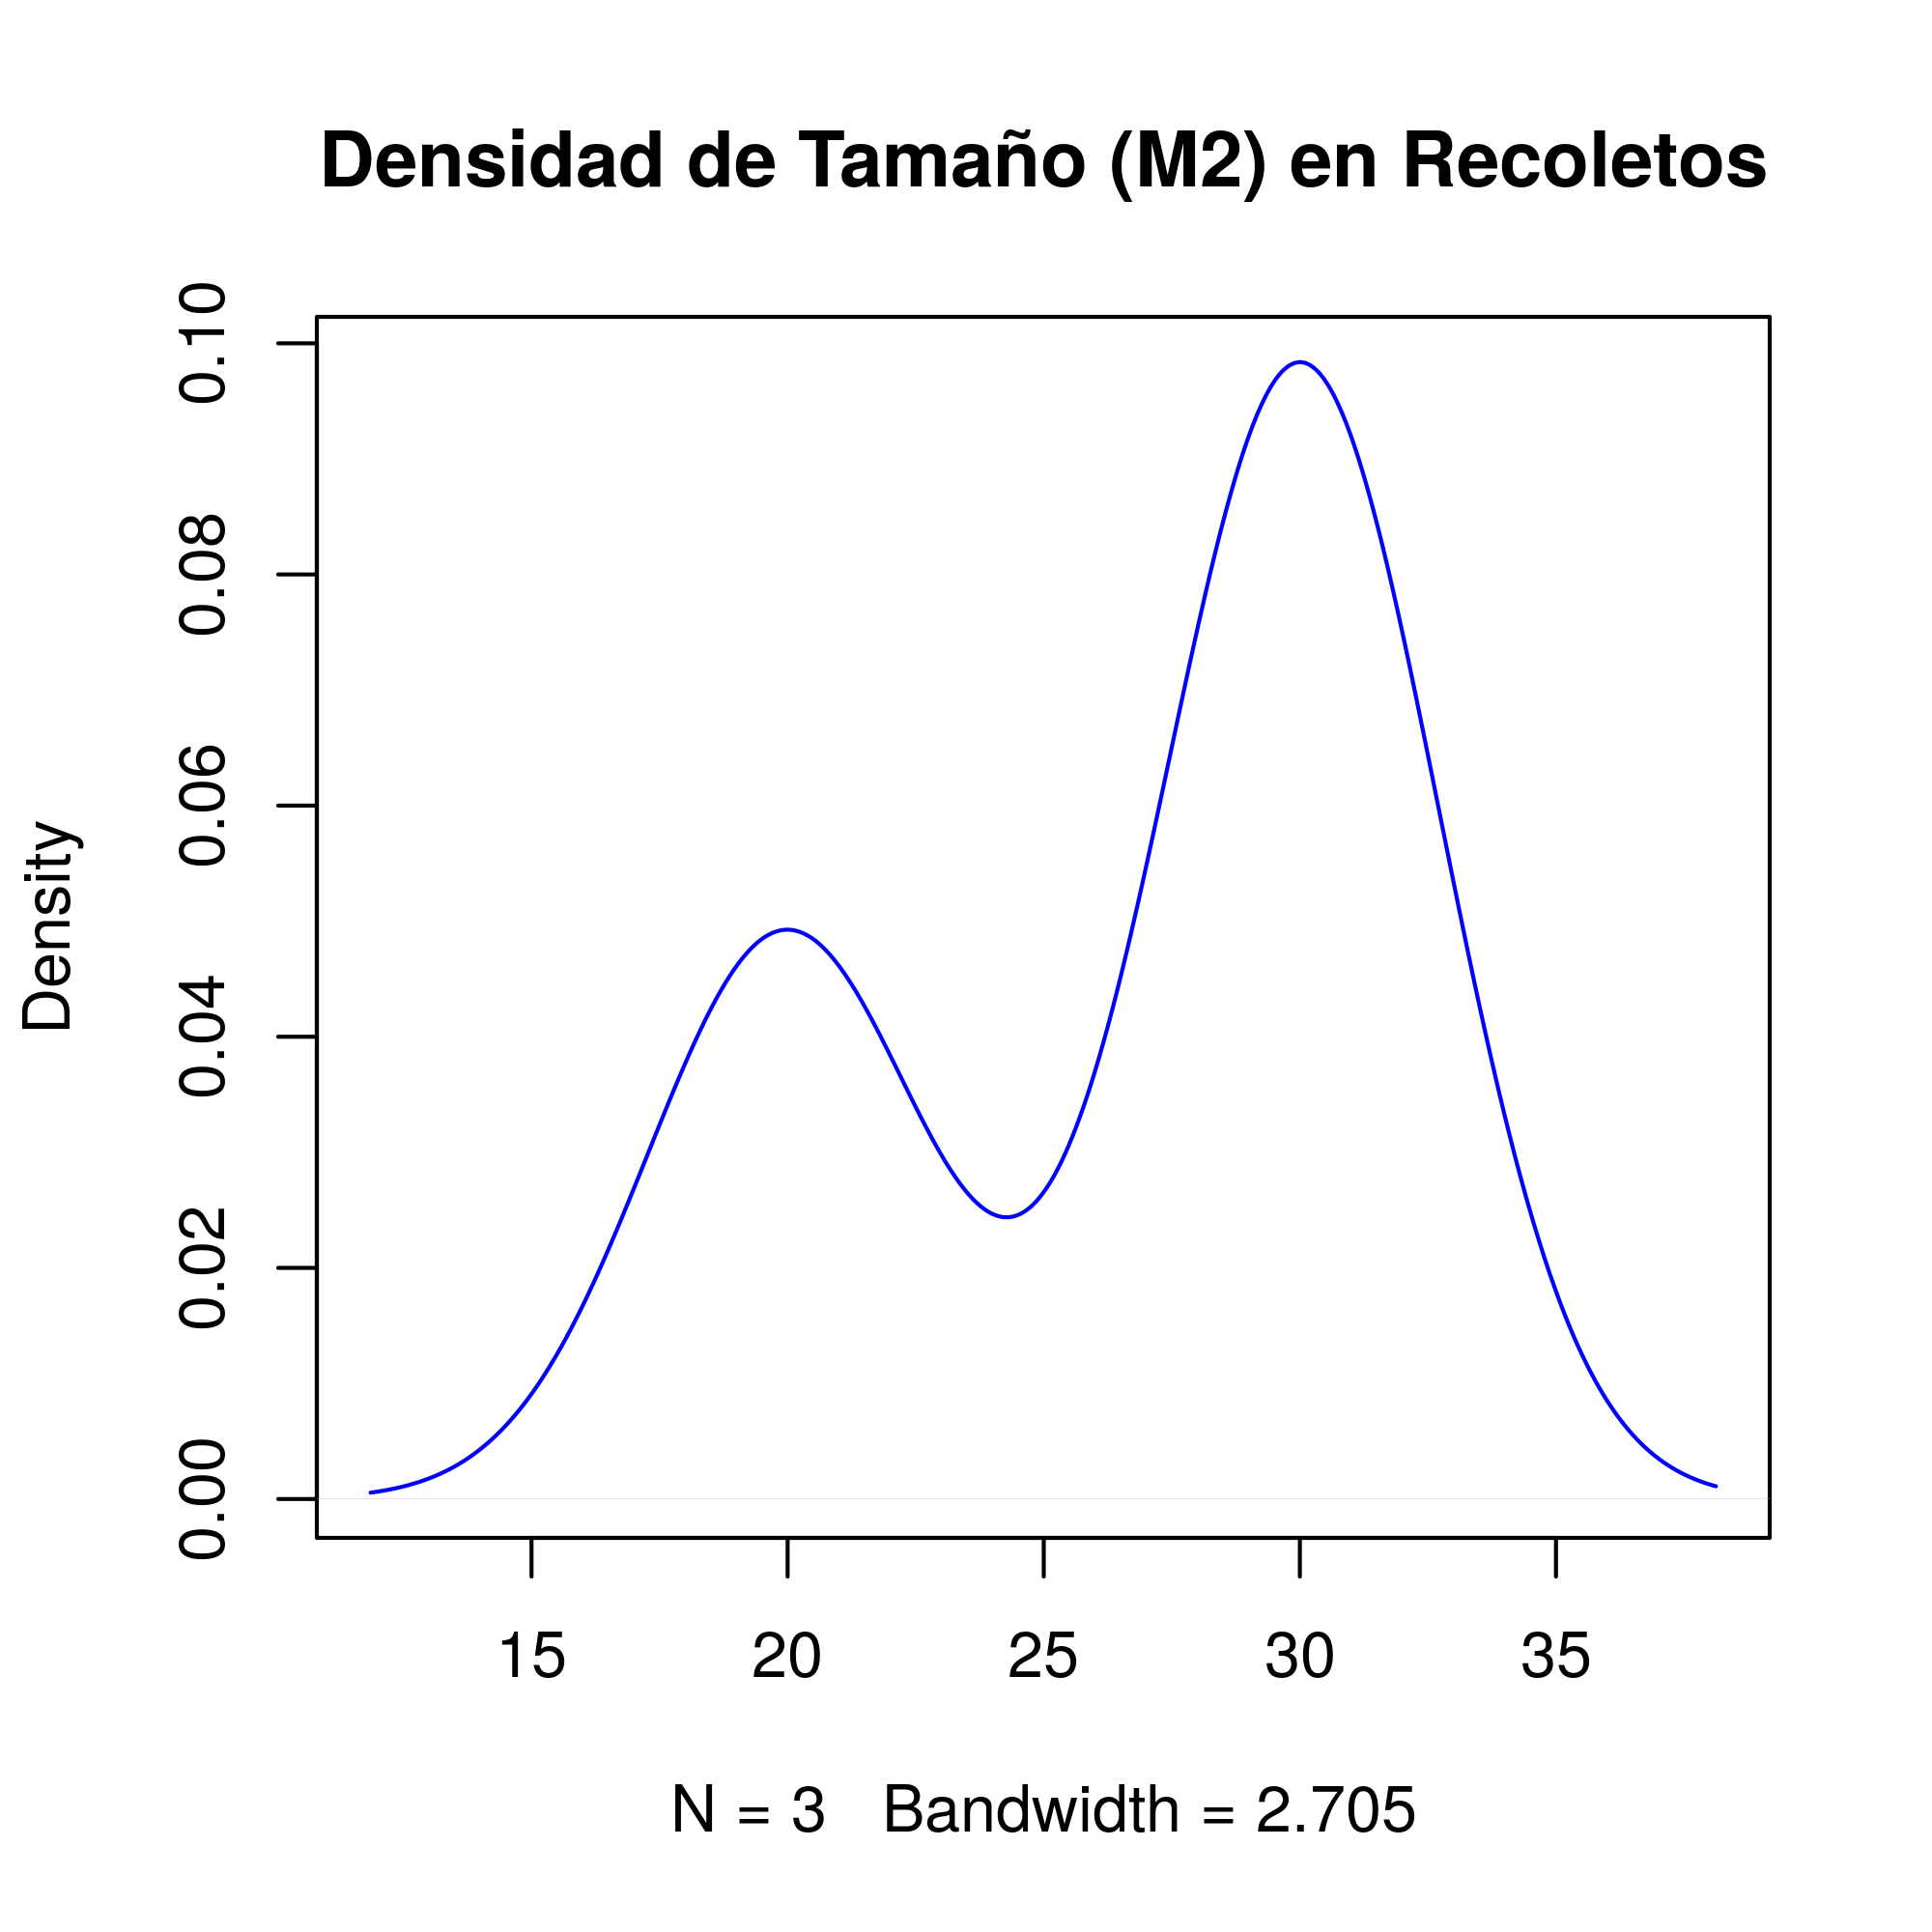

In [372]:
print("Ahora voy a sacar la gráfica de Recoletos -->")
d1<- density(RecoletosM2$MetrosCuadrados)
plot(d1, main="Densidad de Tamaño (M2) en Recoletos", col="blue")

[1] "Ahora voy a sacar la gráfica de Goya -->"


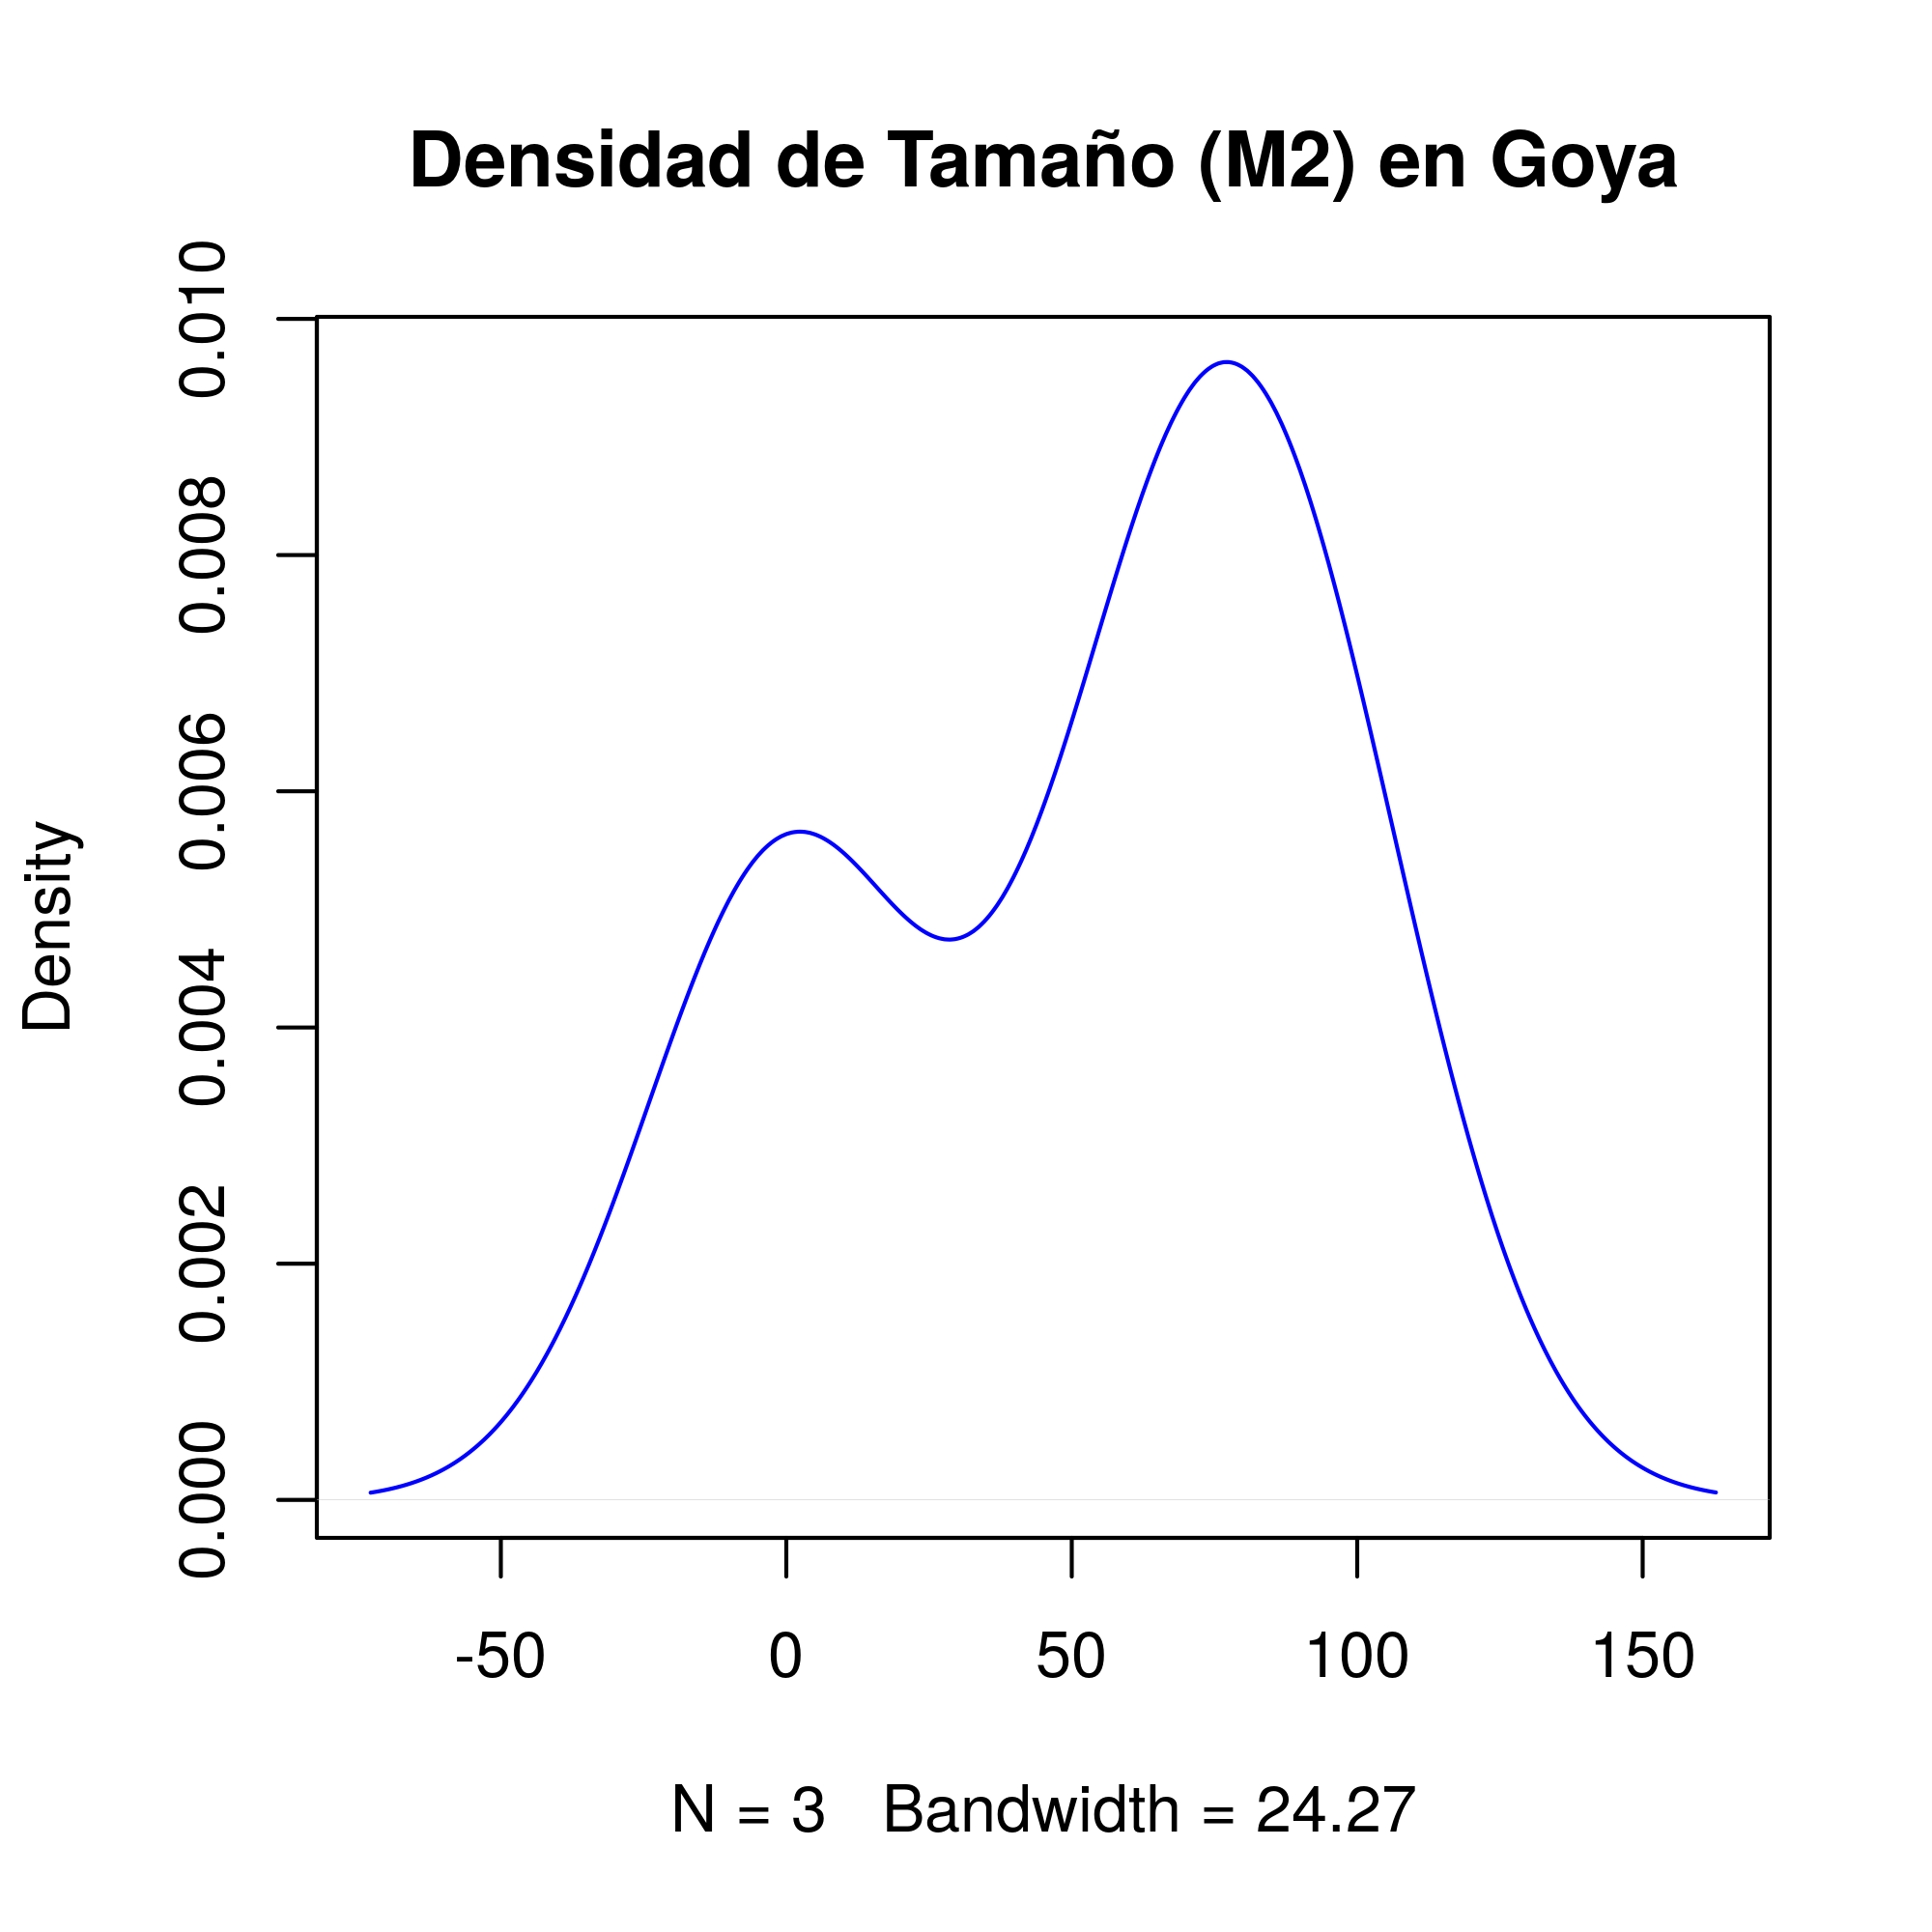

In [373]:
print("Ahora voy a sacar la gráfica de Goya -->")
d2<- density(GoyaM2$MetrosCuadrados)
plot(d2, main="Densidad de Tamaño (M2) en Goya", col="blue")

[1] "Ahora voy a sacar la gráfica de Sol -->"


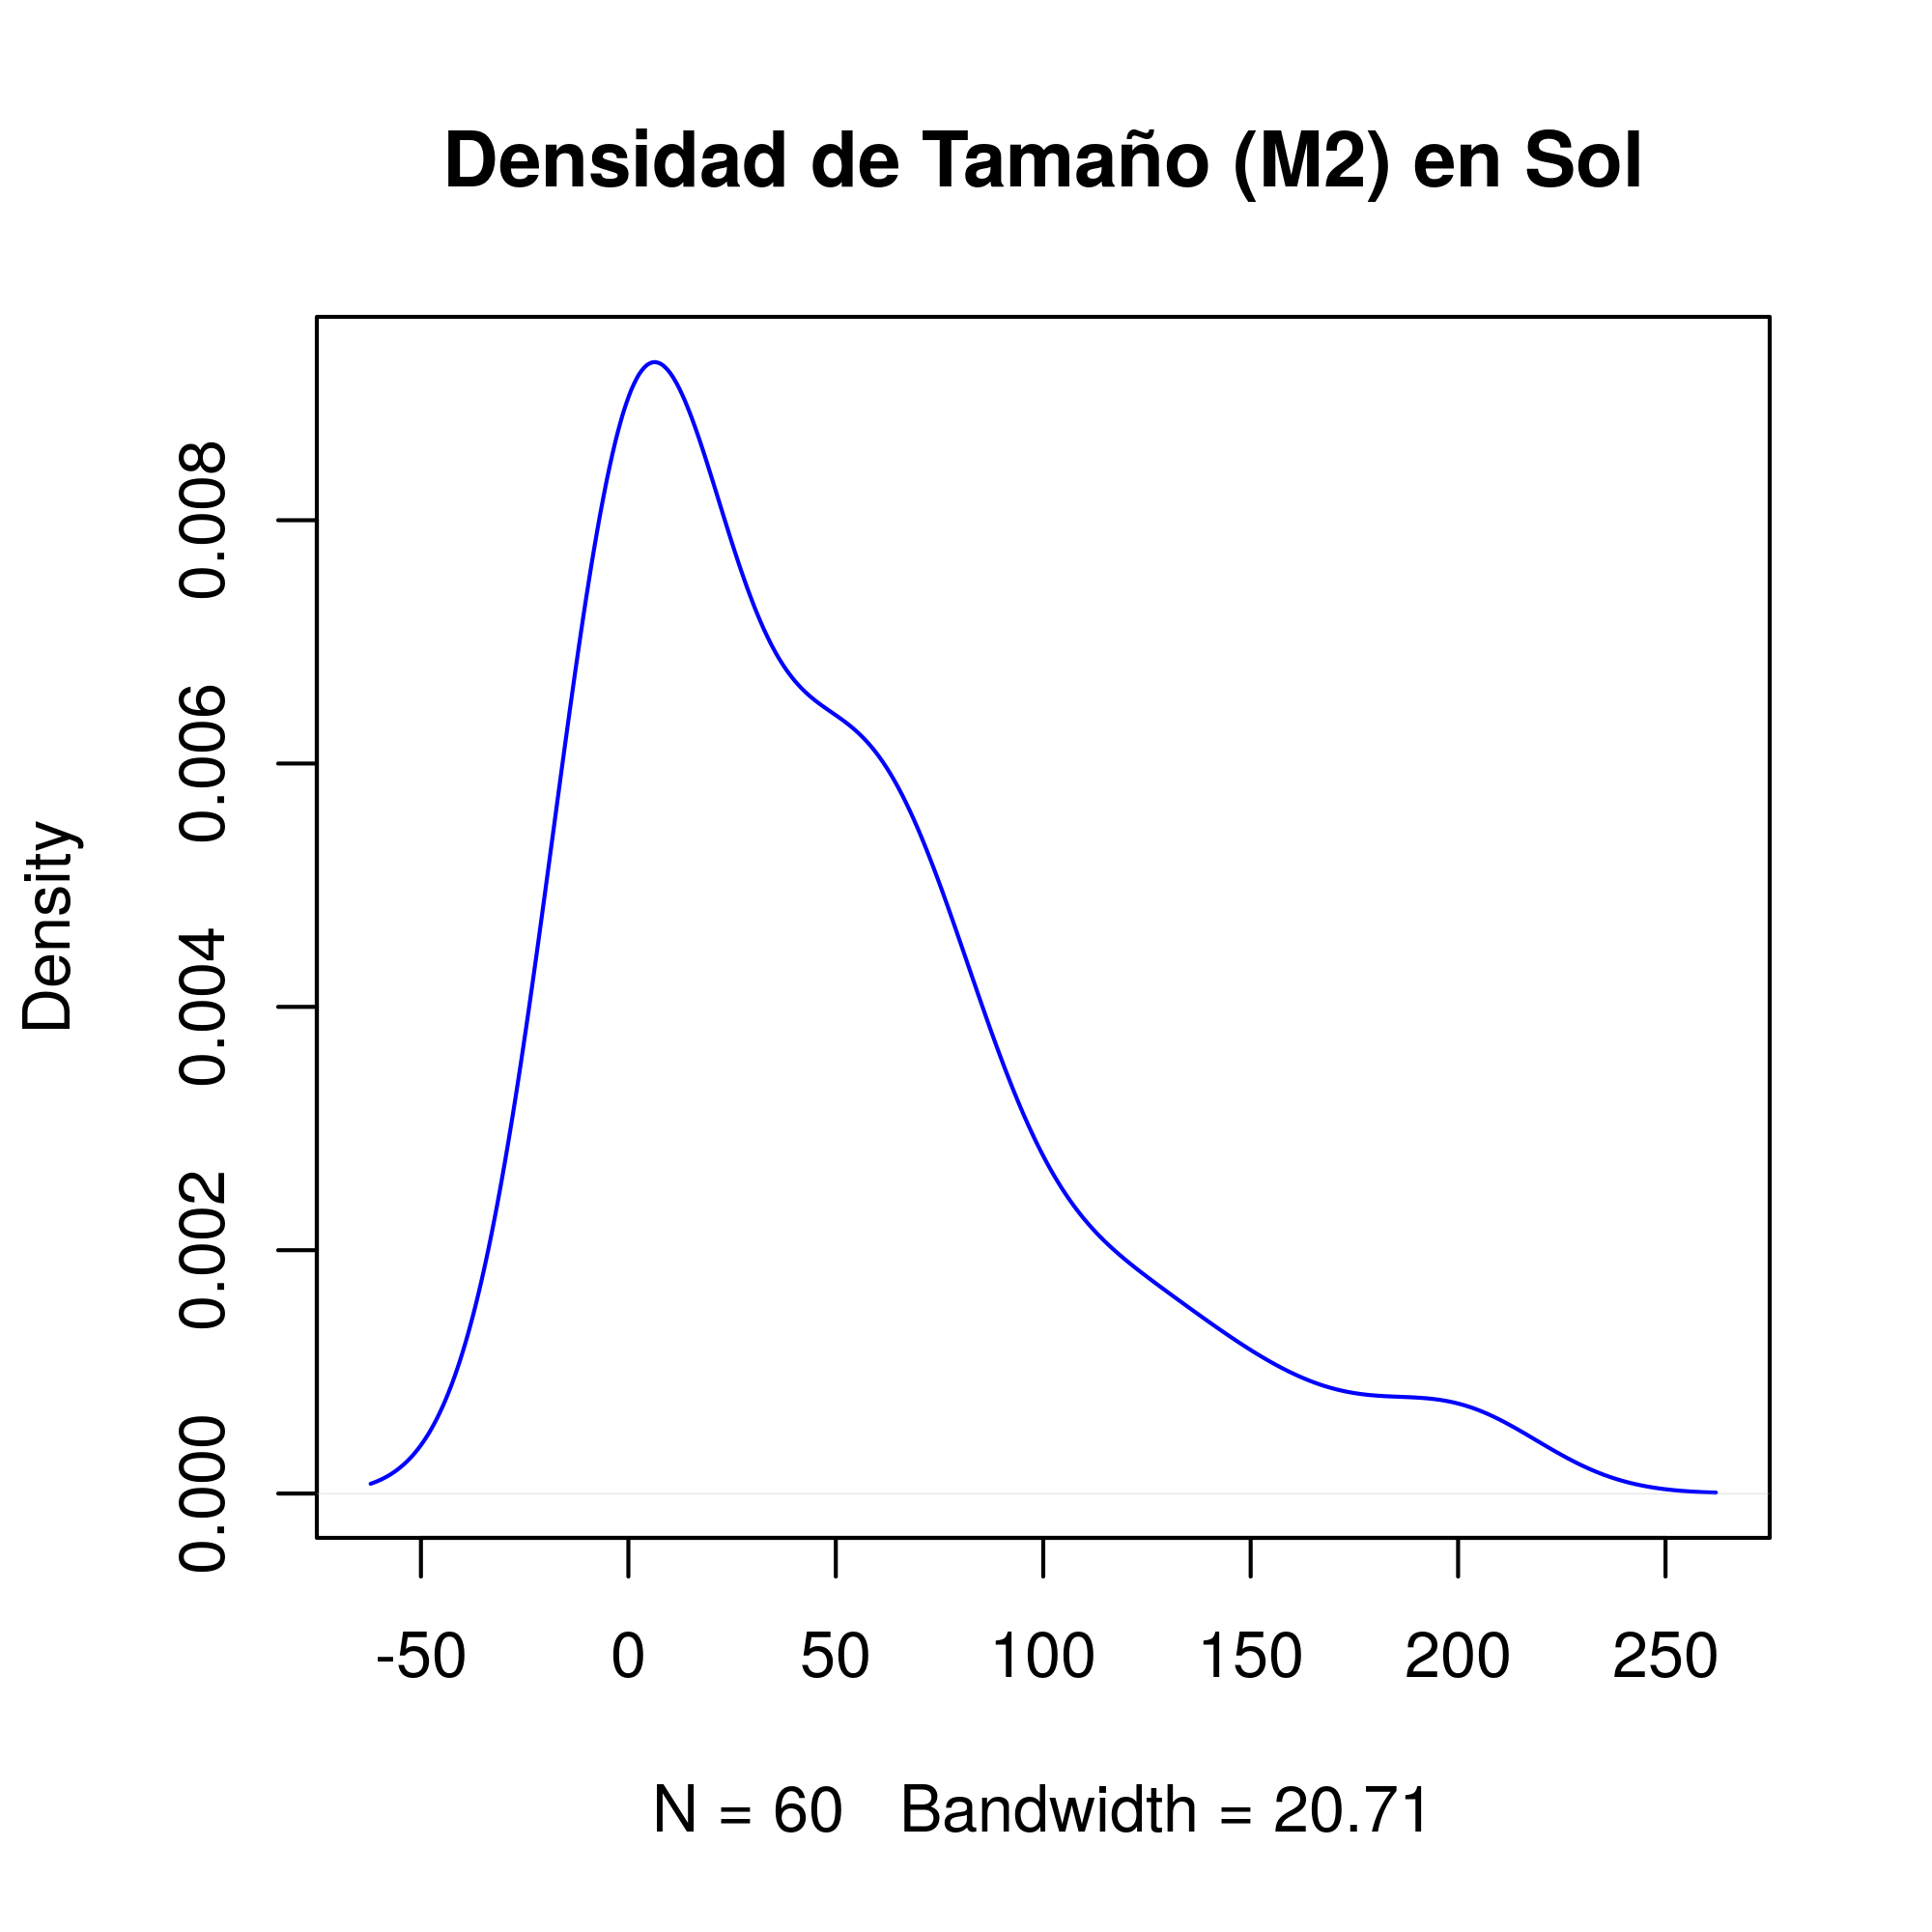

In [374]:
print("Ahora voy a sacar la gráfica de Sol -->")
d3<- density(SolM2$MetrosCuadrados)
plot(d3, main="Densidad de Tamaño (M2) en Sol", col="blue")

[1] "Ahora voy a sacar la gráfica de Trafalgar -->"


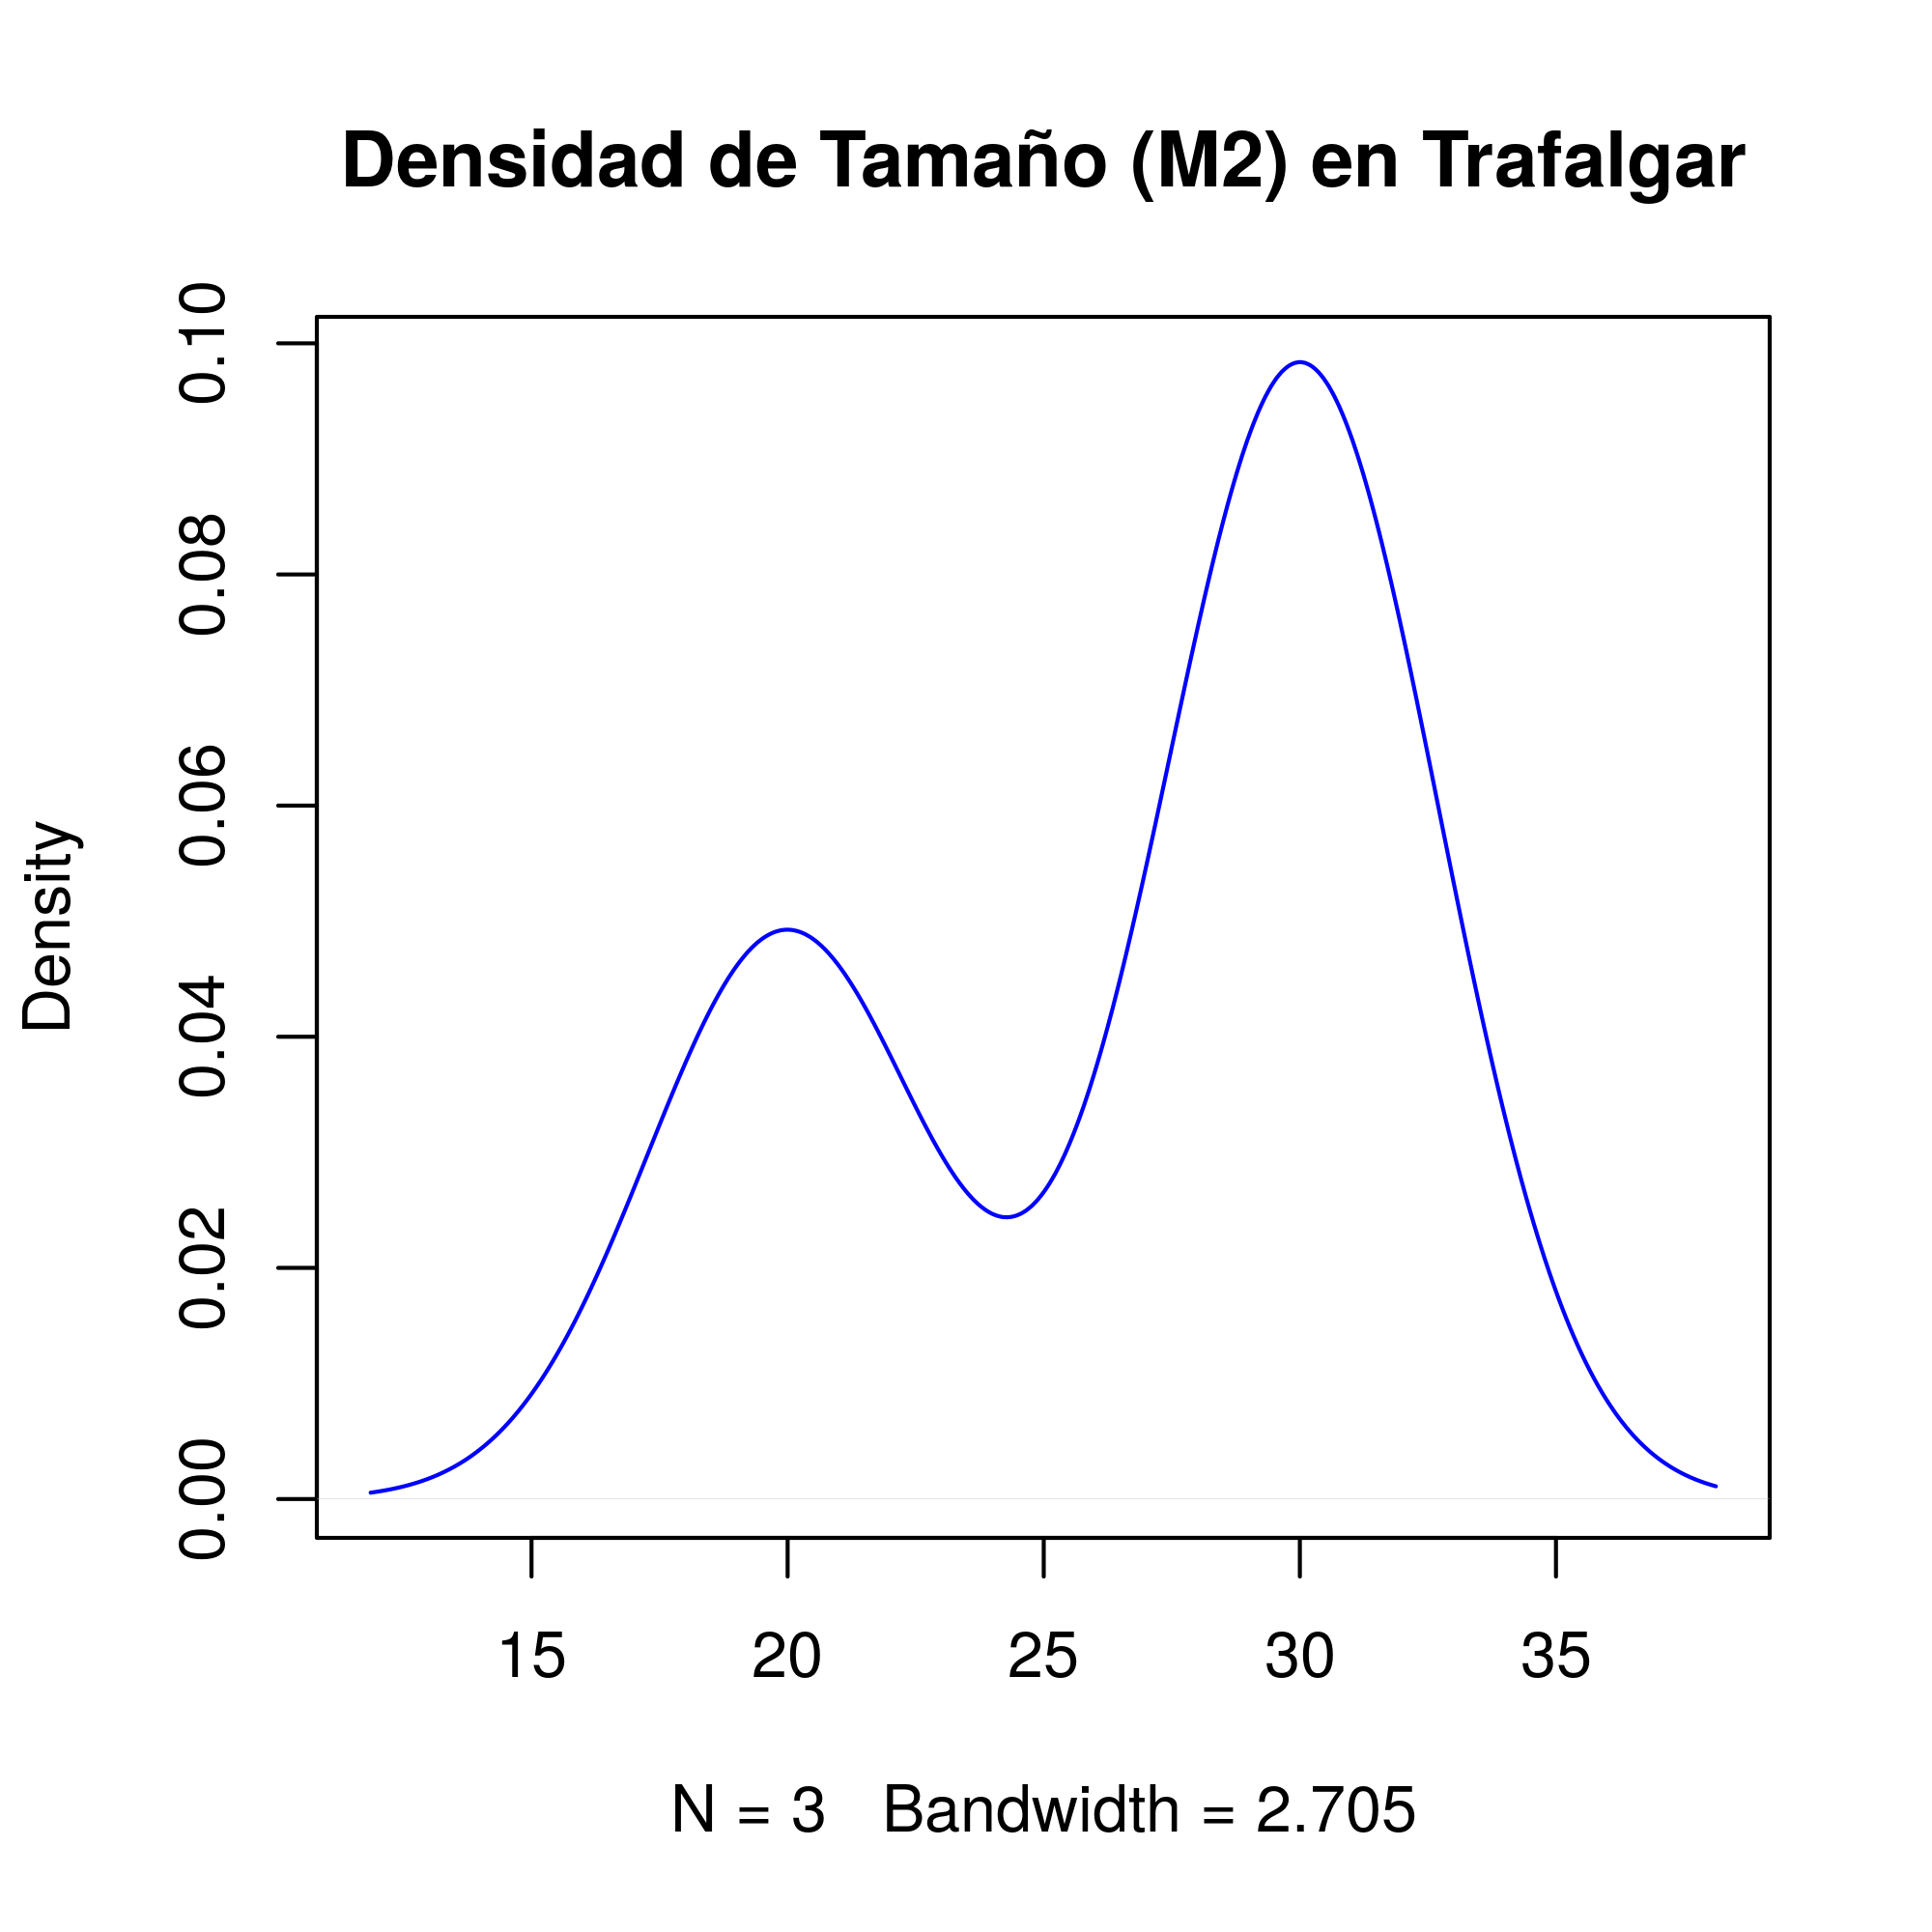

In [375]:
print("Ahora voy a sacar la gráfica de Trafalgar -->")
d4<- density(TrafalgarM2$MetrosCuadrados)
plot(d1, main="Densidad de Tamaño (M2) en Trafalgar", col="blue")

[1] "Ahora voy a sacar la gráfica de Justicia -->"


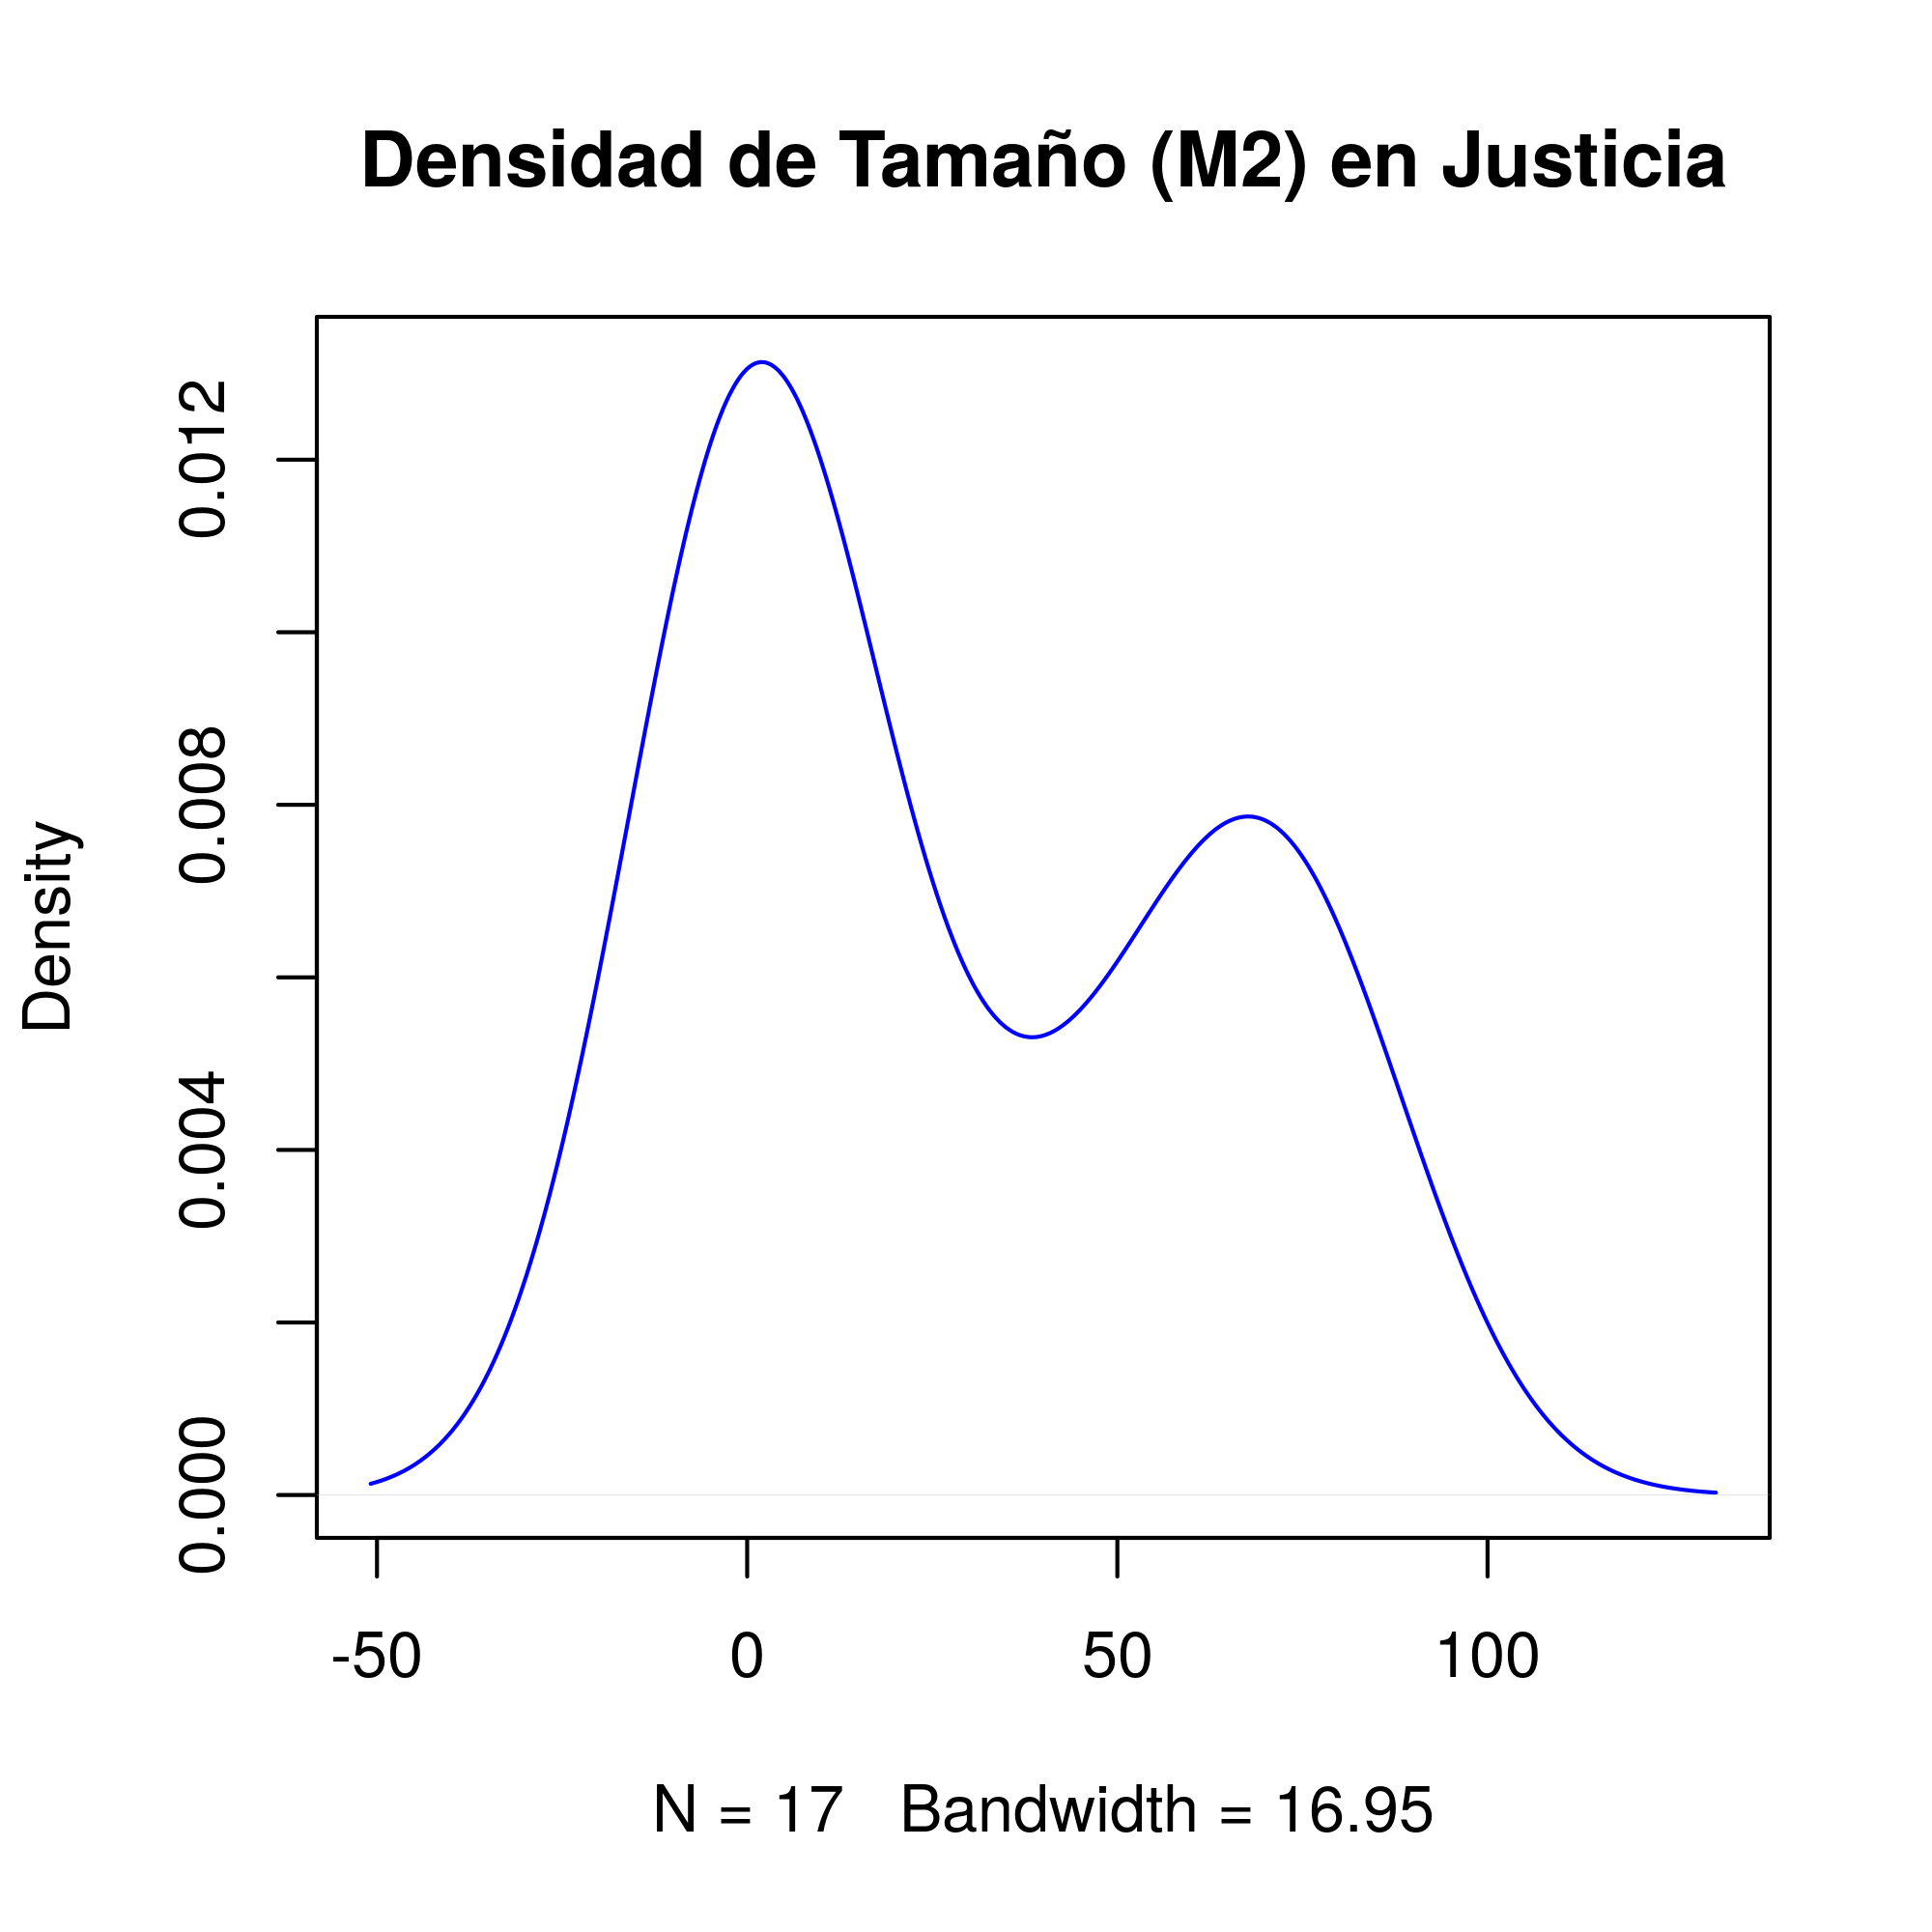

In [376]:
print("Ahora voy a sacar la gráfica de Justicia -->")
d5<- density(JusticiaM2$MetrosCuadrados)
plot(d5, main="Densidad de Tamaño (M2) en Justicia", col="blue")

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?


	Shapiro-Wilk normality test

data:  muestra$MetrosCuadrados
W = 0.82315, p-value = 5.323e-09


[1] "No tiene un comportamiento normal"
[1] "Utilizaré el método de Kruskal-Wallis"


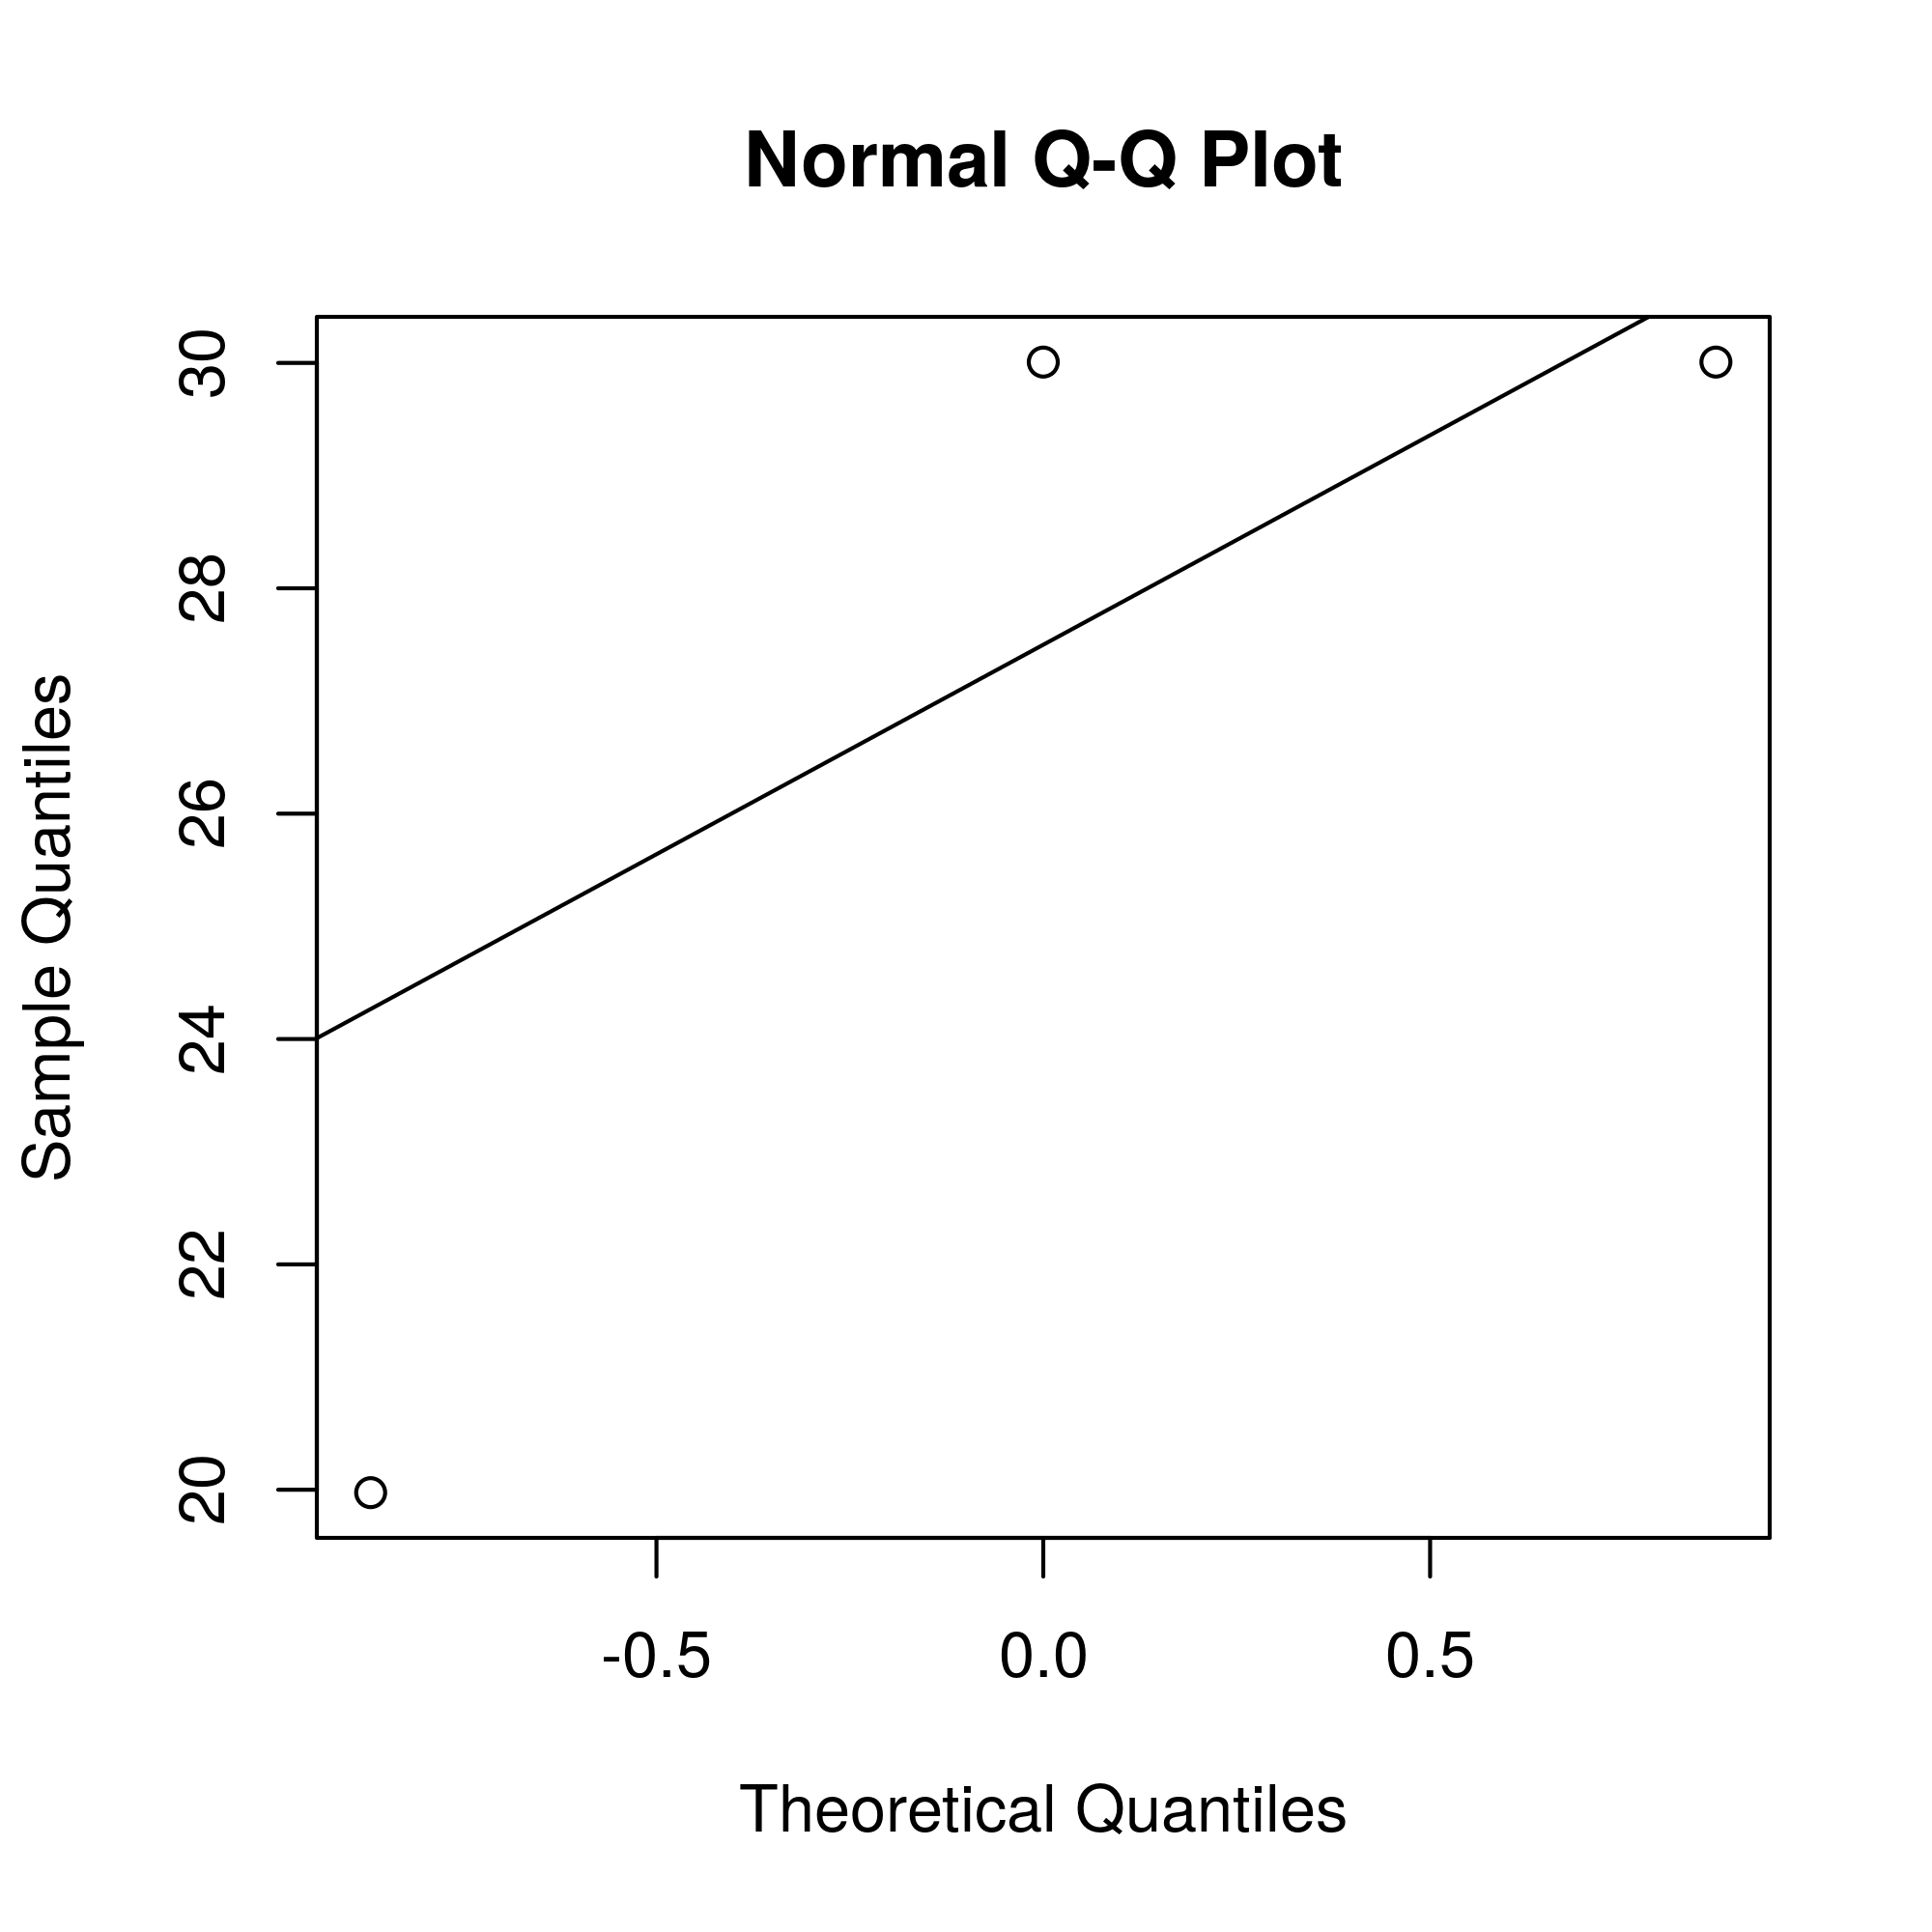

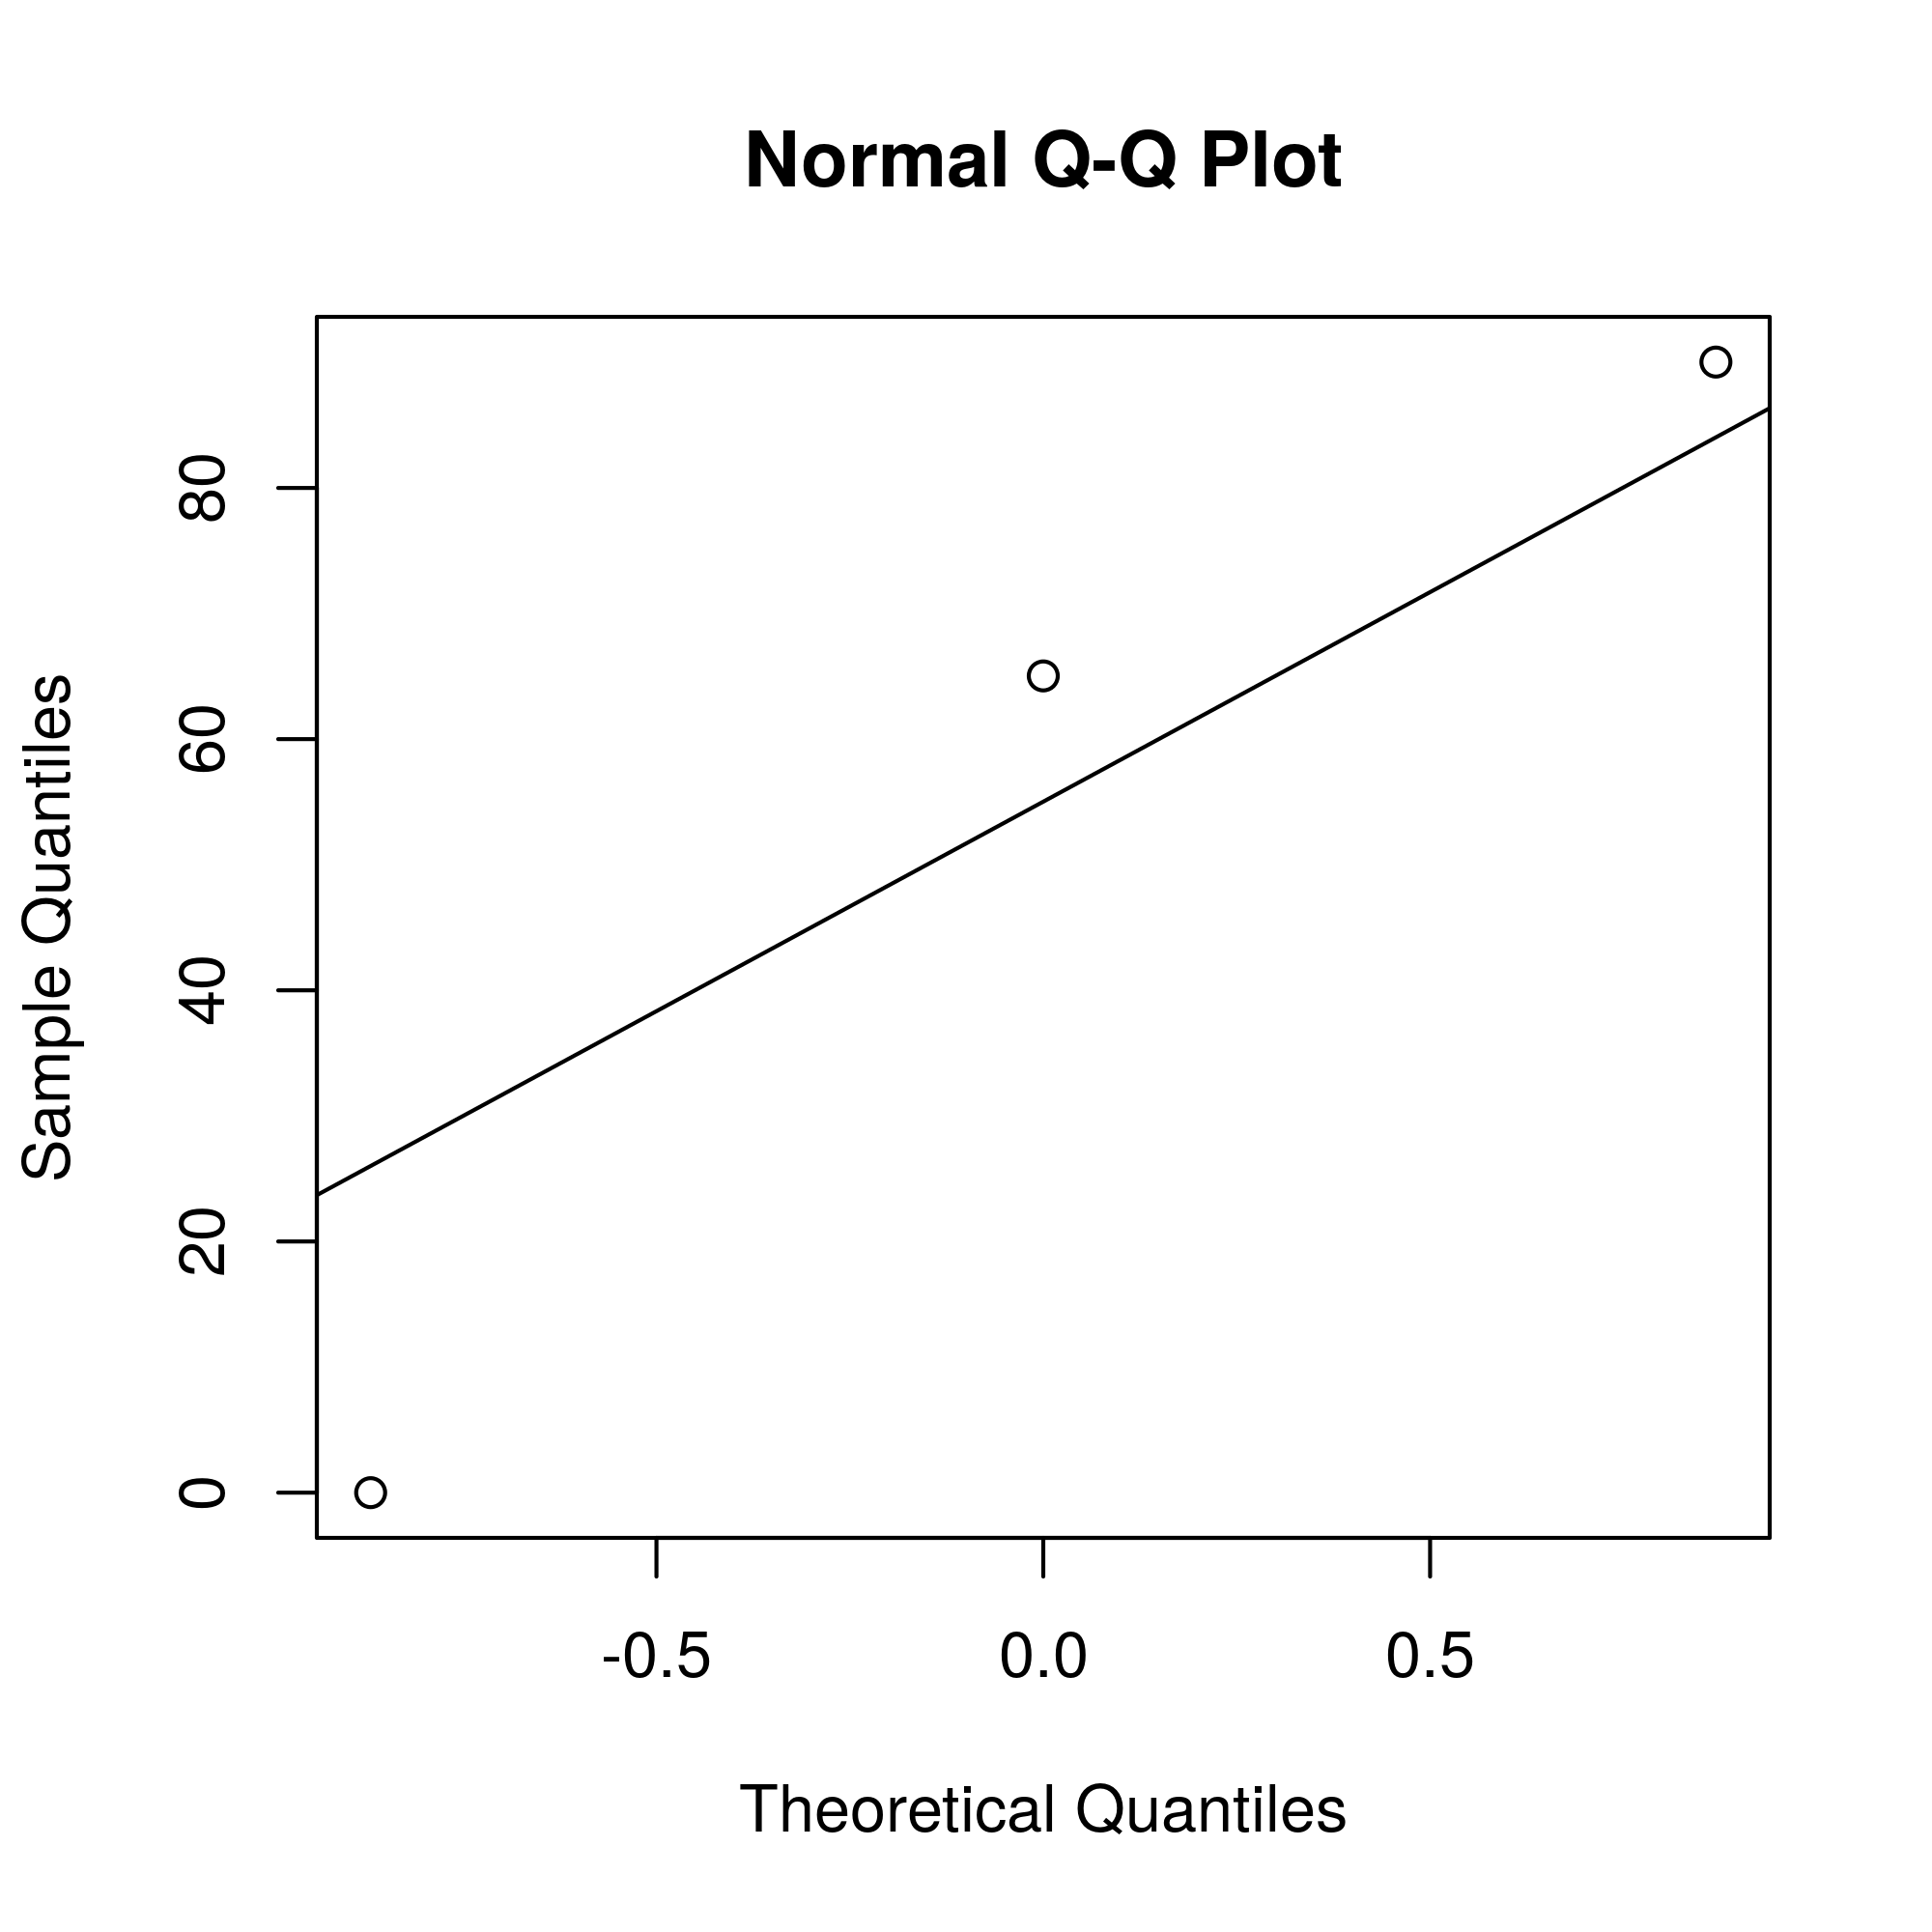

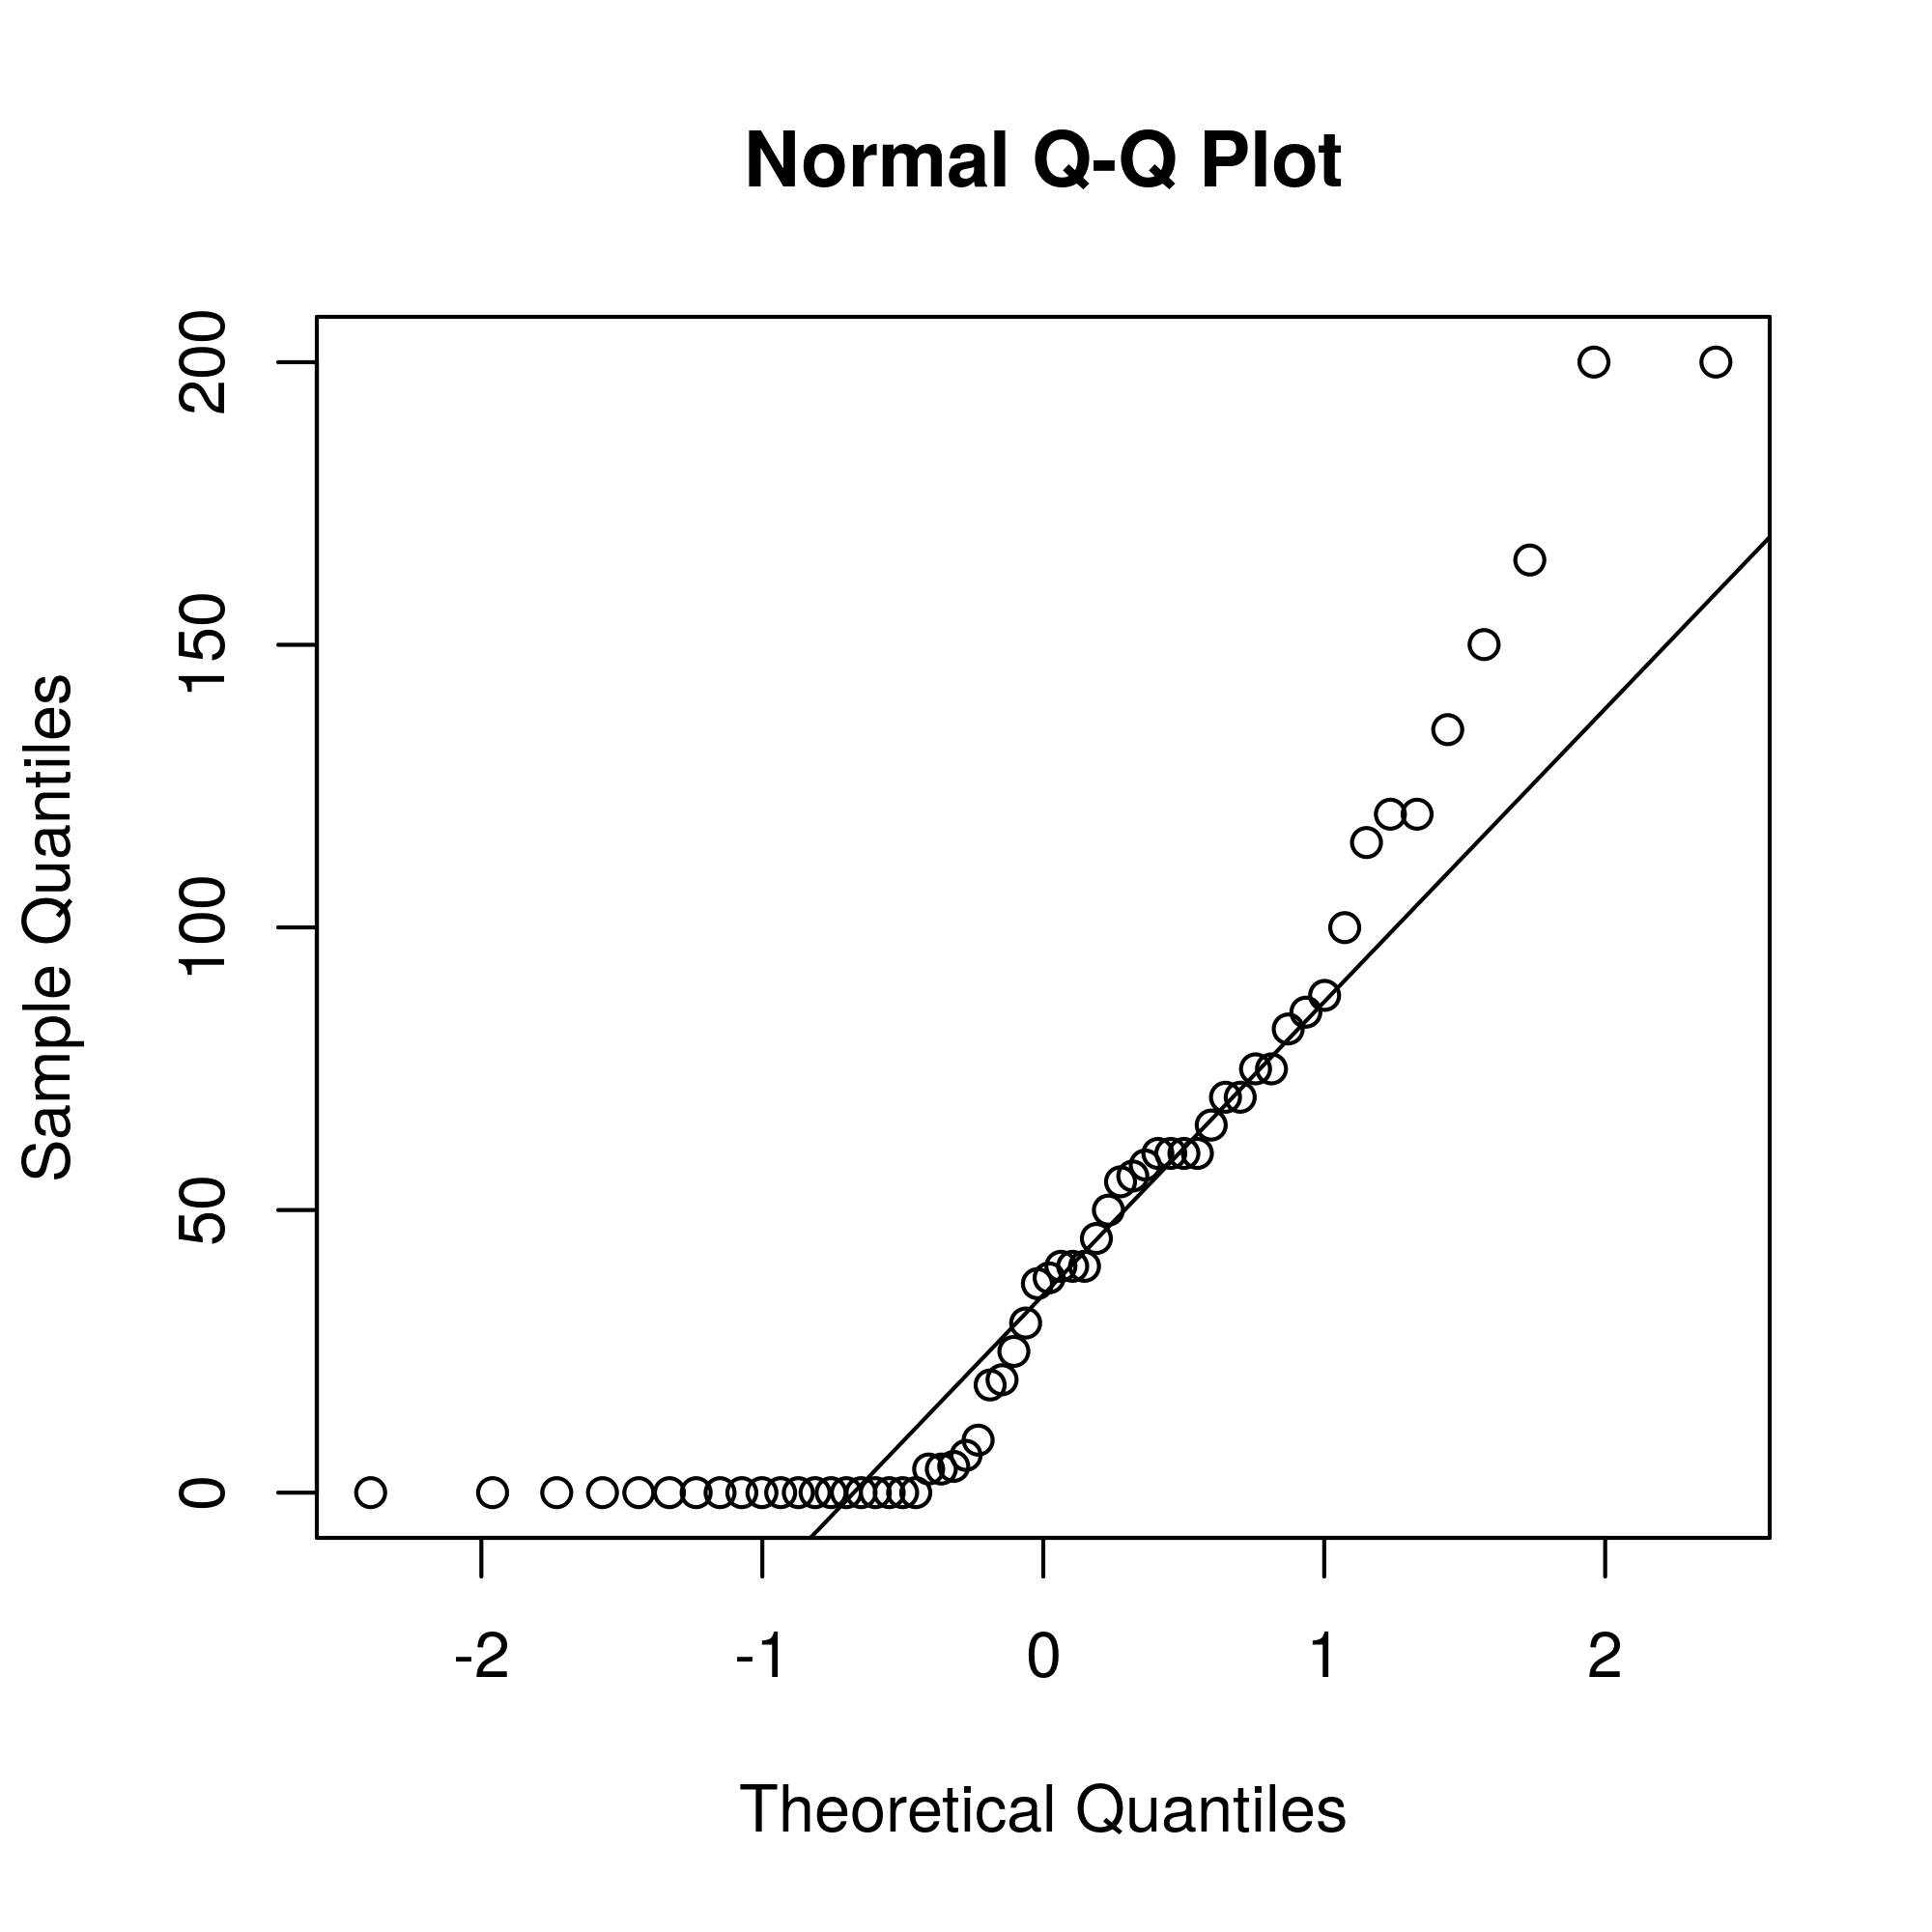

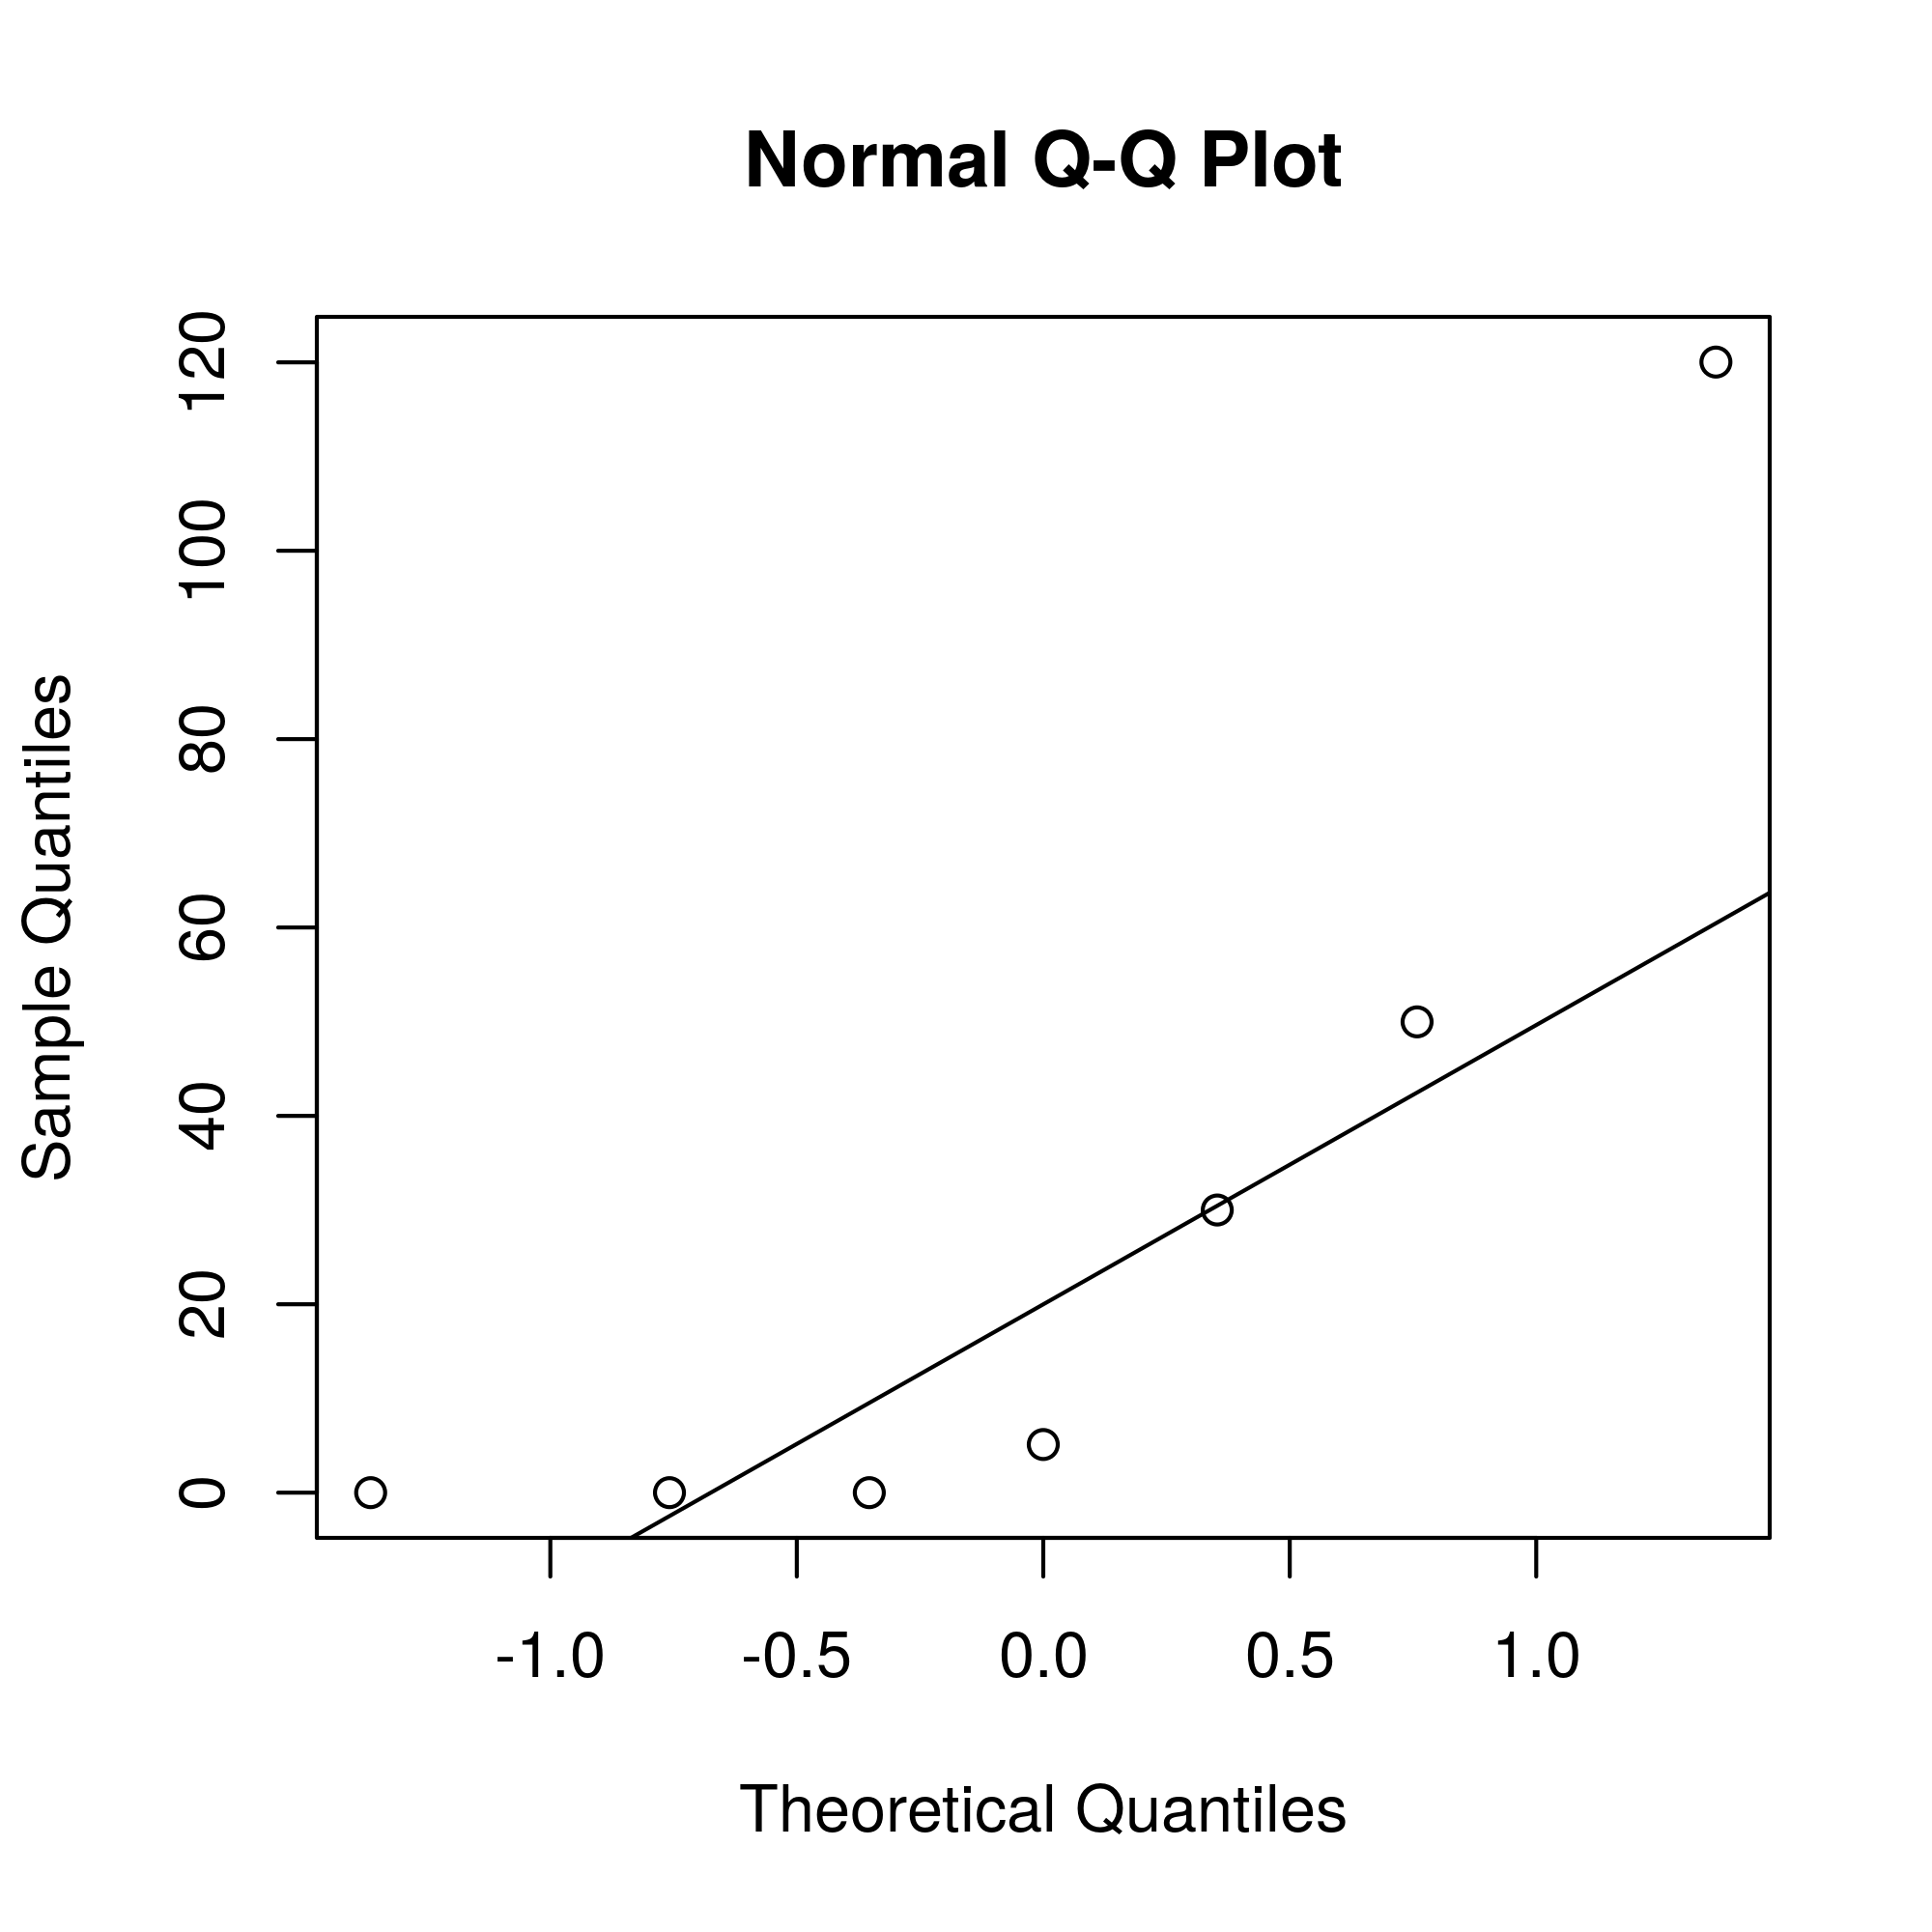

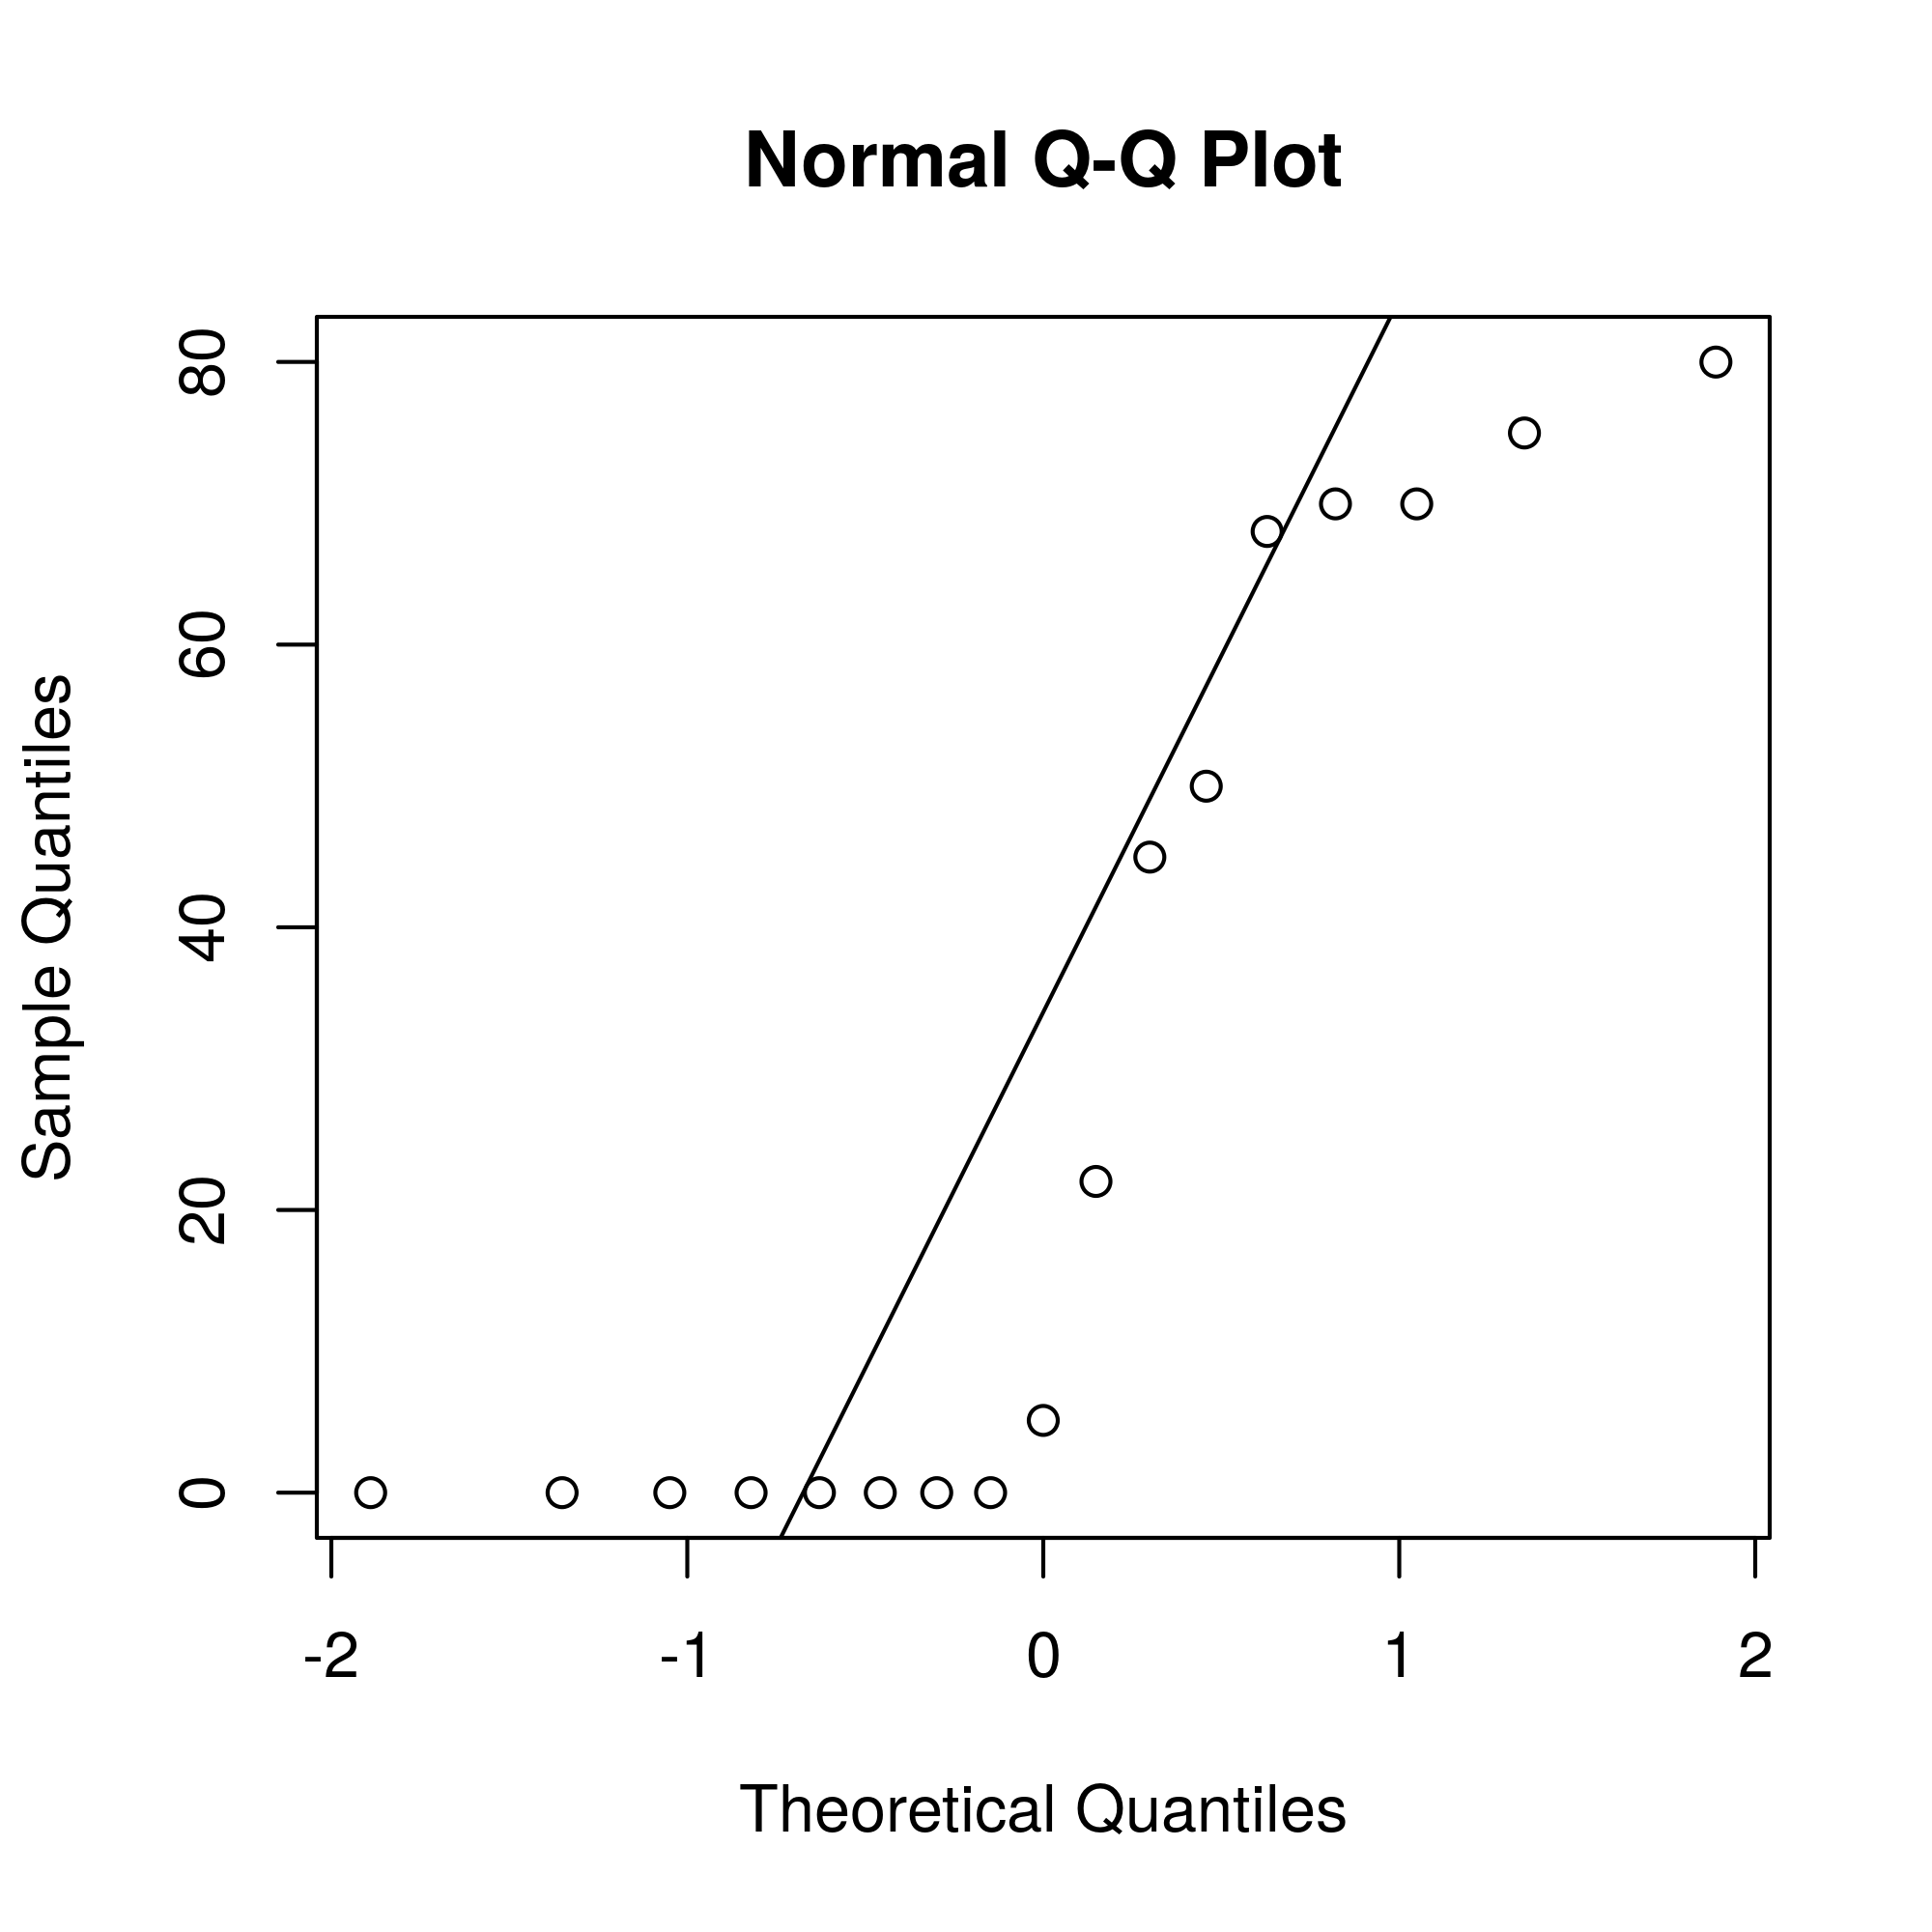

In [455]:
#La representación gráfica de los datos muestra que las muestras no se distribuyen de forma normal
#lo que deja fuera el test ANOVA. 
#Salvo Sol, que está más disimulada, las muestras muestran una distribución similar, dos picos con un valle enmedio, 
#a falta de comprobar la homogeneieqe de la varianza
#el test de Kruskal-Wallis podría ser una buena opción.
#De todas maneras, vamos a validar si siguen una distribución normal 

Recoletos1 <- subset(airbnb_entire, Barrio == "Recoletos")
Recoletos1 <- Recoletos1 %>% 
  select(Barrio, MetrosCuadrados) 
#head(Recoletos1)

Goya1 <- subset(airbnb_entire, Barrio == "Goya")
Goya1 <- Goya1 %>% 
  select(Barrio, MetrosCuadrados) 
#head(Goya1)

Sol1 <- subset(airbnb_entire, Barrio == "Sol")
Sol1 <- Sol1 %>% 
  select(Barrio, MetrosCuadrados) 
#head(Sol1)

Trafalgar1 <- subset(airbnb_entire, Barrio == "Trafalgar")
Trafalgar1 <- Trafalgar1 %>% 
  select(Barrio, MetrosCuadrados) 
#head(Trafalgar1)

Justicia1 <- subset(airbnb_entire, Barrio == "Justicia")
Justicia1 <- Justicia1 %>% 
  select(Barrio, MetrosCuadrados) 
#head(Justicia1)

#Ahora junto todos
shaptest <- rbind(Recoletos1, Sol1, Goya1, Trafalgar1, Justicia1)

print("Hago el test de Shapiro para validar que NO tiene un comportamiento NORMAL")
# Dado que me marca error por el número de elementos, voy a sacar una muestra -->
muestra <- shaptest %>%
    sample_n(size=1735, replace=FALSE)

shapiro.test(muestra$MetrosCuadrados)
print("No tiene un comportamiento normal")

print("Utilizaré el método de Kruskal-Wallis")
#Lo trabajo para cada uno de los barrios -->
qqnorm(Recoletos1$MetrosCuadrados)
qqline(Recoletos1$MetrosCuadrados)

qqnorm(Goya1$MetrosCuadrados)
qqline(Goya1$MetrosCuadrados)

qqnorm(Sol1$MetrosCuadrados)
qqline(Sol1$MetrosCuadrados)

qqnorm(Trafalgar1$MetrosCuadrados)
qqline(Trafalgar1$MetrosCuadrados)

qqnorm(Justicia1$MetrosCuadrados)
qqline(Justicia1$MetrosCuadrados)

In [456]:
print("voy a aplicar el test de Kruskal, pues en algunos barrios no hay muchos datos")
kruskal.test(MetrosCuadrados ~ Barrio, data=shaptest)
print("El p-valor resulta muy alto, por lo que rechazamos la H1. No hay una diferencia significativa estadísticamente hablando")

[1] "voy a aplicar el test de Kruskal, pues en algunos barrios no hay muchos datos"



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [489]:
barrio_sol<- drop_na(subset(airbnb_entire, Barrio == "Sol")) %>%
    select(Barrio, NumBanyos, NumDormitorios, MaxOcupantes, MetrosCuadrados, Precio)
head (barrio_sol)

,Barrio,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados,Precio
,<fct>,<dbl>,<int>,<int>,<dbl>,<int>
1,Sol,1,1,4,60.01534,75
2,Sol,1,1,4,69.95596,100
3,Sol,1,1,2,24.99091,65
4,Sol,1,0,3,0.00000,41
5,Sol,2,2,5,0.00000,90
6,Sol,2,4,8,200.02016,250


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [490]:
modelo = cor(barrio_sol[,c("NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados")], use = "pairwise.complete.obs")
modelo

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6819063,0.6802388,0.4525919
NumDormitorios,0.6819063,1.0000000,0.7788753,0.5549008
MaxOcupantes,0.6802388,0.7788753,1.0000000,0.4027592
MetrosCuadrados,0.4525919,0.5549008,0.4027592,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


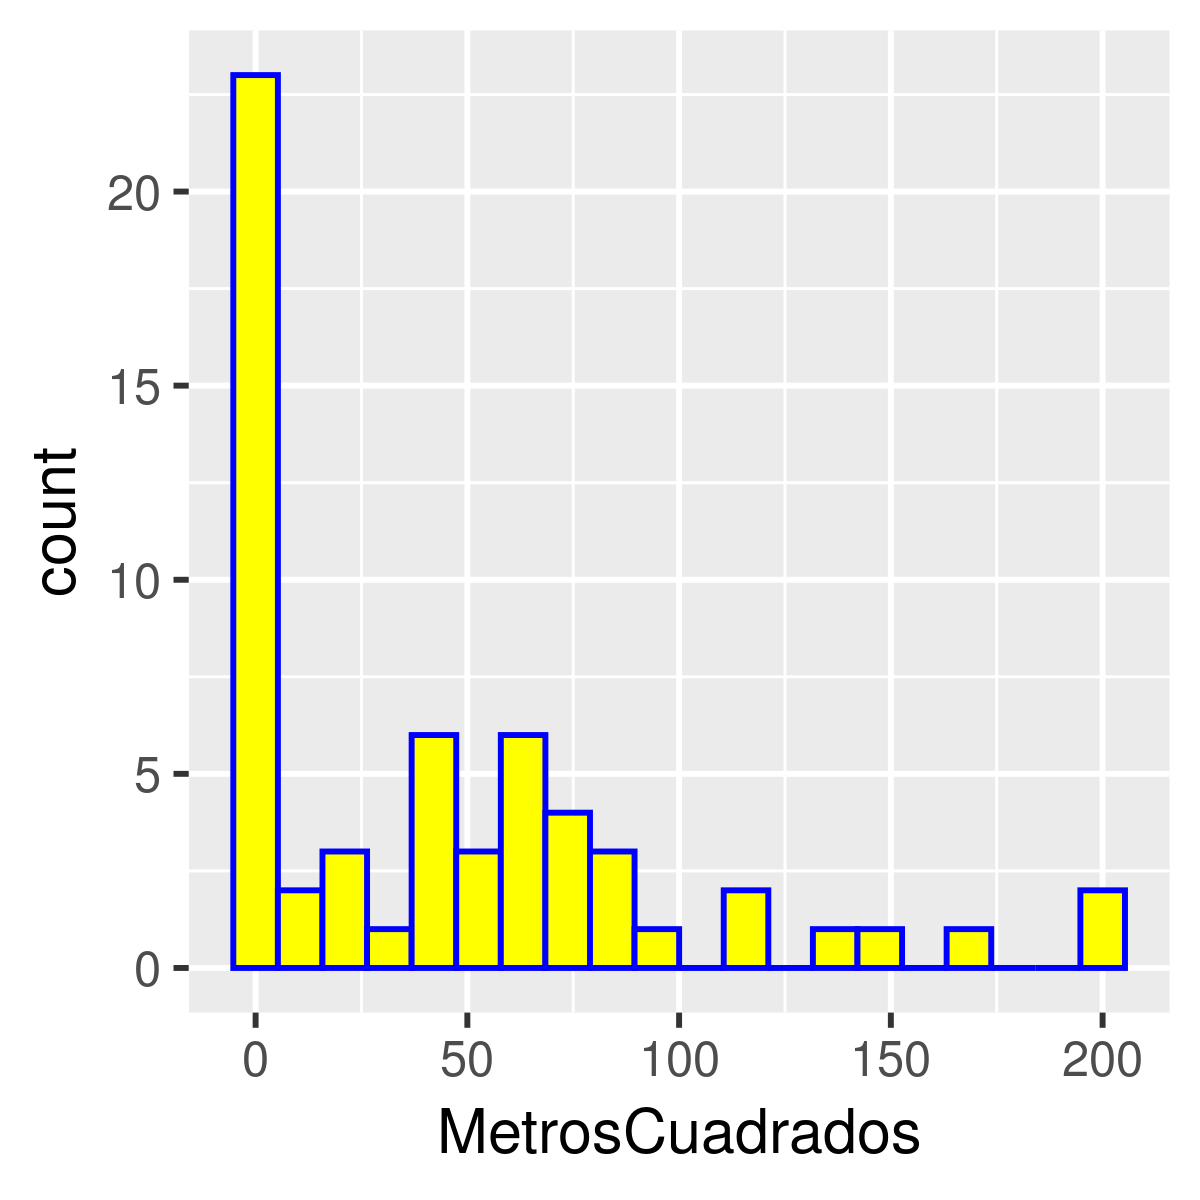

[1] "No contemplo menos de 5mts2 ni menos de 1 dormitorio --> "


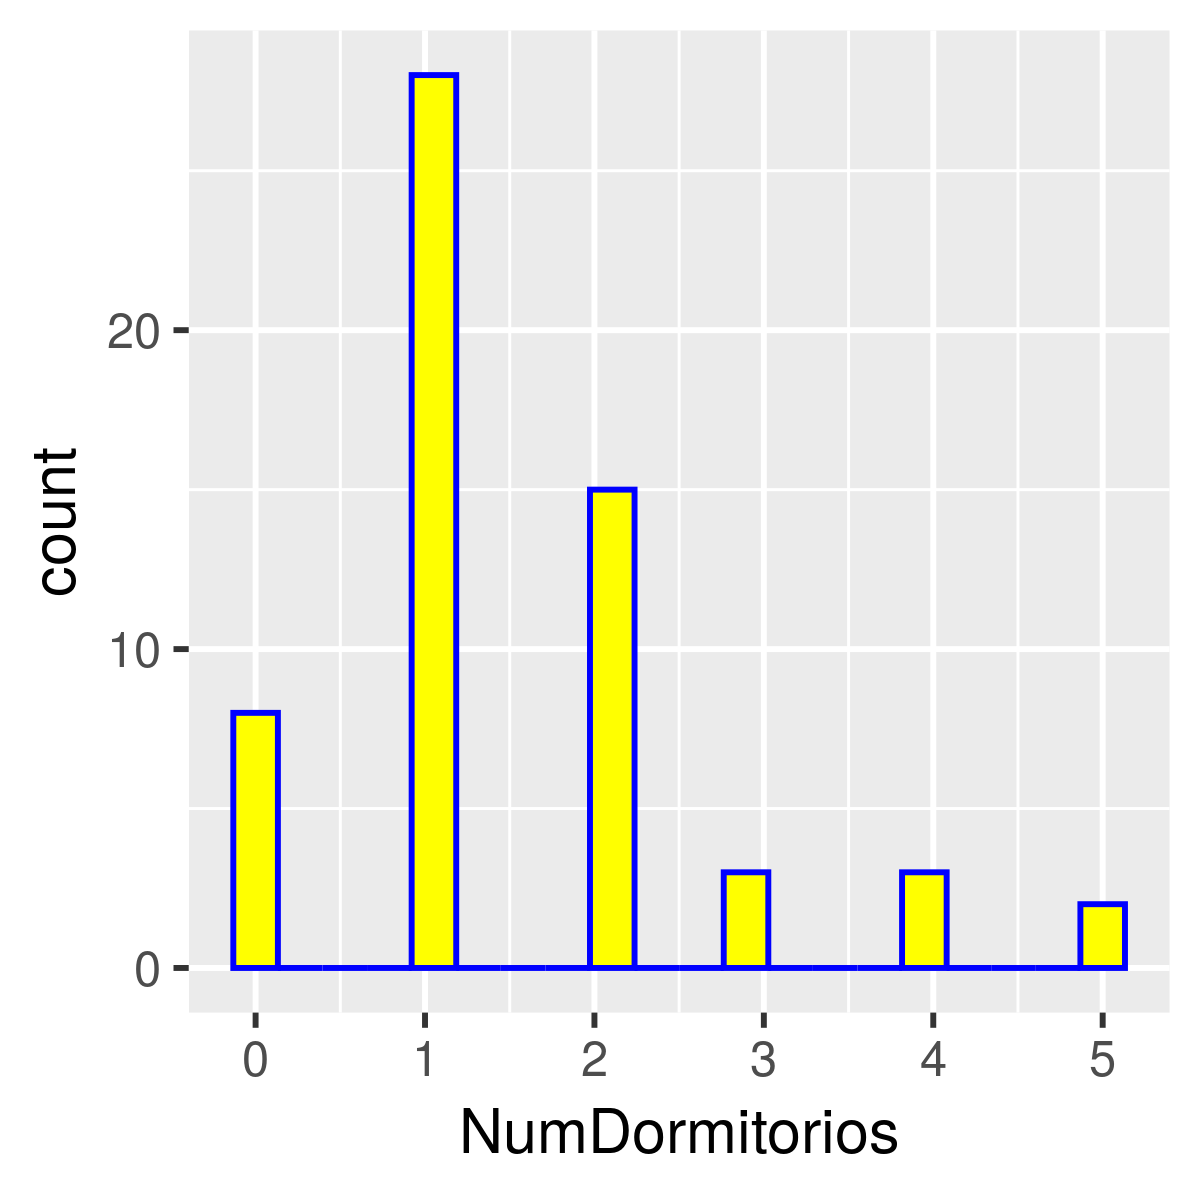

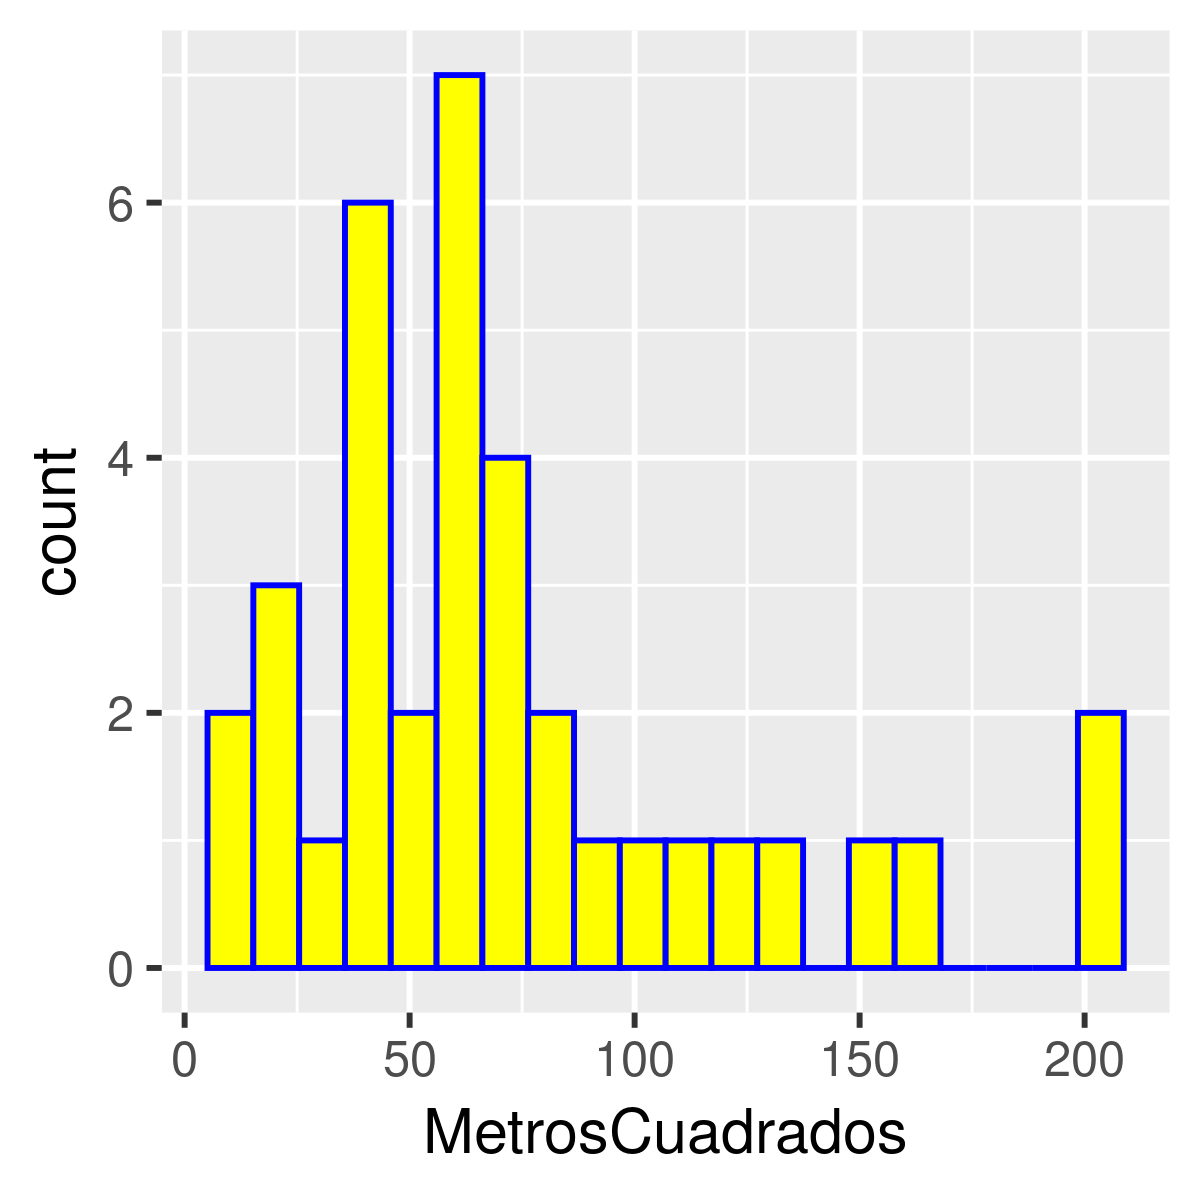

[1] "lo cambio en barrio_sol filtrándolo -->"
[1] "Busco una nueva correlación -->"


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7318620,0.8373625,0.5275201
NumDormitorios,0.7318620,1.0000000,0.7811908,0.7773239
MaxOcupantes,0.8373625,0.7811908,1.0000000,0.6720711
MetrosCuadrados,0.5275201,0.7773239,0.6720711,1.0000000


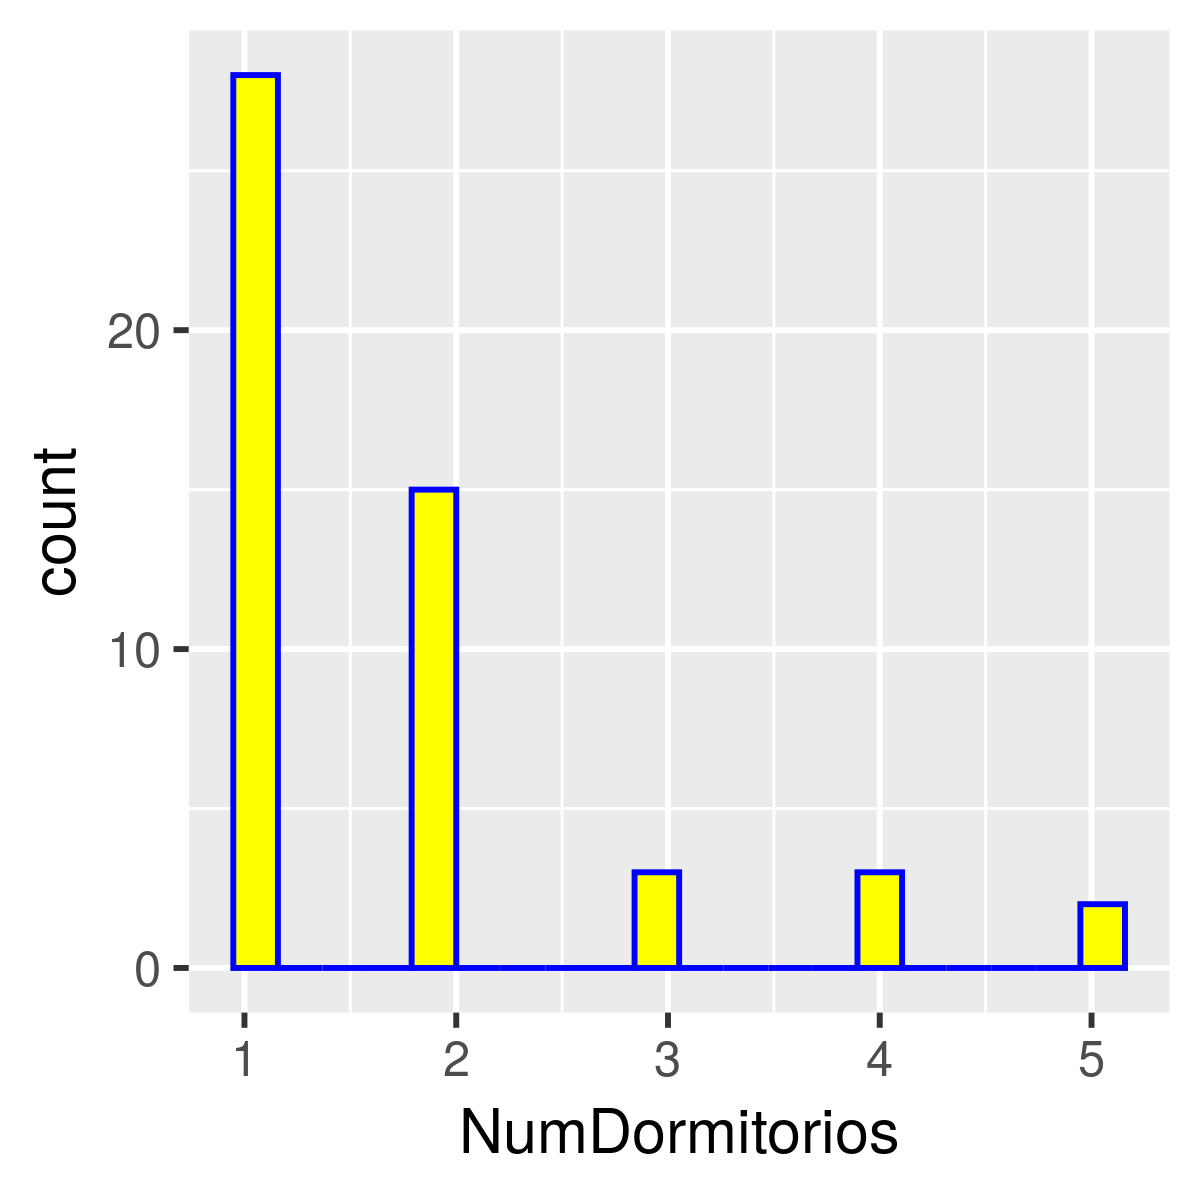

In [491]:
options(repr.plot.height=3,repr.plot.width=3)
ggplot(data = barrio_sol, aes(x=MetrosCuadrados)) + 
    geom_histogram(bins=20, fill="yellow", color="blue") + 
    xlab("MetrosCuadrados")
ggplot(data = barrio_sol, aes(x=NumDormitorios)) + 
    geom_histogram(bins=20, fill="yellow", color="blue") + 
    xlab("NumDormitorios")
print("No contemplo menos de 5mts2 ni menos de 1 dormitorio --> ")
ggplot(data = barrio_sol[which(barrio_sol$MetrosCuadrados>5),], aes(x=MetrosCuadrados)) + 
    geom_histogram(bins=20, fill="yellow", color="blue") + 
    xlab("MetrosCuadrados")
ggplot(data = barrio_sol[which(barrio_sol$NumDormitorios>=1),], aes(x=NumDormitorios)) + 
    geom_histogram(bins=20, fill="yellow", color="blue") + 
    xlab("NumDormitorios")
print("lo cambio en barrio_sol filtrándolo -->")
barrio_sol<-barrio_sol %>%
    filter(MetrosCuadrados > 5 & NumDormitorios >= 1)
print("Busco una nueva correlación -->")
cor(barrio_sol[,c("NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados")], use = "pairwise.complete.obs")

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [493]:
modelo<- lm(data=barrio_sol, formula = Precio ~ MetrosCuadrados+NumDormitorios+NumBanyos+MaxOcupantes)
summary(modelo)
confint(modelo)


Call:
lm(formula = Precio ~ MetrosCuadrados + NumDormitorios + NumBanyos + 
    MaxOcupantes, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.163 -13.782  -2.543  16.420  62.255 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      17.2923    12.1602   1.422  0.16646   
MetrosCuadrados   0.2355     0.1732   1.360  0.18521   
NumDormitorios   28.8896     8.7549   3.300  0.00272 **
NumBanyos         6.8258    14.2096   0.480  0.63484   
MaxOcupantes      2.7016     4.1570   0.650  0.52125   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.96 on 27 degrees of freedom
Multiple R-squared:  0.8008,	Adjusted R-squared:  0.7712 
F-statistic: 27.13 on 4 and 27 DF,  p-value: 4.112e-09


,2.5 %,97.5 %
(Intercept),-7.6583821,42.2429652
MetrosCuadrados,-0.1199176,0.5909576
NumDormitorios,10.9259792,46.8532486
NumBanyos,-22.3299581,35.9814910
MaxOcupantes,-5.8278119,11.2309497


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [ ]:
#El número de habitaciones, pues tiene el P-Valor más bajo. Sería bueno hacer el ejercicio para analizar los barrios. 


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [496]:
modelo1<- lm(data=barrio_sol, formula = Precio ~ MetrosCuadrados)
summary(modelo1)
confint(modelo1)
print("El precio de alquiler por cada metro cuadrado con un margen de error del 95% aumenta -->")
print("entre 0.6322116 y 1.213892 Euros")


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.466 -21.263  -5.666  18.472 120.641 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      40.8654    12.9284   3.161  0.00358 ** 
MetrosCuadrados   0.9231     0.1424   6.482 3.66e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.73 on 30 degrees of freedom
Multiple R-squared:  0.5834,	Adjusted R-squared:  0.5695 
F-statistic: 42.01 on 1 and 30 DF,  p-value: 3.659e-07


,2.5 %,97.5 %
(Intercept),14.4619973,67.268816
MetrosCuadrados,0.6322116,1.213892


[1] "El precio de alquiler por cada metro cuadrado con un margen de error del 95% aumenta -->"
[1] "entre 0.6322116 y 1.213892 Euros"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [498]:
modelo2<- lm(data=barrio_sol, formula = Precio ~ NumDormitorios)
summary(modelo2)
confint(modelo2)
print("El precio de alquiler por cada dormitorio con un margen de error del 95% aumenta -->")
print("entre 35,18031 y 53,16788 Euros")


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.024  -17.708   -0.327   21.542   47.976 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      31.153      9.535   3.267  0.00272 ** 
NumDormitorios   44.174      4.404  10.031 4.26e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.5 on 30 degrees of freedom
Multiple R-squared:  0.7703,	Adjusted R-squared:  0.7627 
F-statistic: 100.6 on 1 and 30 DF,  p-value: 4.258e-11


,2.5 %,97.5 %
(Intercept),11.68108,50.62533
NumDormitorios,35.18031,53.16788


[1] "El precio de alquiler por cada dormitorio con un margen de error del 95% aumenta -->"
[1] "entre 35,18031 y 53,16788 Euros"


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [528]:
alquiler3<- barrio_sol %>%
    filter(NumDormitorios == 3)
disponibles = summarise(alquiler3, Freq1= n())
paste("El total de oferta disponible con 3 dormitorios en Sol es --> ", disponibles$Freq1)

TotalOferta<- barrio_sol
TotalOferta <- summarise(TotalOferta,
    Freq2 = n())
paste("El universo de ofertas disponibles en Sol es --> ", TotalOferta$Freq2)
Probabilidad = disponibles$Freq1/TotalOferta$Freq2
paste("La probabilidad de encontrar un apartamento en alquiler con 3 dormitorios en Sol es de --> ", Probabilidad)


[1] "El total de oferta disponible con 3 dormitorios en Sol es -->  2"

[1] "El universo de ofertas disponibles en Sol es -->  32"

[1] "La probabilidad de encontrar un apartamento en alquiler con 3 dormitorios en Sol es de -->  0.0625"

In [533]:
print("Para calcular el intervalo de confianza, utilizaré binom.test")
binom.test(2,32)

[1] "Para calcular el intervalo de confianza, utilizaré binom.test"



	Exact binomial test

data:  2 and 32
number of successes = 2, number of trials = 32, p-value = 2.463e-07
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.007660736 0.208069430
sample estimates:
probability of success 
                0.0625 


In [534]:
print("Hay un 95% de confianza que la probabilidad se encuentre entre un 0.007660736 y un 0.208069430")

[1] "Hay un 95% de confianza que la probabilidad se encuentre entre un 0.007660736 y un 0.208069430"
